In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

In [3]:
# eine metallplatte wird in 50 blöcke diskretisiert
plate_length = 50
max_iter_time = 400

# die heat equation sagt: T_t (temperatur in einem bestimmten Punkt abgeleitet nach Zeit) = const * laplace T
# laplace T = T_xx + T_yy
# Temperaturänderung in Zeit = Unterschied zu Nachbarn im Raum * const
# die funktion T(x, y, t) soll gefunden werden
# Lösung einer PDE ist immer EINE FUNKTION mit mehreren Variablen
u = np.empty((max_iter_time, plate_length, plate_length))

# wenn wir die Anfangsbedingungen kennen, können wir die PDE mit z.B. Einschritt-Euler lösen
# d.h. Lösung der PDE = eine Funktion ~= eine Menge von Punkten ((x,y,t, u(x,y,t)))

# oben am blech sind es über die ganze Zeit hinweg 100 grad
temp_top = 100
temp_left = 40
temp_bottom = 60
temp_right = 0
temp_middle_start = 0

# das ist die diffusionskonstante (hängt von der flüssigkeit ab)
alpha = 2.0
# das ist die maschenweite
delta_x = 1

# so muessen wir die zeitauflösung waehlen, damit der einschritt euler konvergiert
# (z.B. bei steifen Problemen muss delta_t sehr klein gewählt werden, damit nicht divergiert)
delta_t = (delta_x ** 2) / (4.0 * alpha)

gamma = alpha * delta_t / (delta_x ** 2)


# fuer die funktion plt.pcolormesh muss u(t, y, x) sein
# y nimmt nach oben zu
# x nimmt nach rechts zu
u[:, plate_length-1, :] = temp_top
u[:, 0, :] = temp_bottom

u[:, 1:plate_length-1, 0] = temp_left
u[:, 1:plate_length-1, plate_length-1] = temp_right

u[0, 1:plate_length-1, 1:plate_length-1] = temp_middle_start

In [4]:
def plot_heatmap(u_k, k):
    
    # nur 3 nachkommastellen, damit nicht zu verwirrend
    plt.title(f"Heat distribution at t = {k * delta_t:.3f}")
    
    # die colormap plt.cm.jet ist fuer typische wärme bild aufnahmen
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.colorbar()
    plt.show()

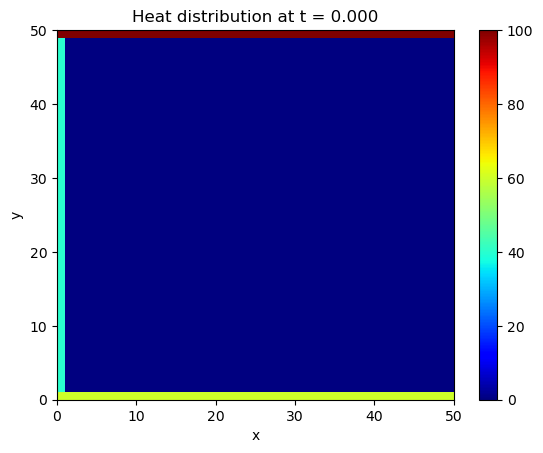

In [5]:
plot_heatmap(u[0], 0)

In [6]:
def calculate(u):
    
    # berechne nächsten zeitschritt aus aktuellem und gehe richtung ableitung
    # man muss einen früher aufhören, da man vorwärts berechnet
    for k in range(0, max_iter_time-1, 1):
        
        # nur die raumpunkte innerhalb der box sind variabel
        for i in range(1, plate_length-1, delta_x):
            
            for j in range(1, plate_length-1, delta_x):
                
                delta_u = gamma * (u[k][i-1][j] + u[k][i][j-1] + u[k][i+1][j] + u[k][i][j+1] - 4*u[k][i][j])
                u[k+1, i, j] = u[k][i][j] + delta_u
                
    return u

In [7]:
u = calculate(u)

In [8]:
print(len(u))

400


In [9]:
# die funktion animate nimmt immer nur einen parameter (frames sozusagen)
# und zeichnet dann alle nacheinander
def animate(k):
    plot_heatmap(u[k], k)

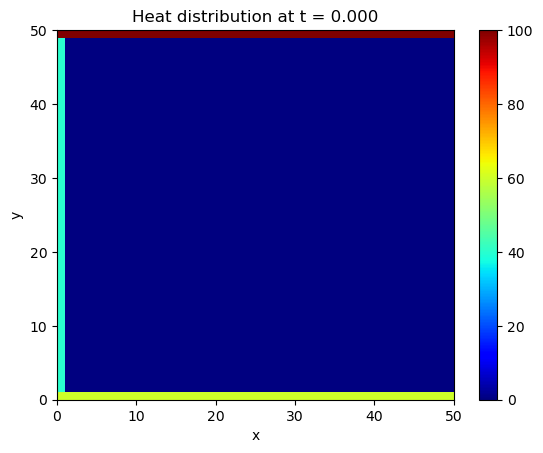

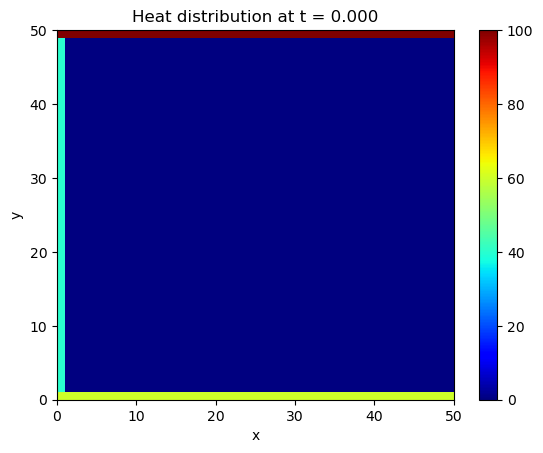

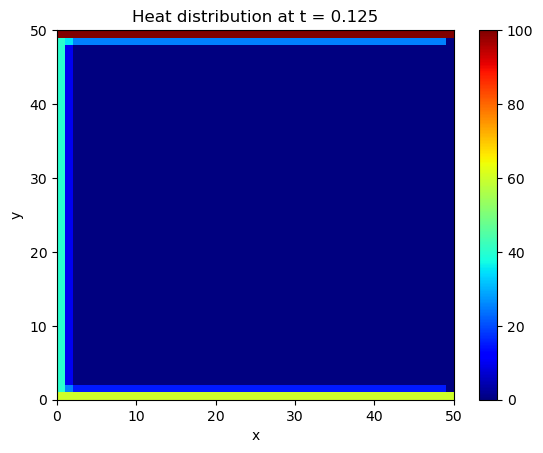

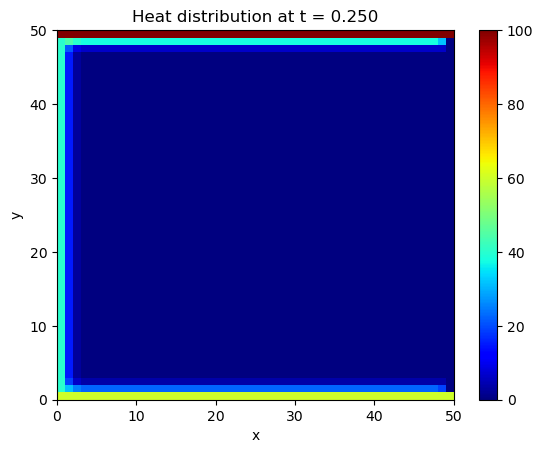

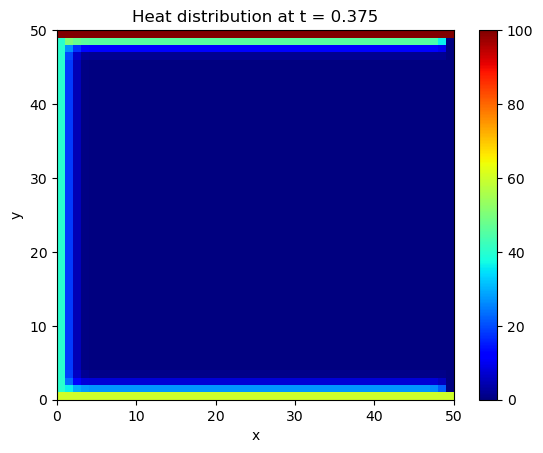

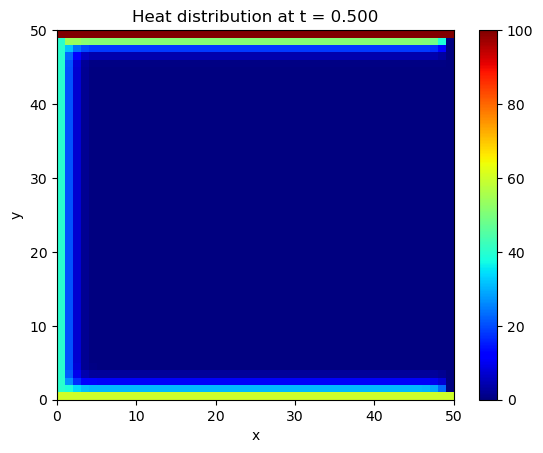

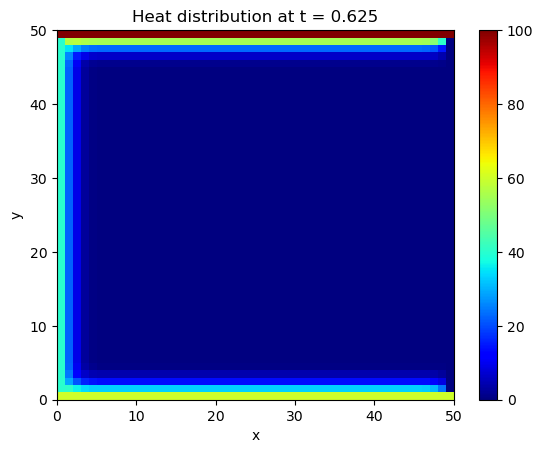

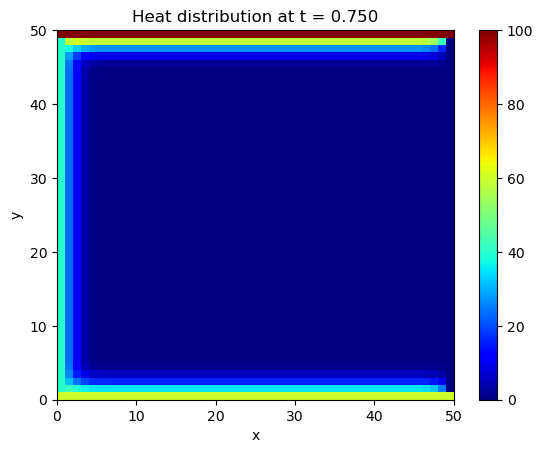

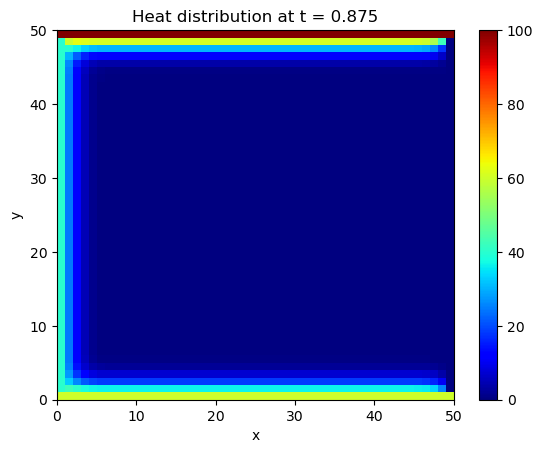

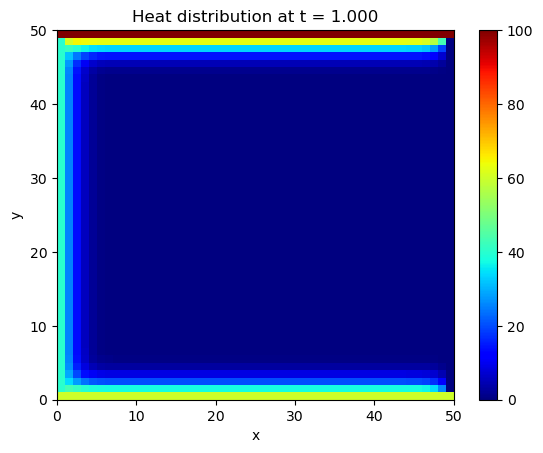

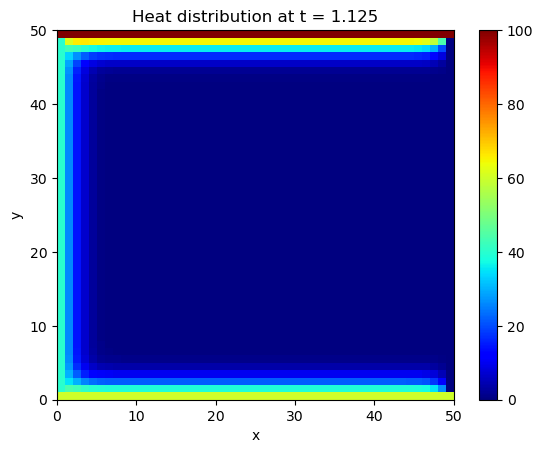

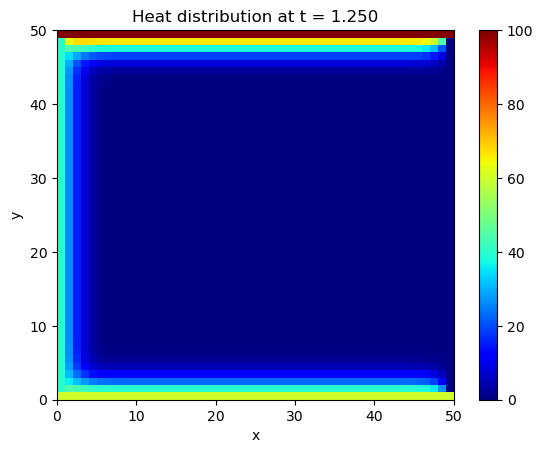

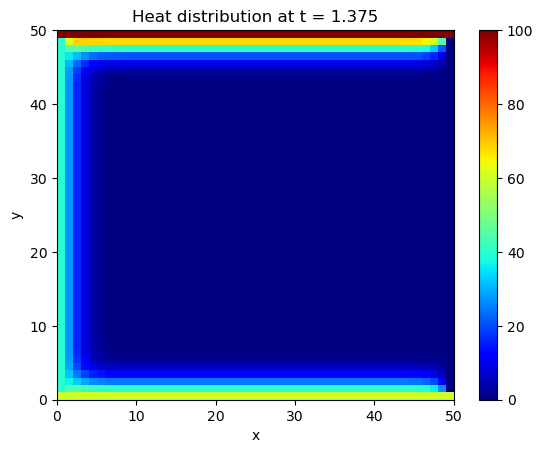

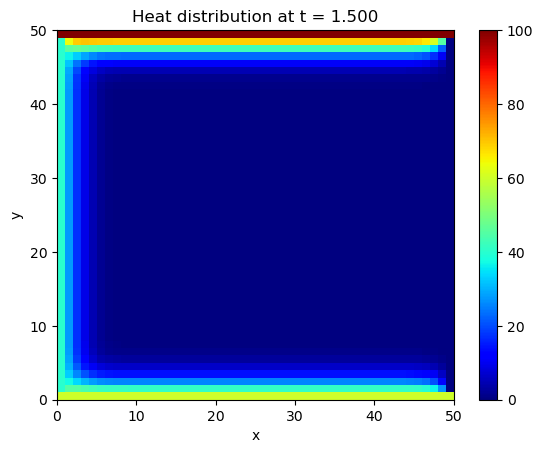

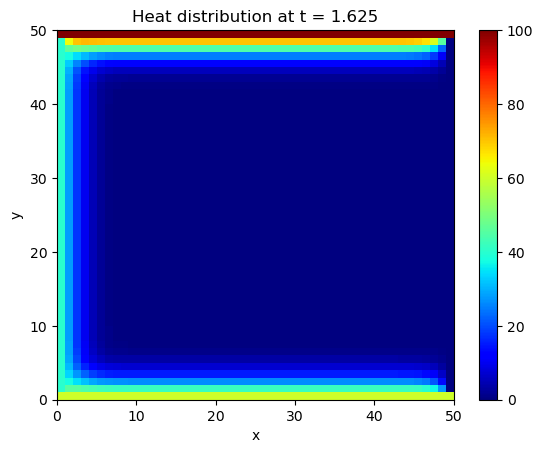

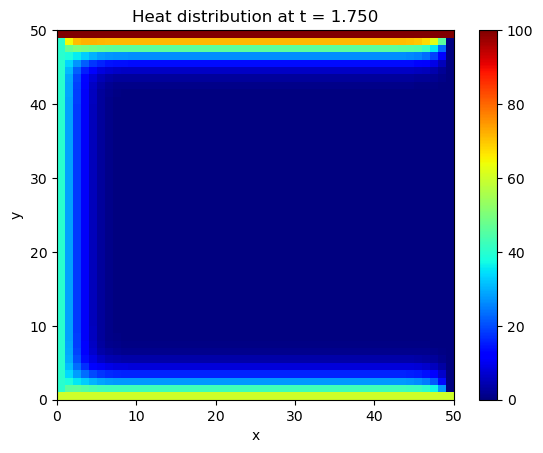

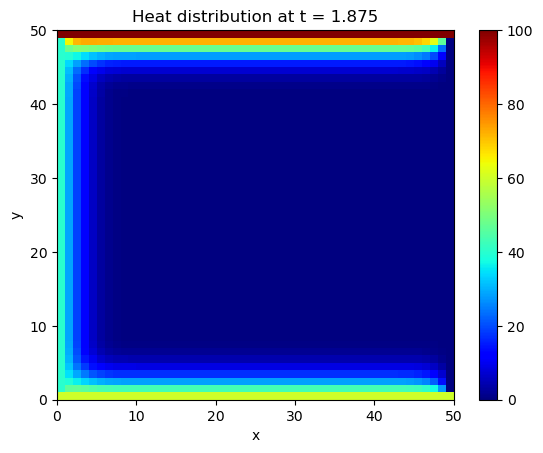

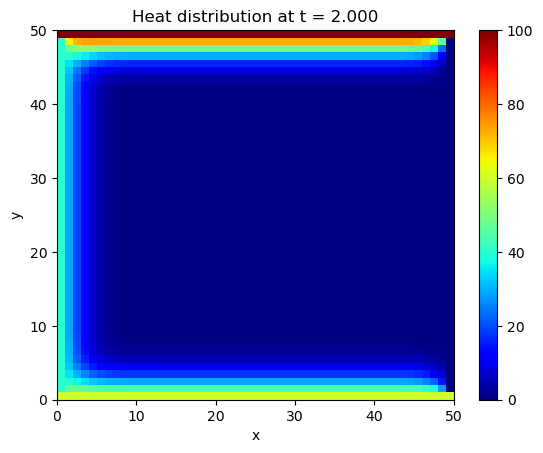

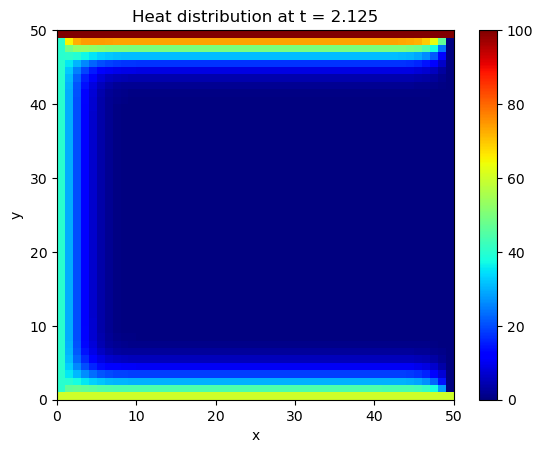

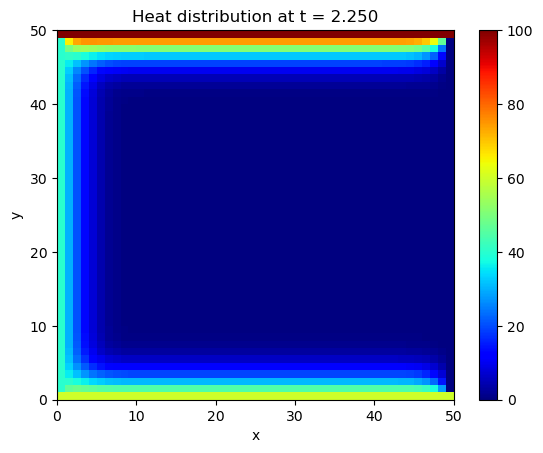

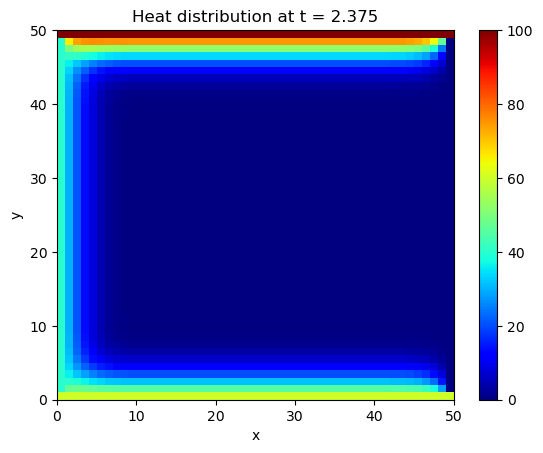

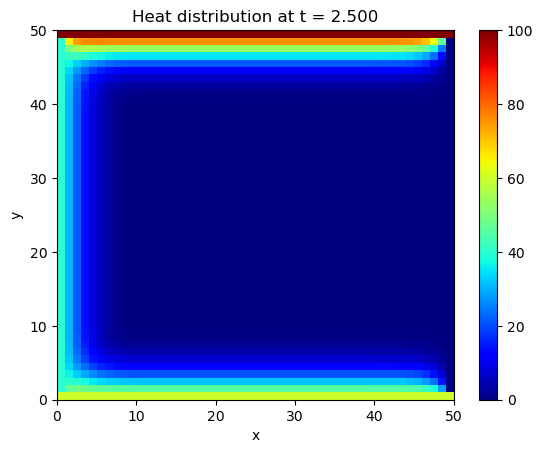

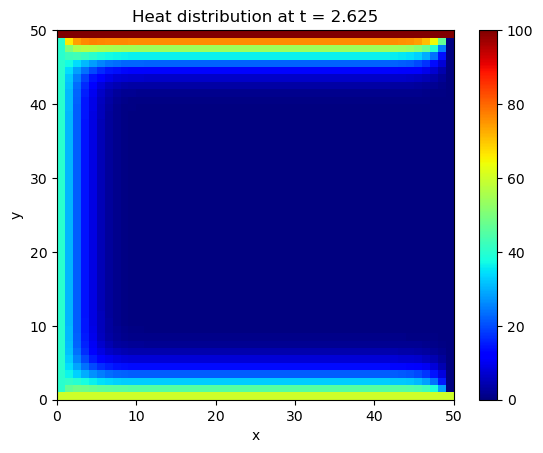

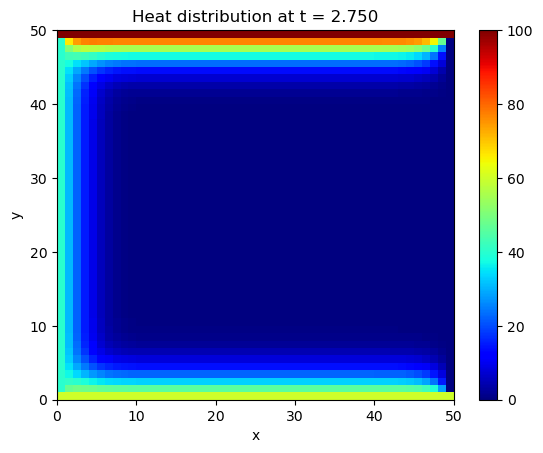

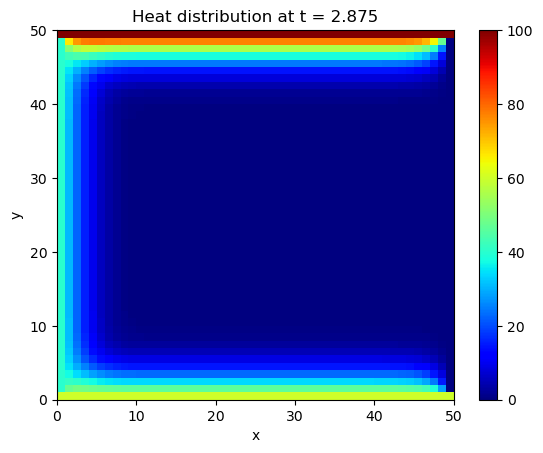

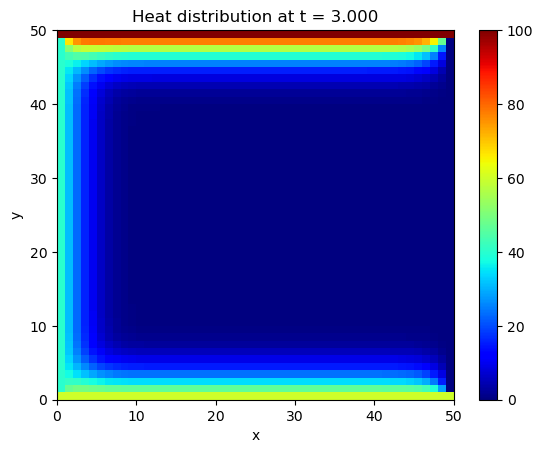

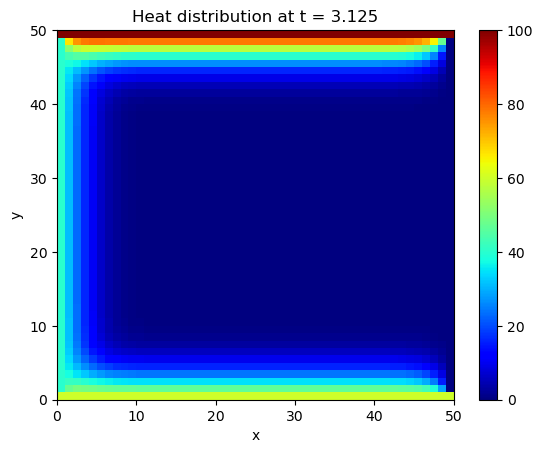

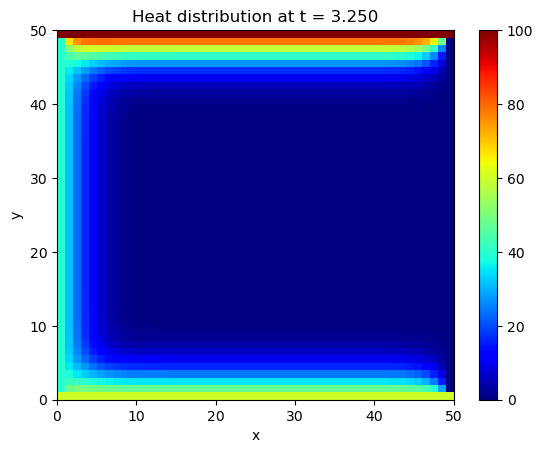

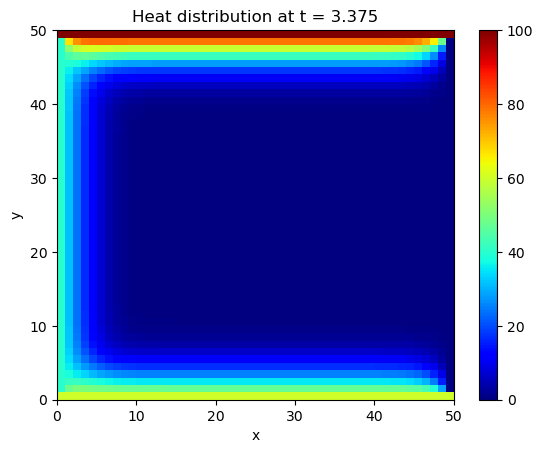

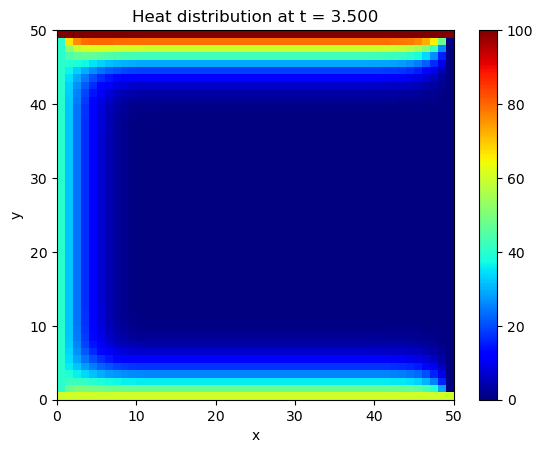

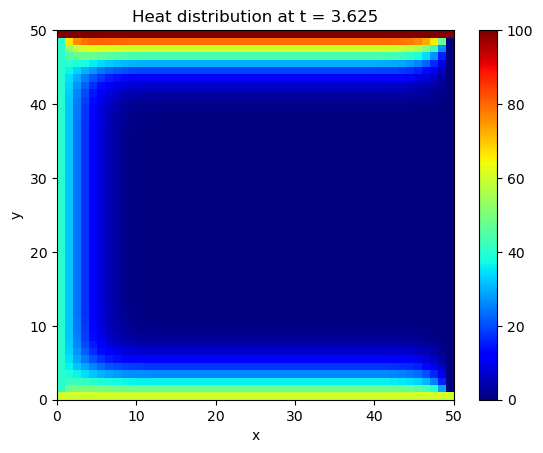

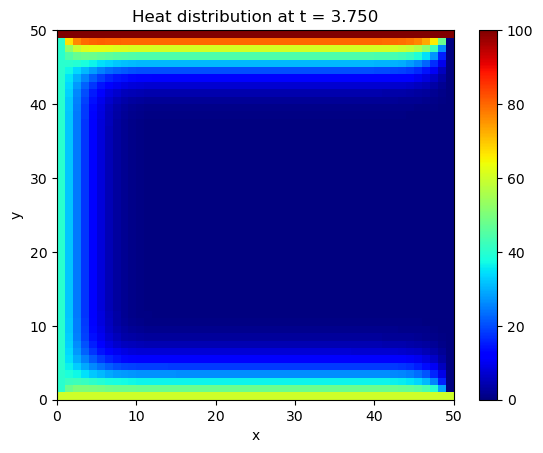

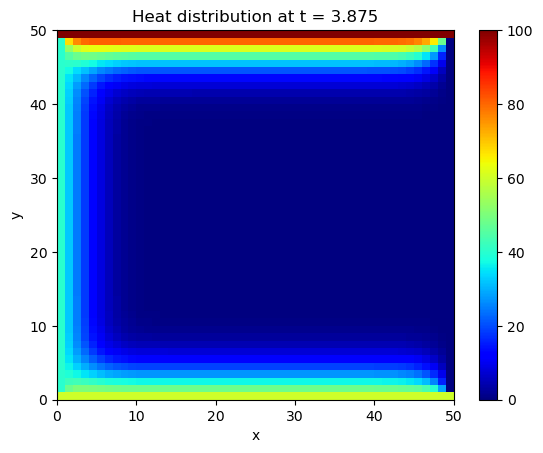

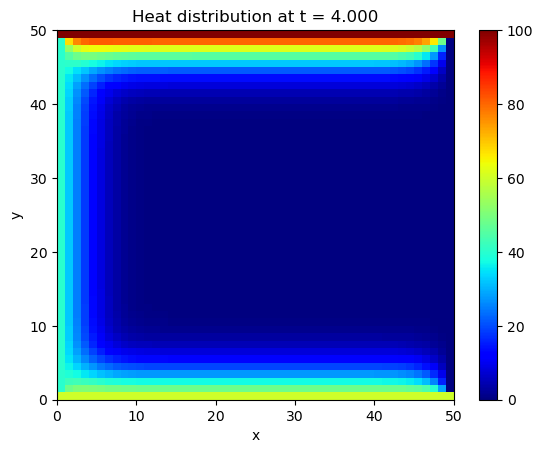

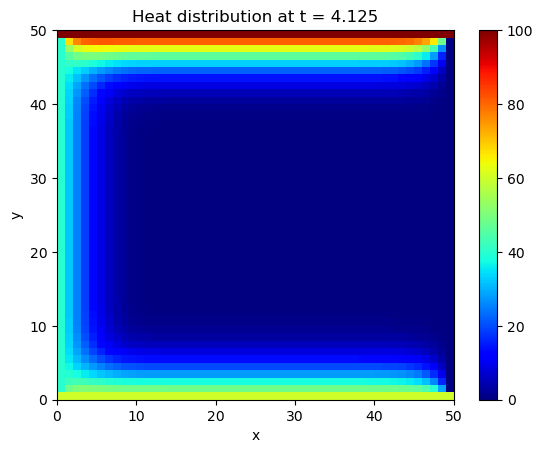

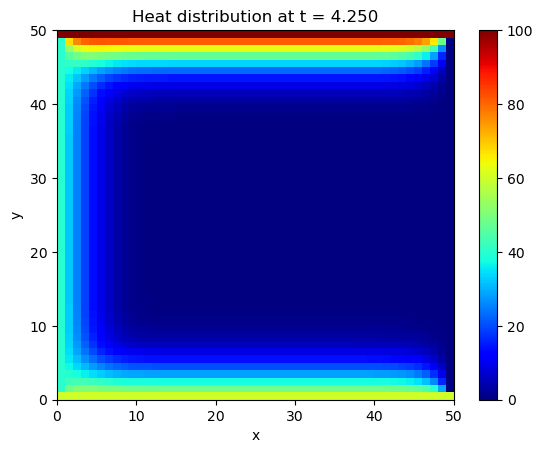

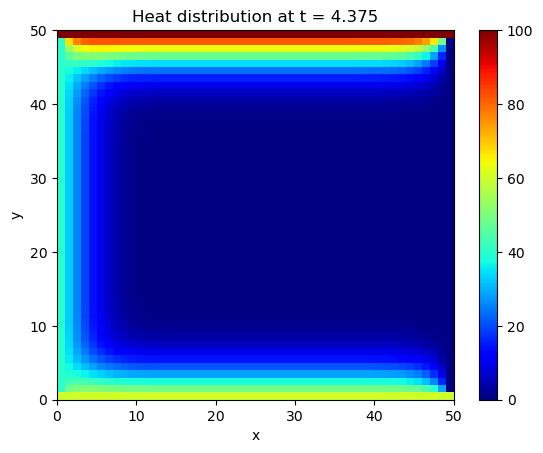

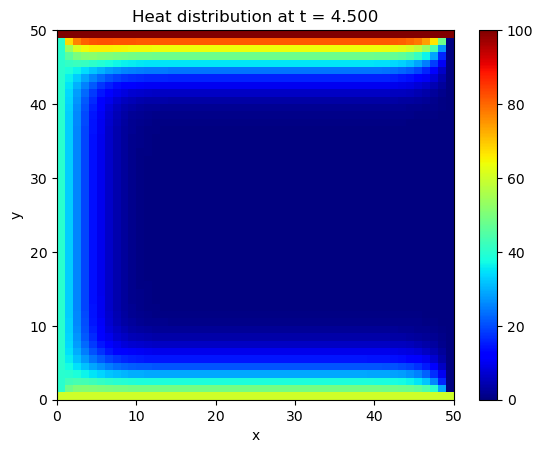

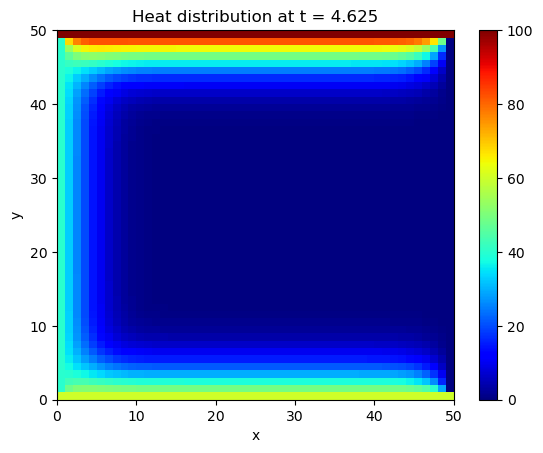

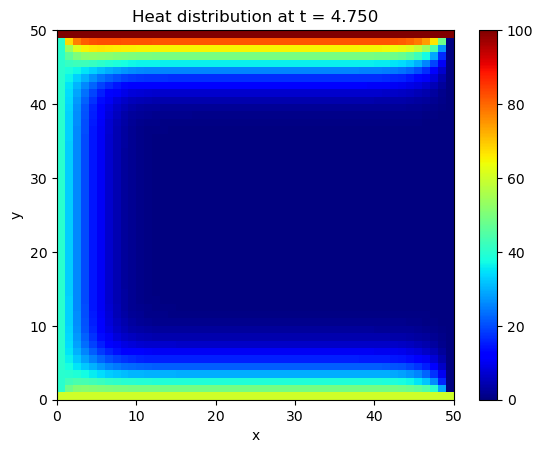

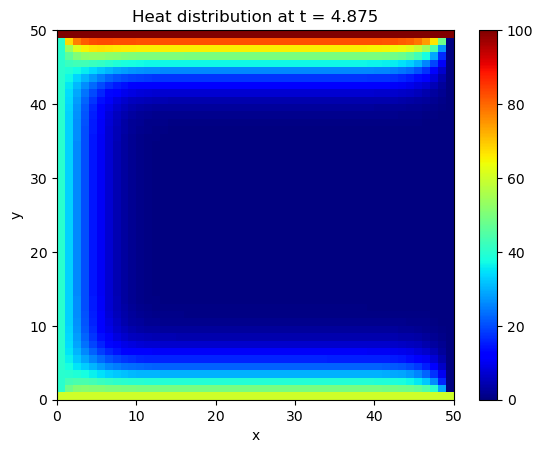

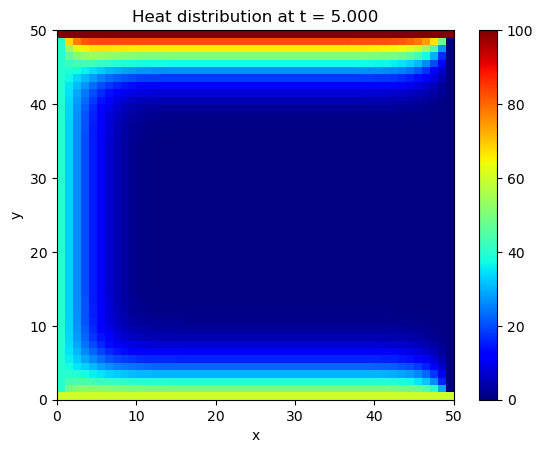

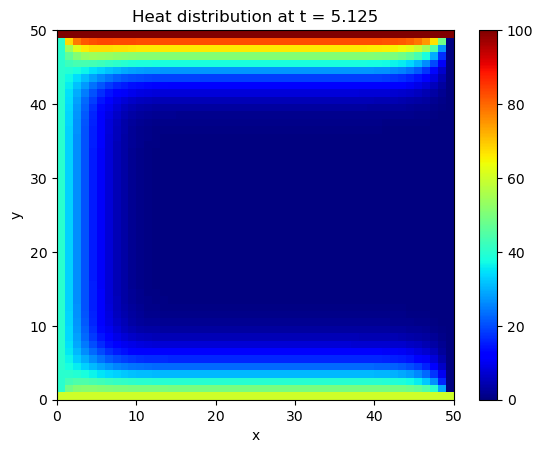

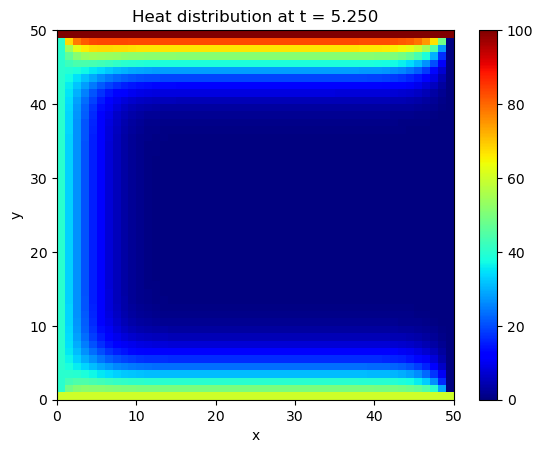

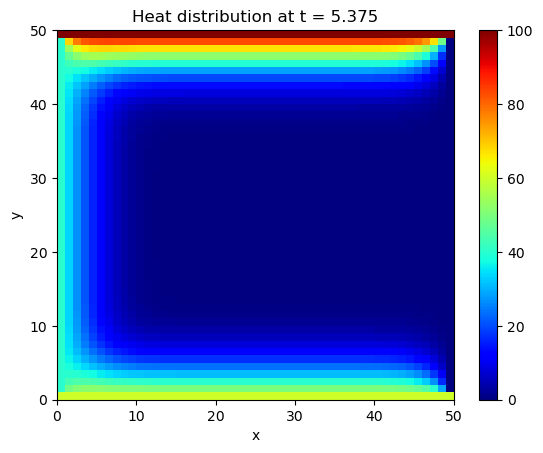

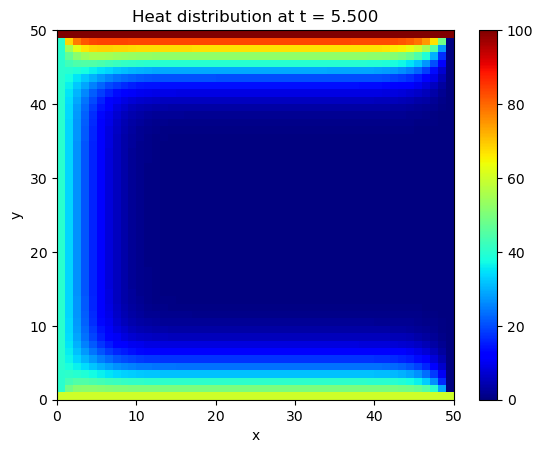

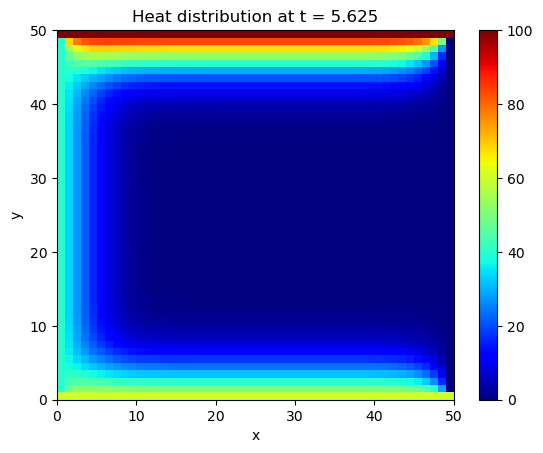

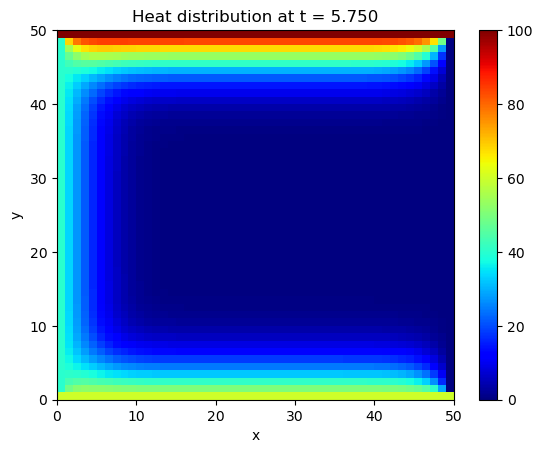

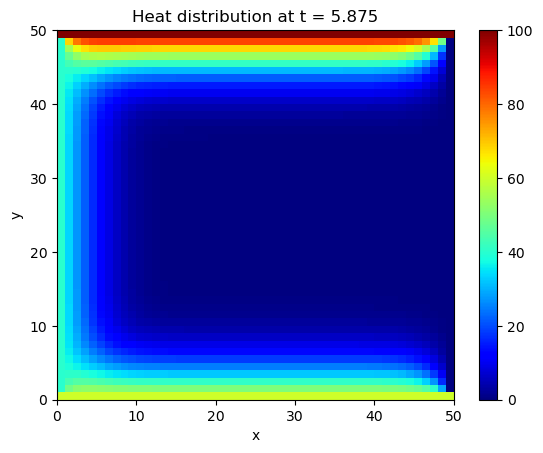

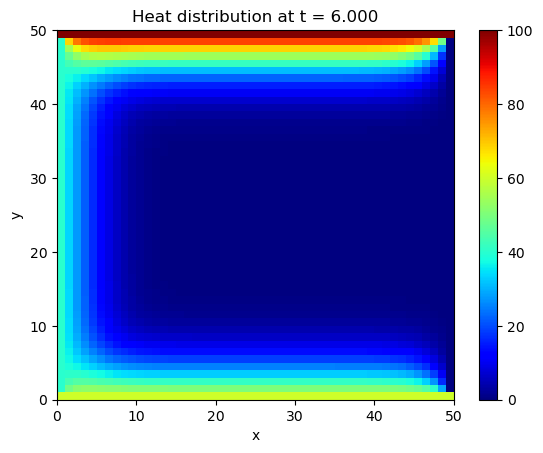

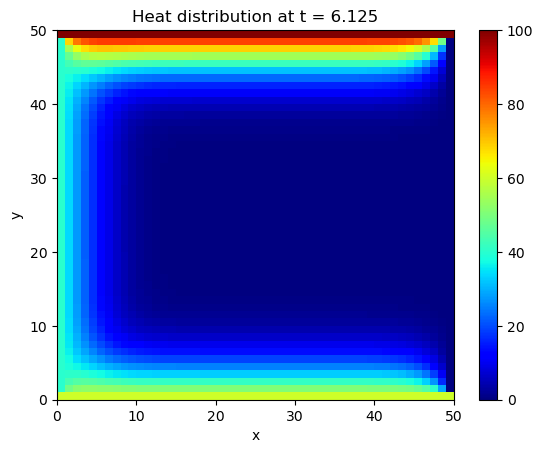

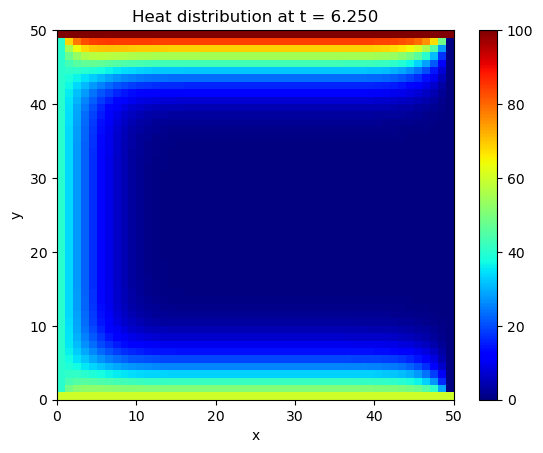

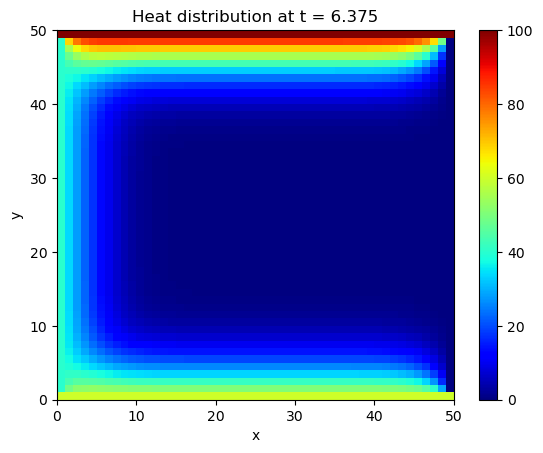

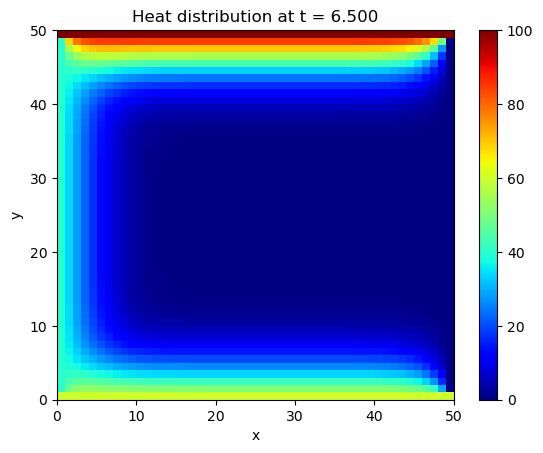

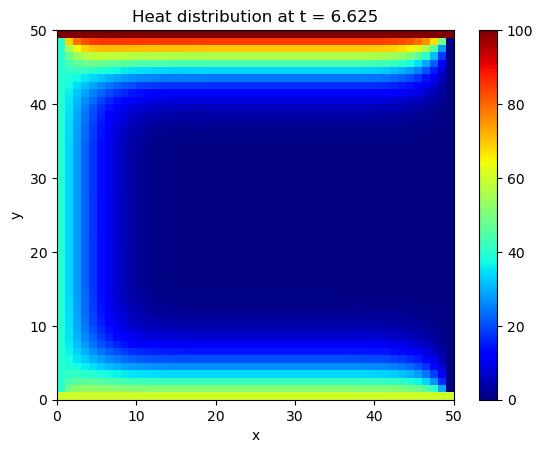

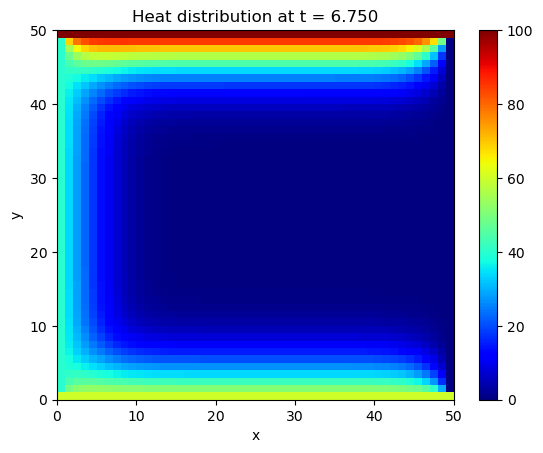

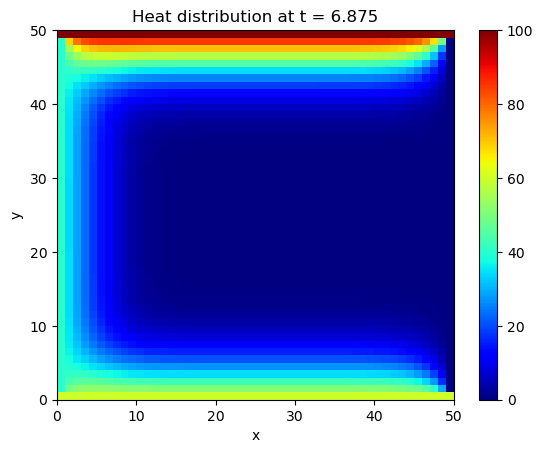

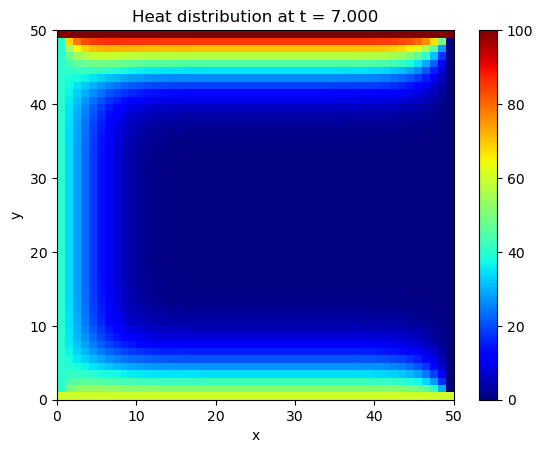

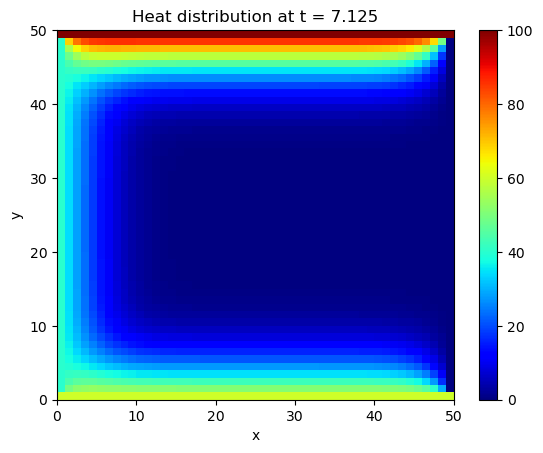

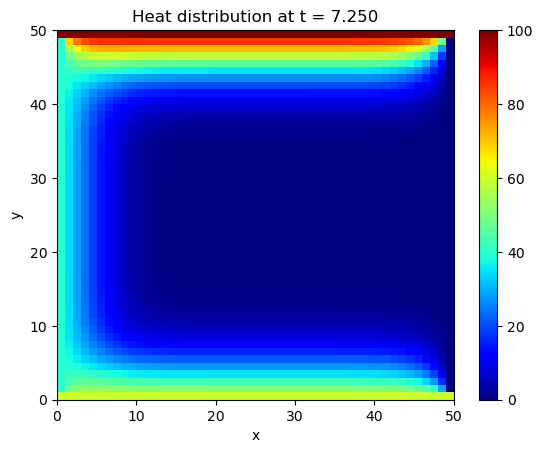

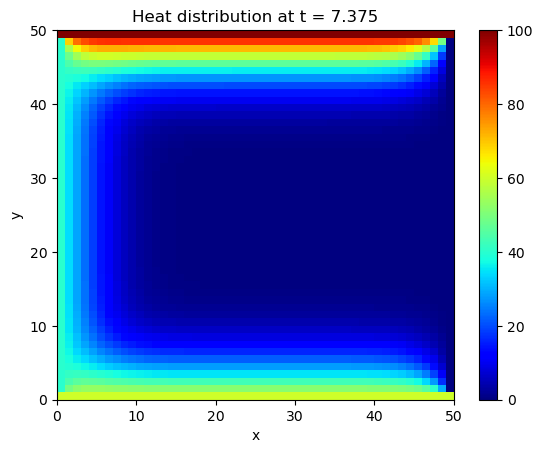

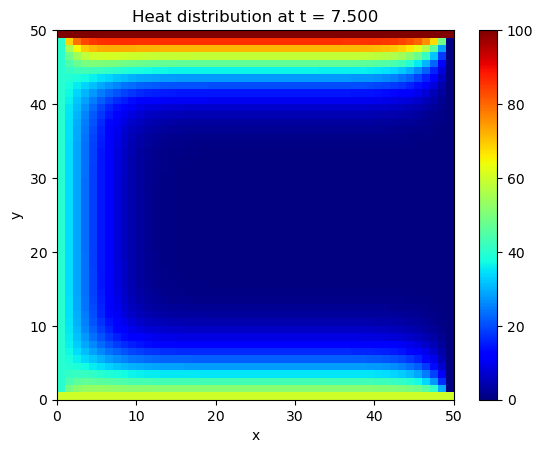

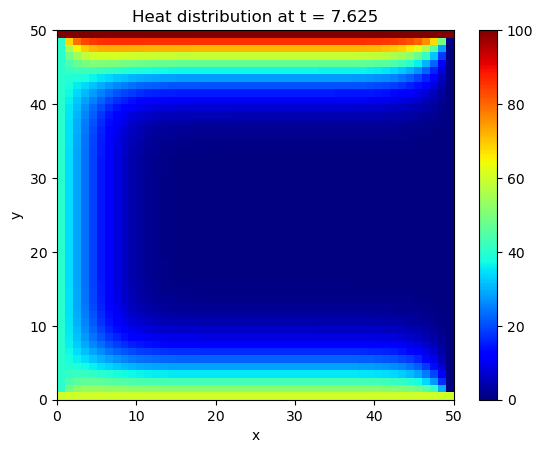

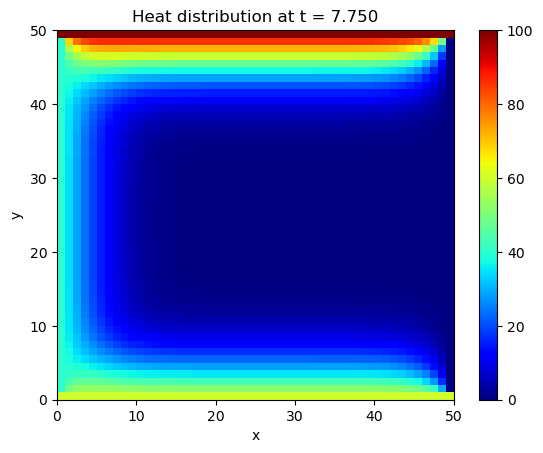

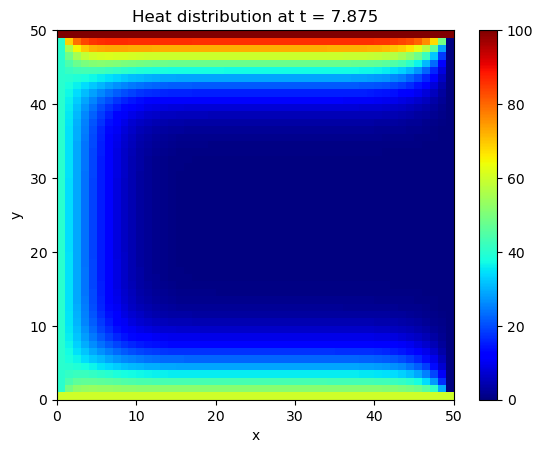

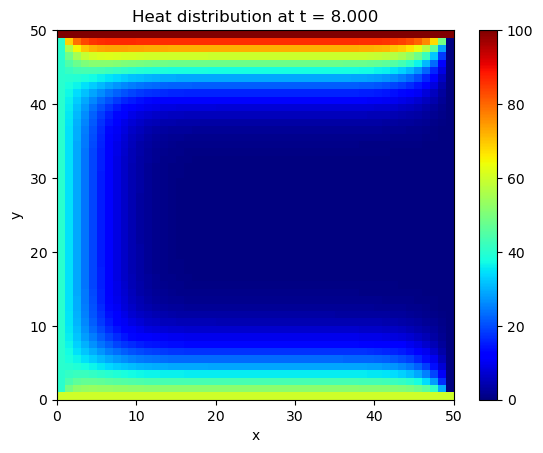

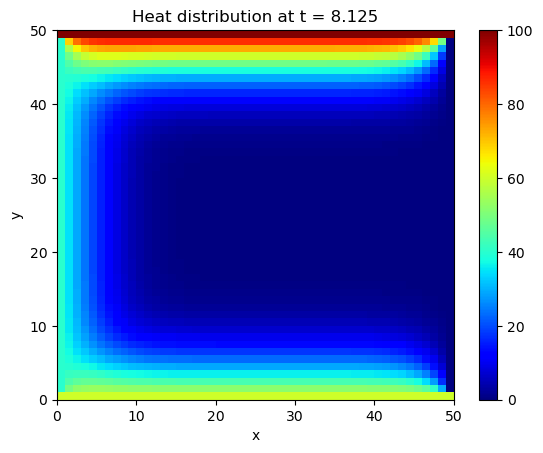

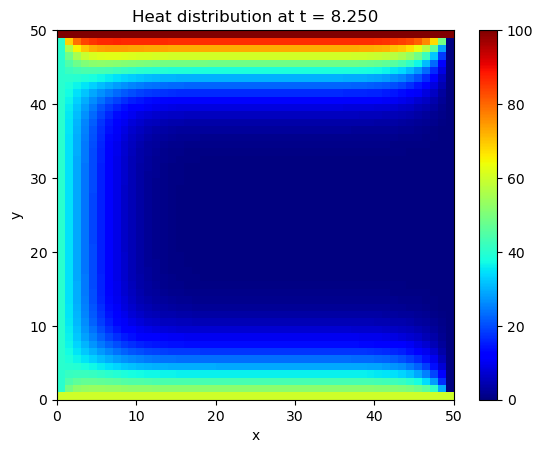

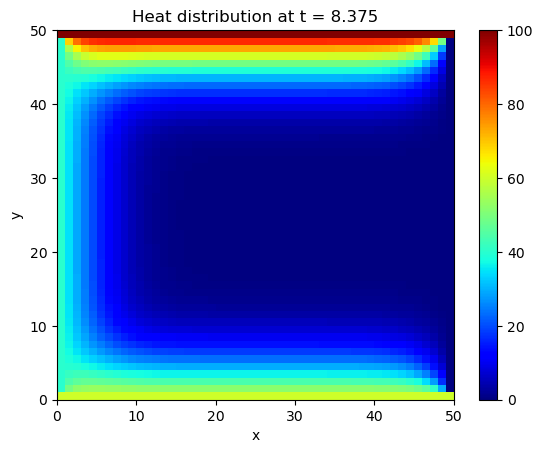

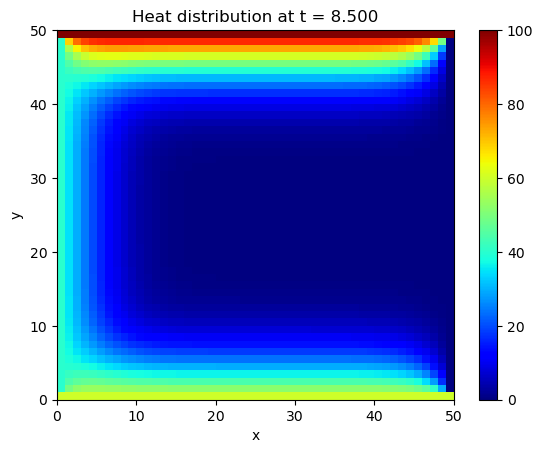

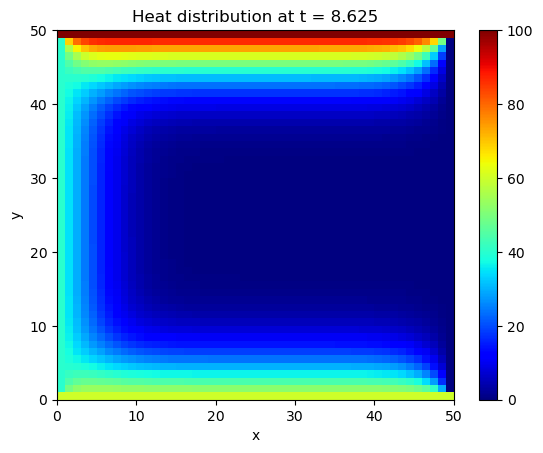

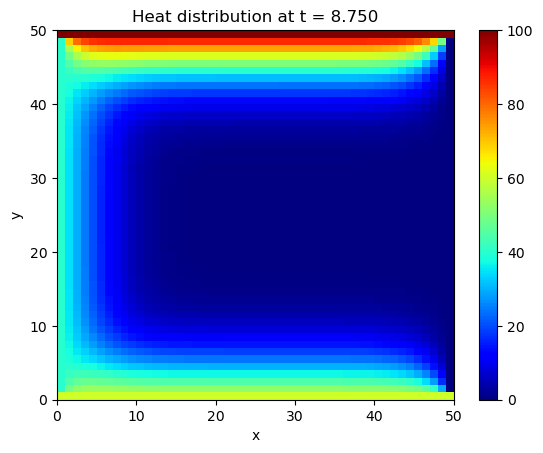

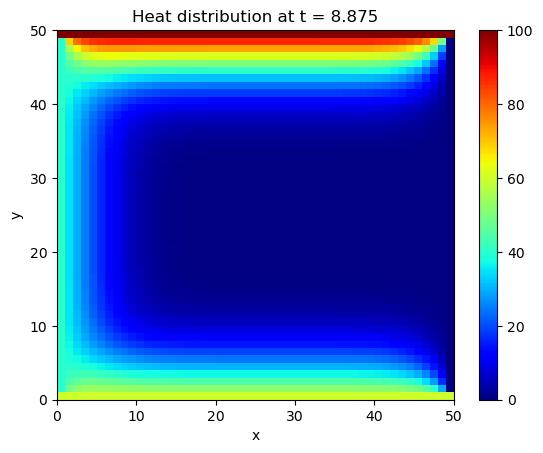

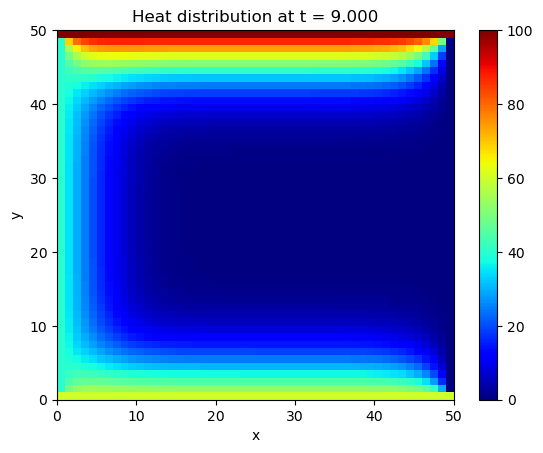

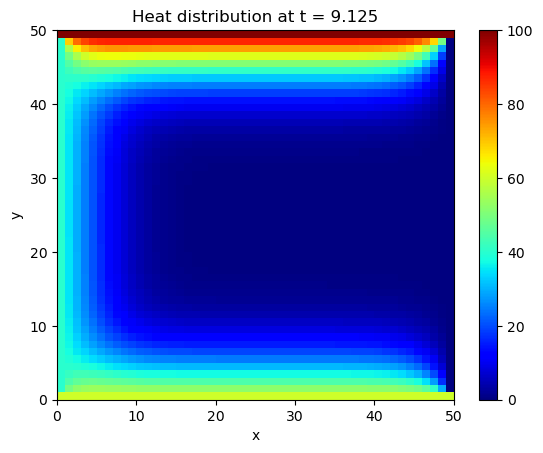

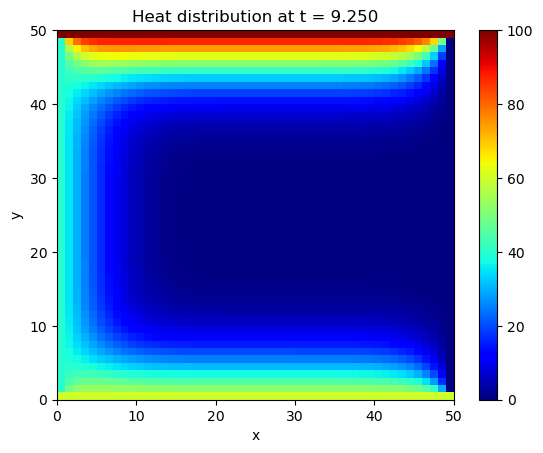

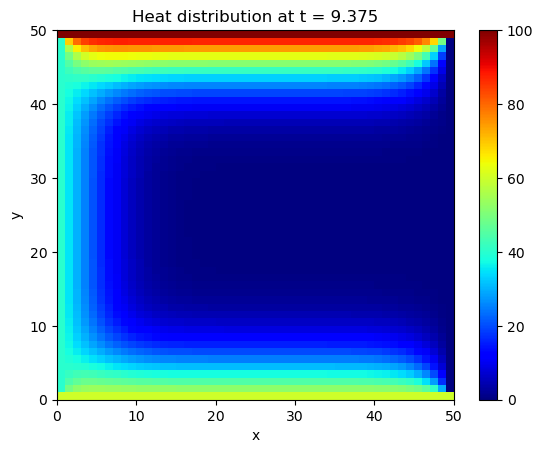

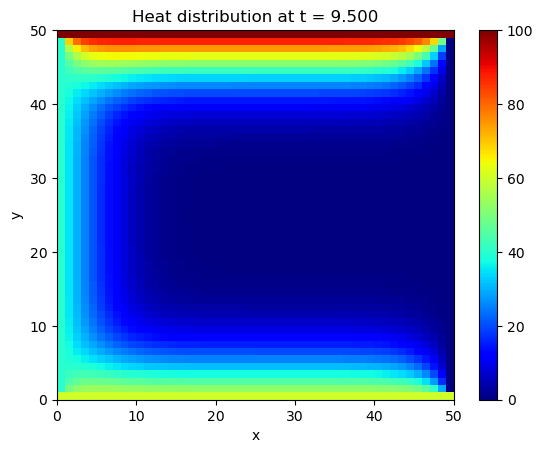

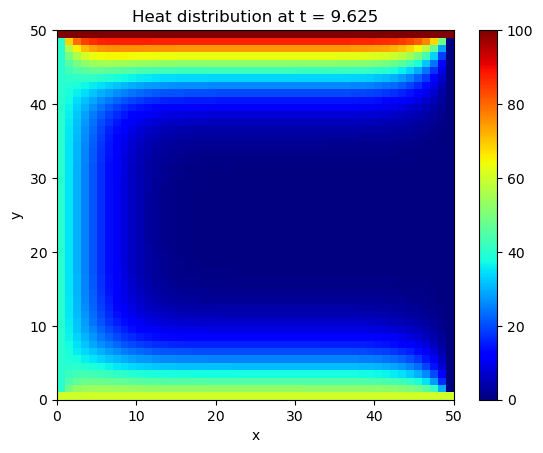

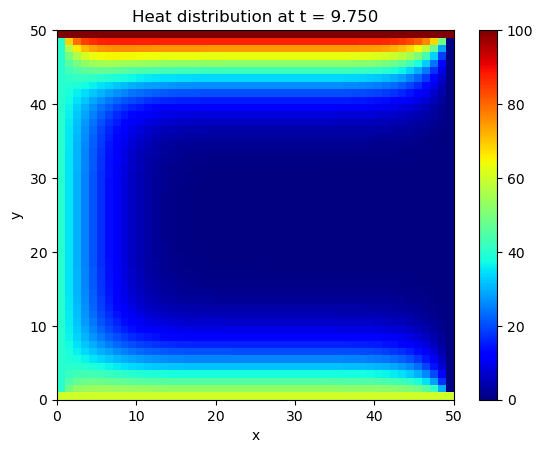

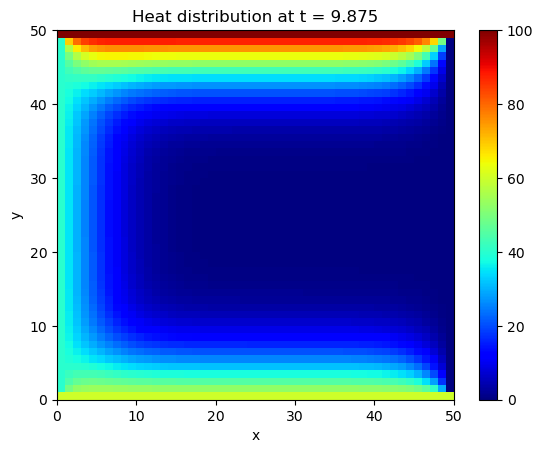

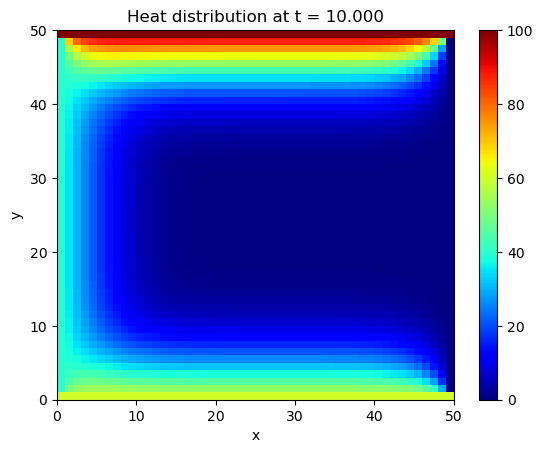

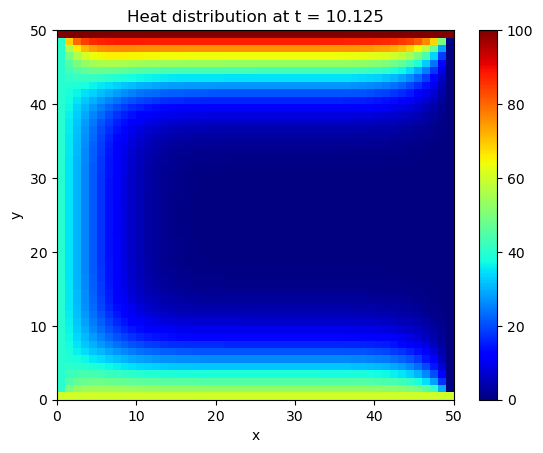

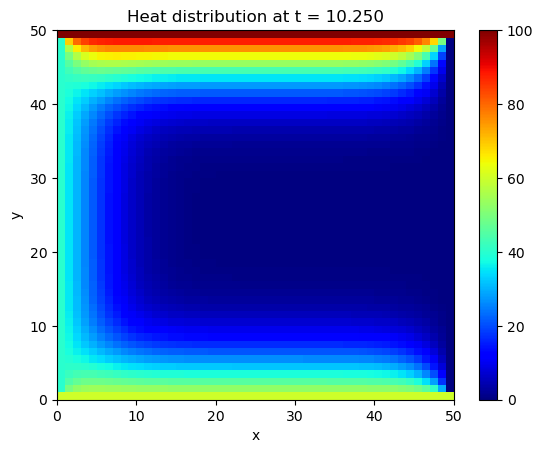

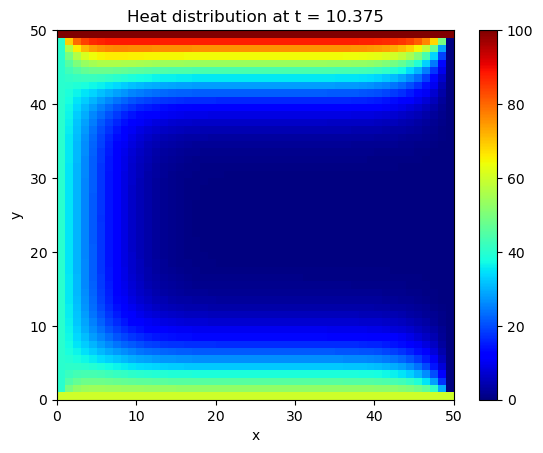

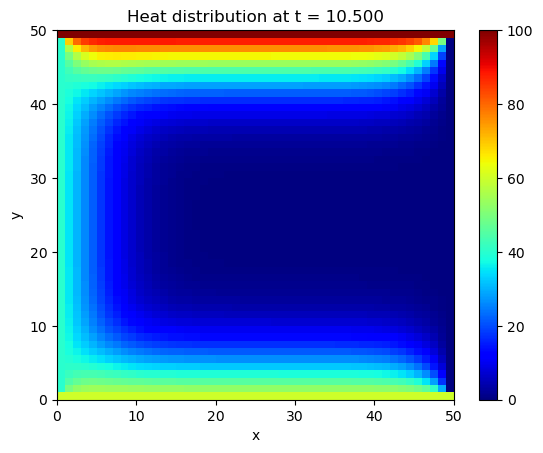

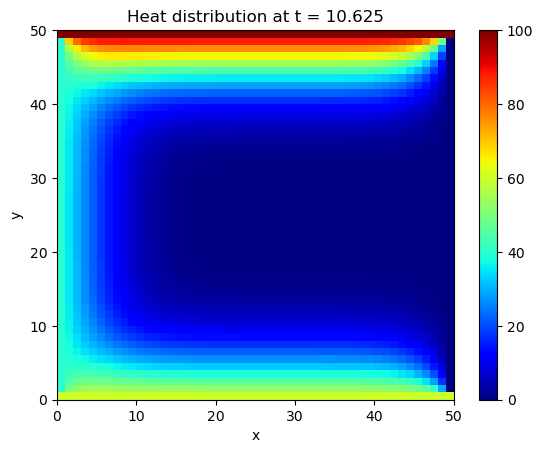

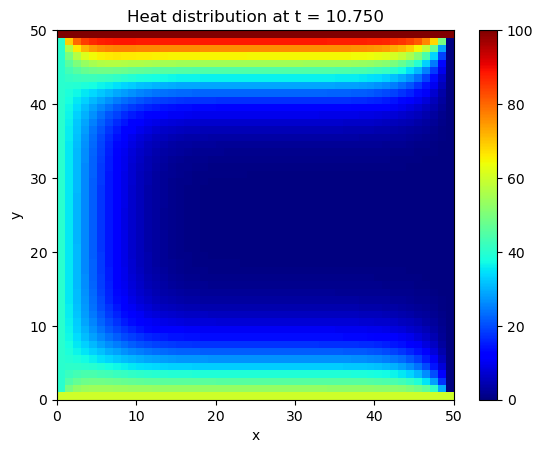

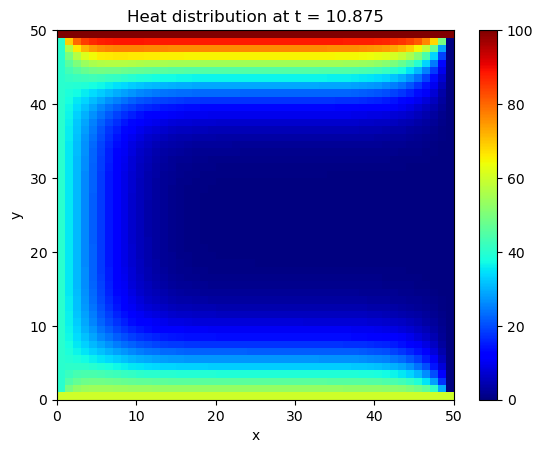

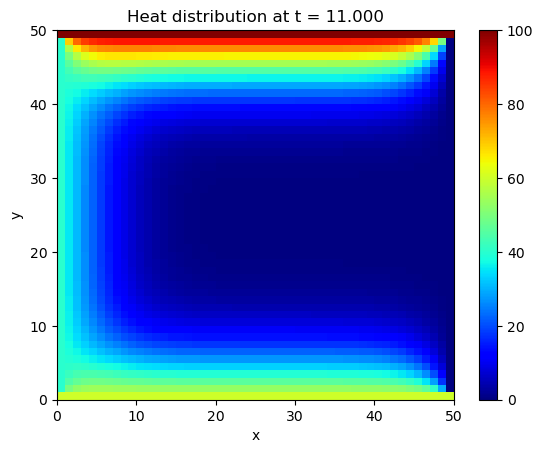

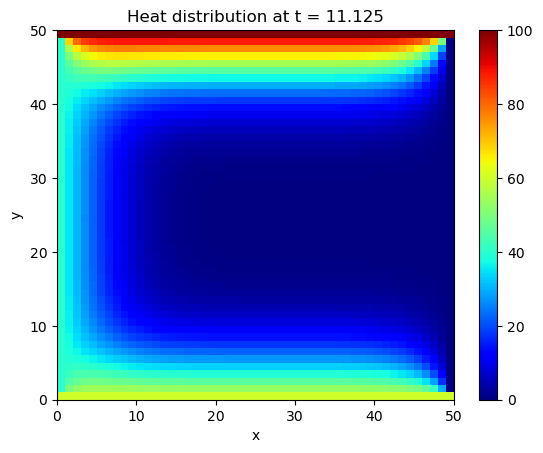

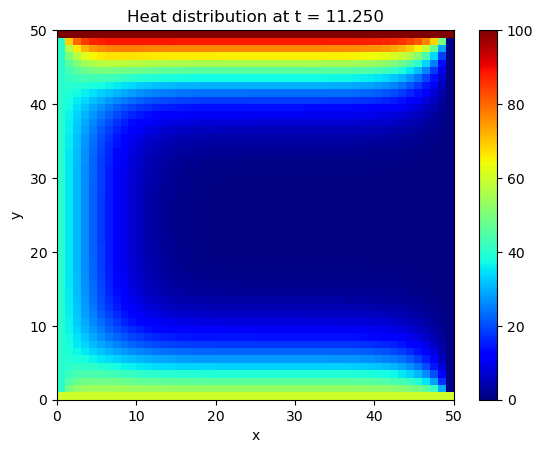

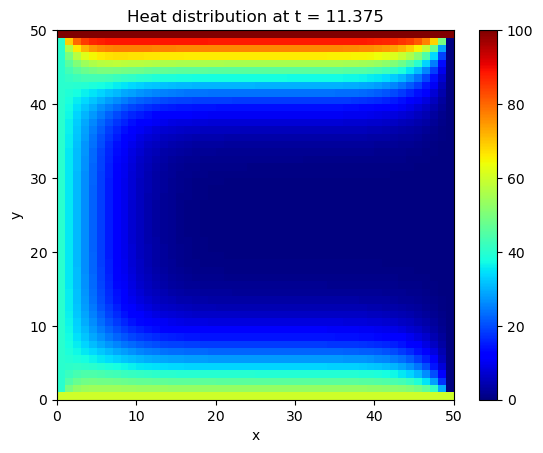

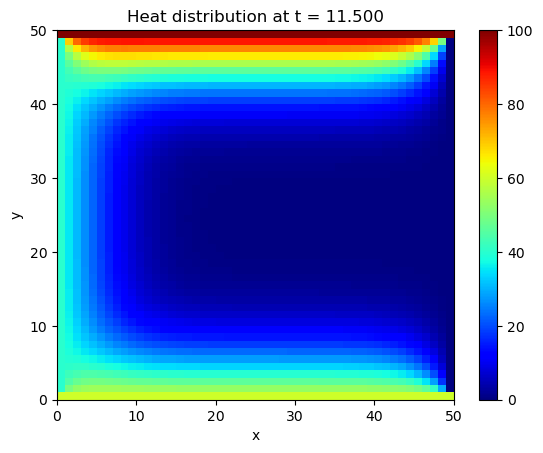

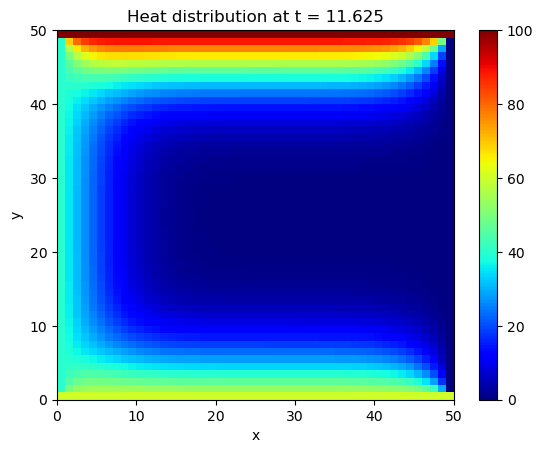

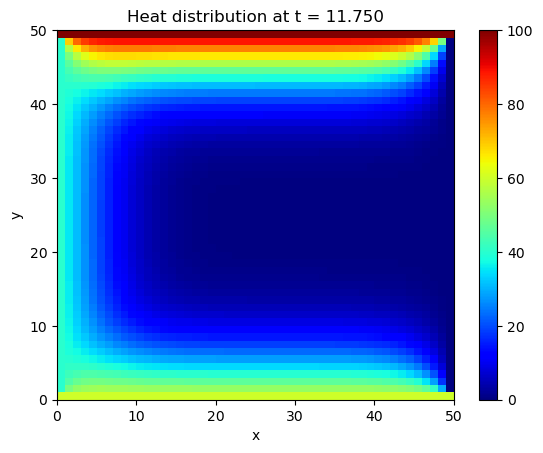

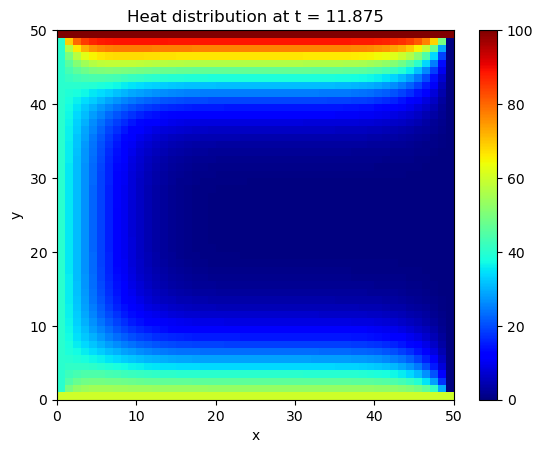

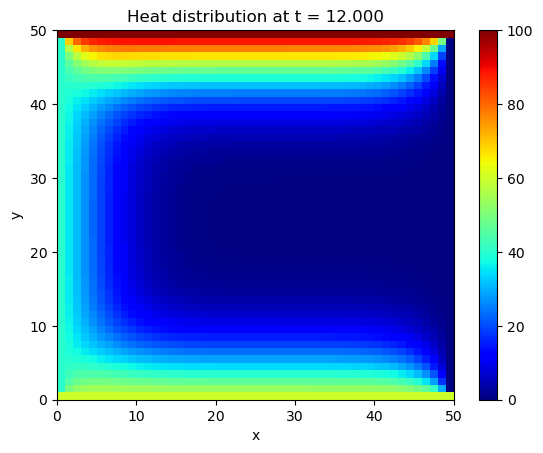

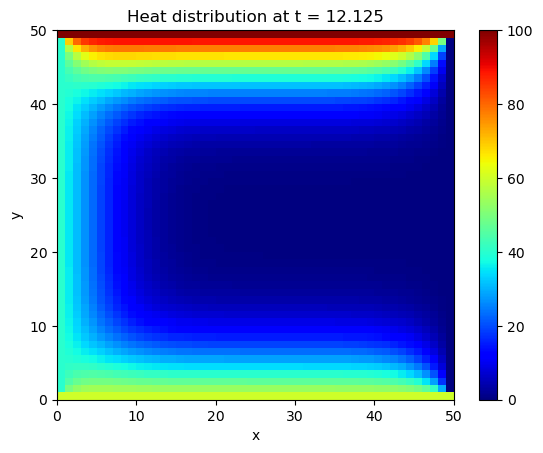

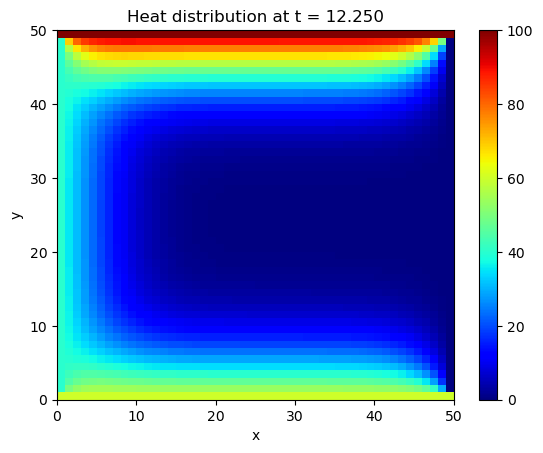

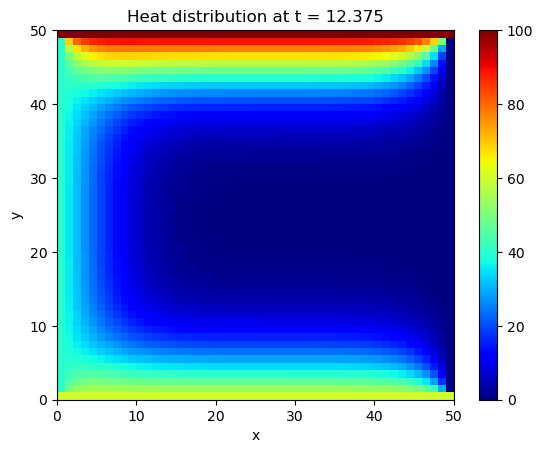

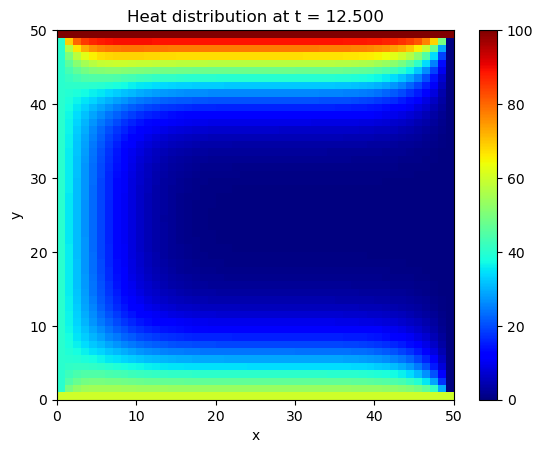

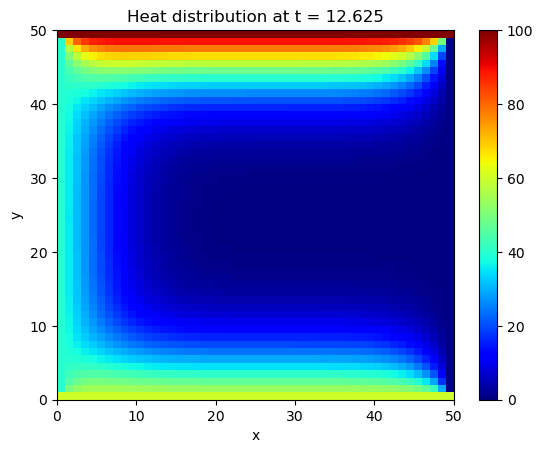

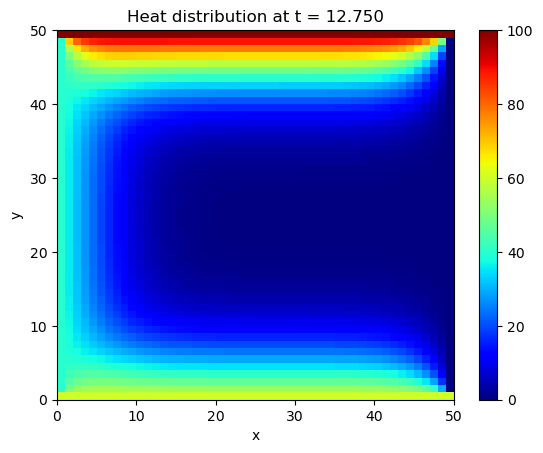

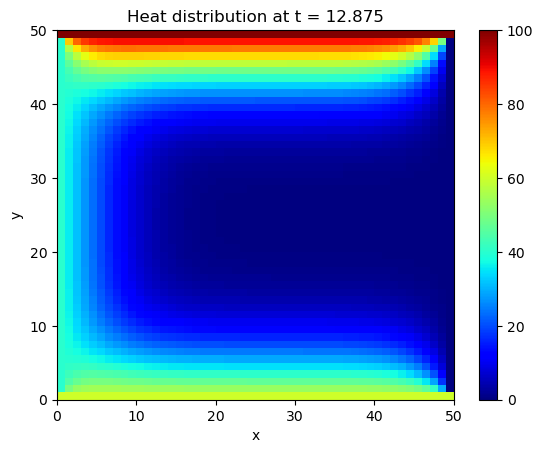

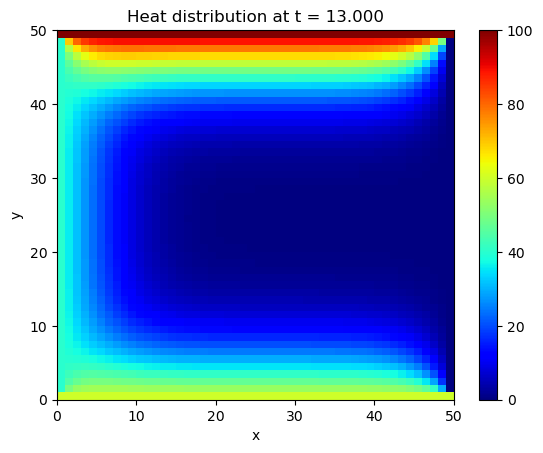

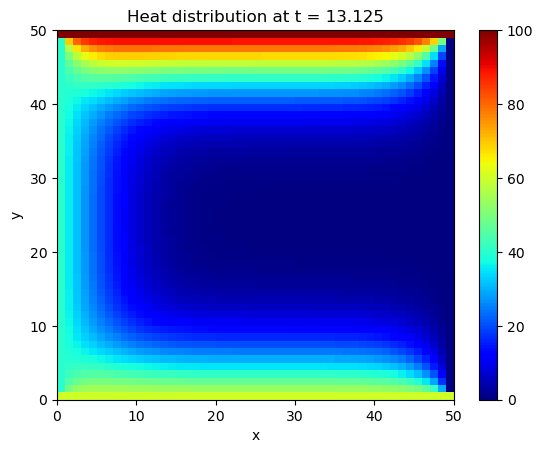

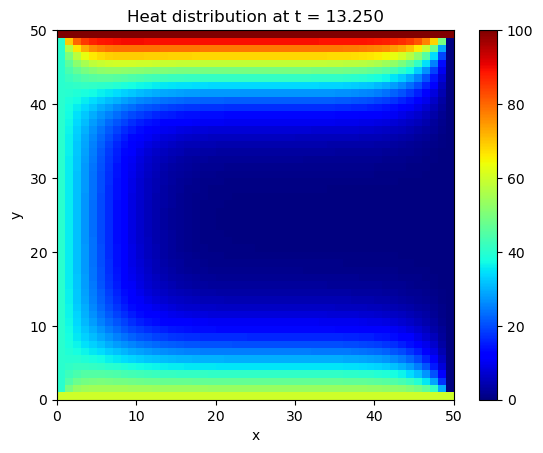

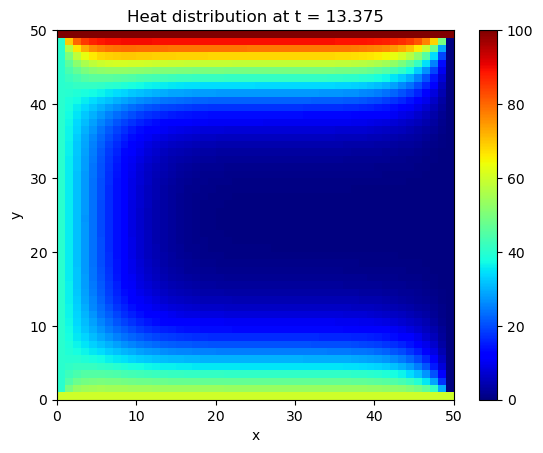

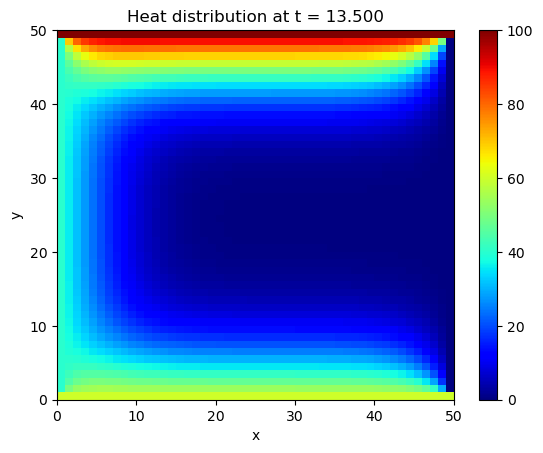

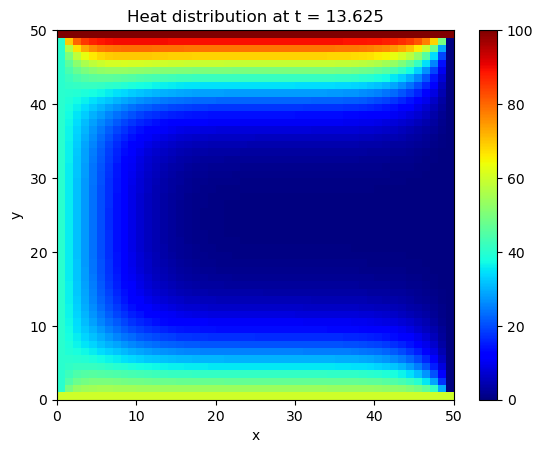

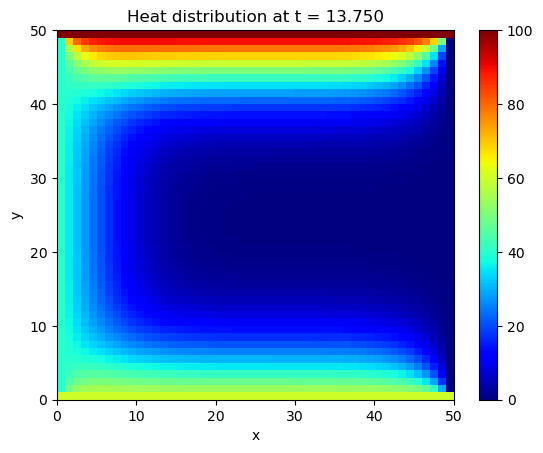

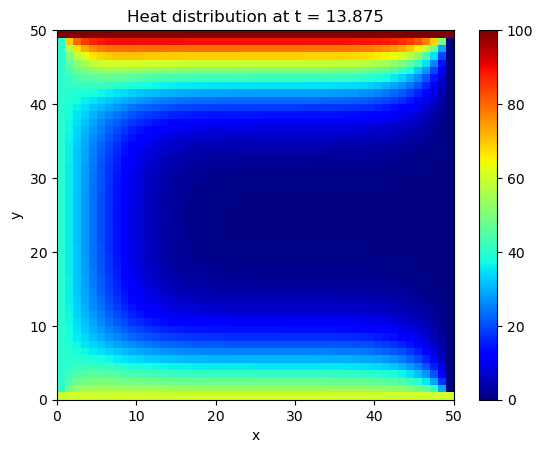

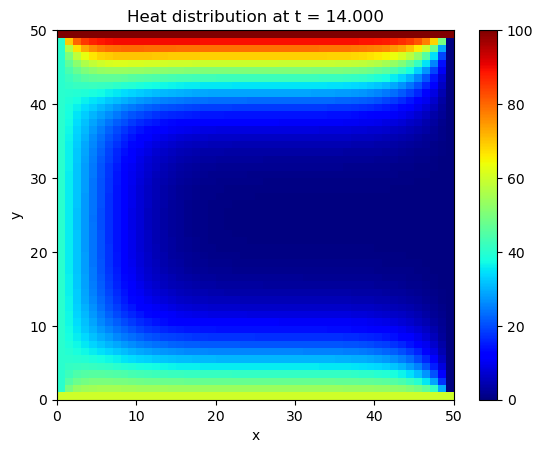

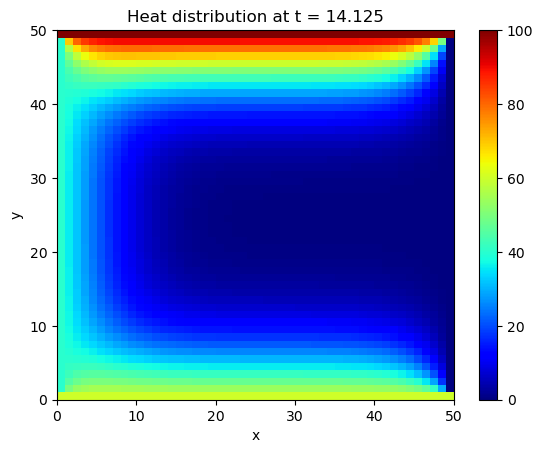

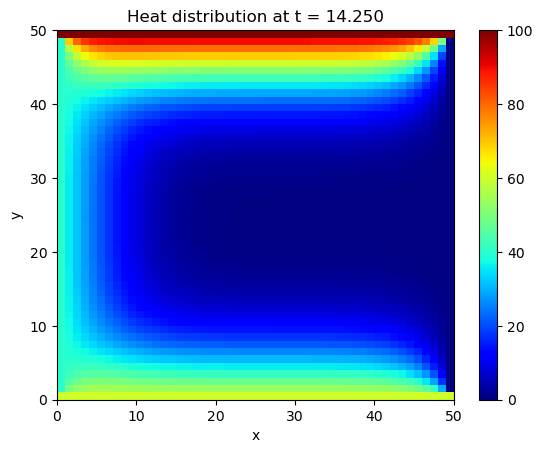

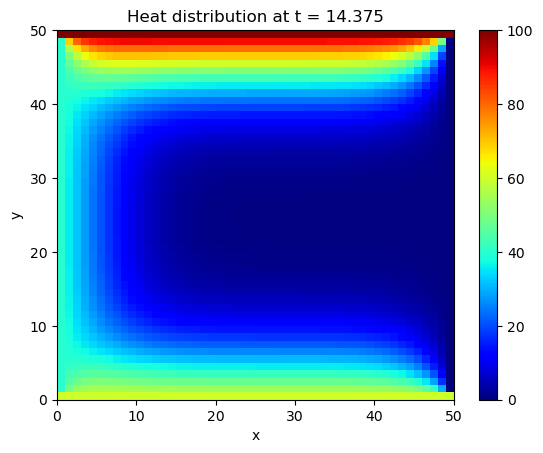

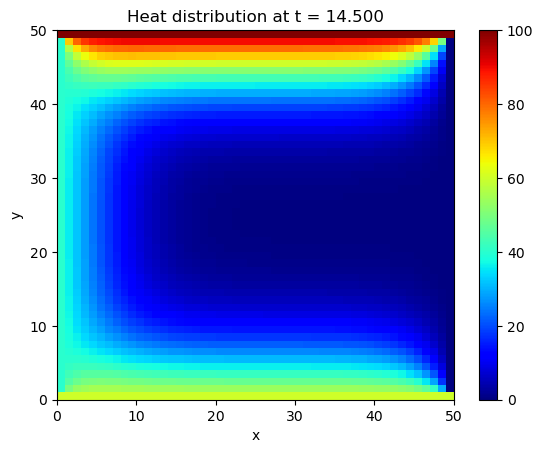

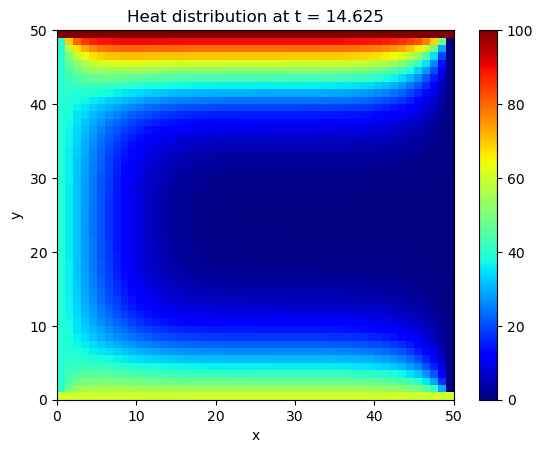

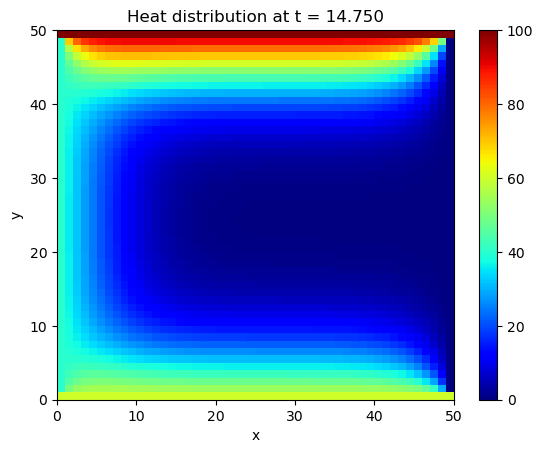

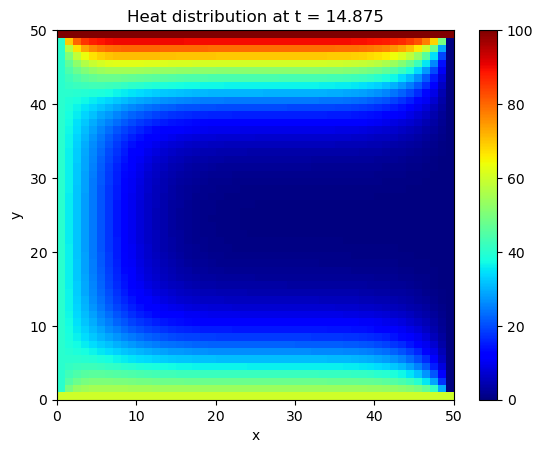

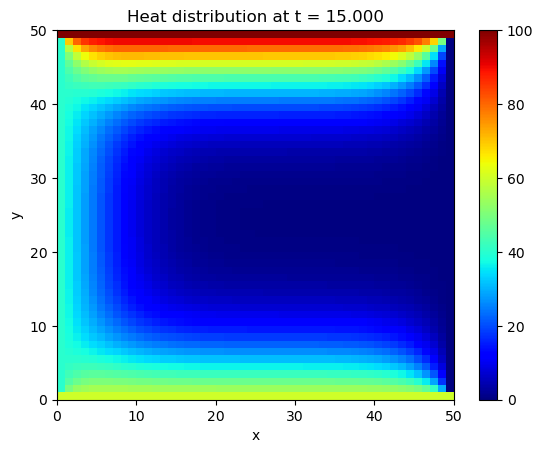

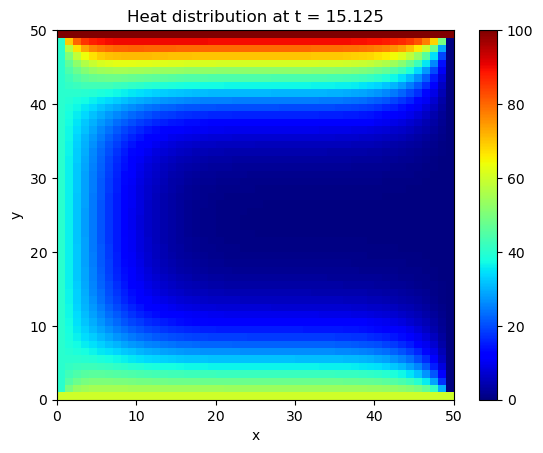

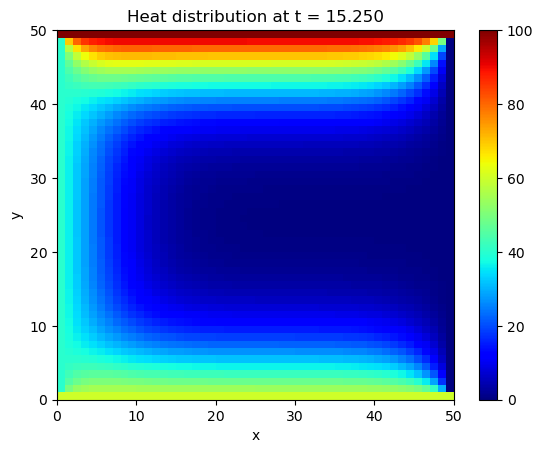

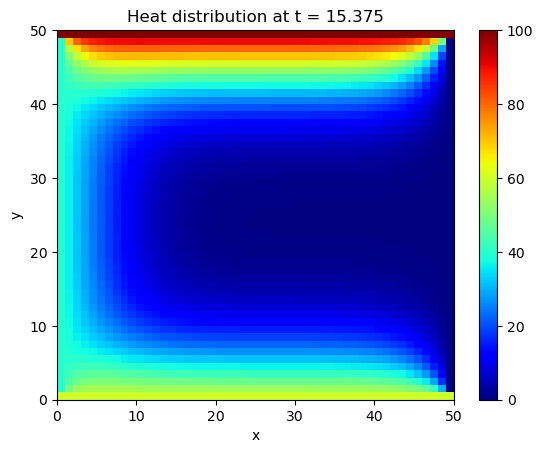

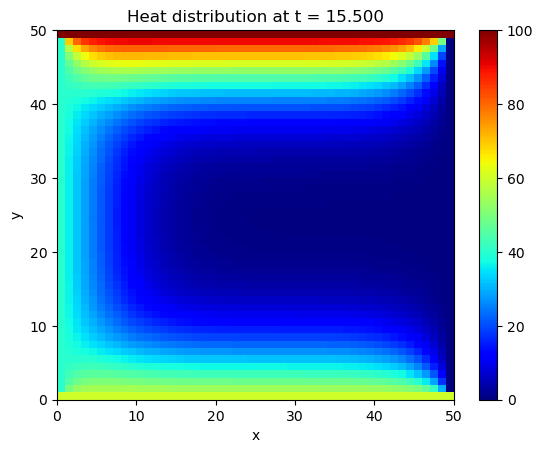

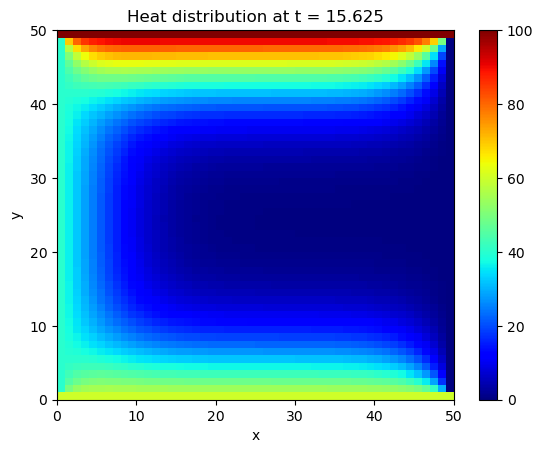

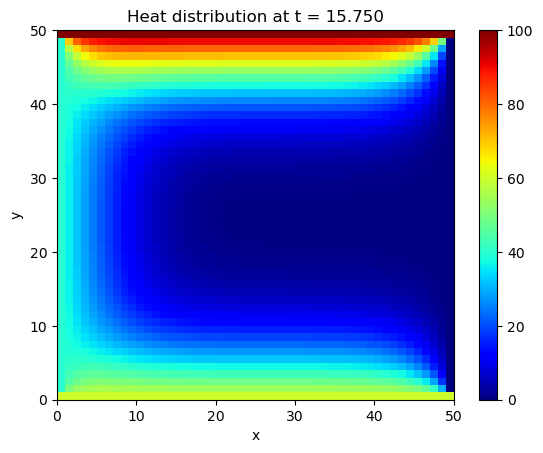

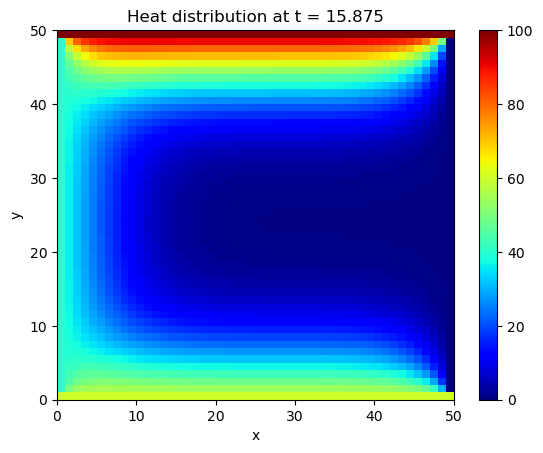

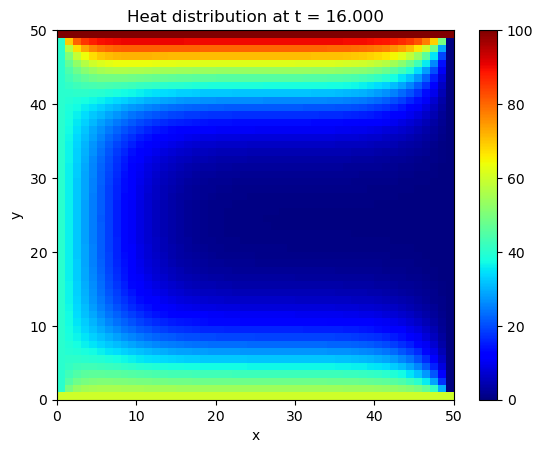

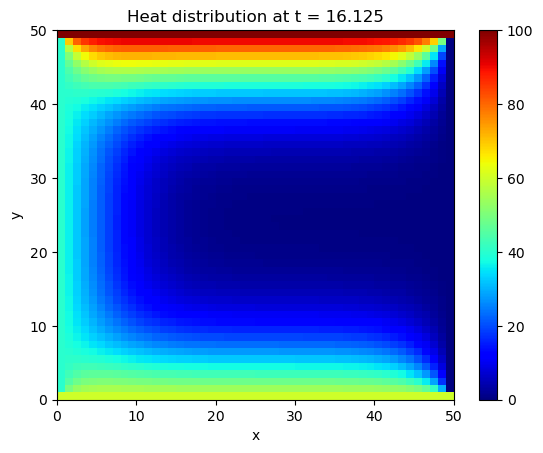

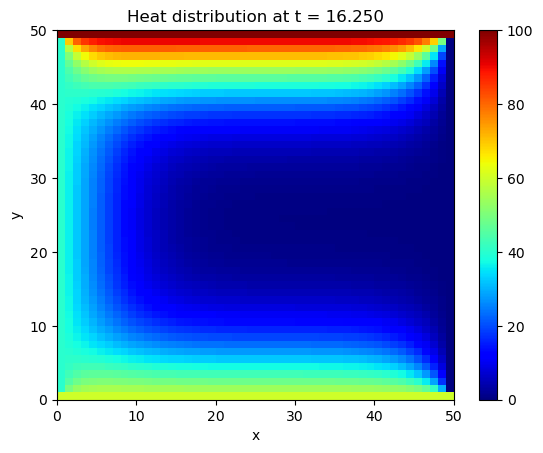

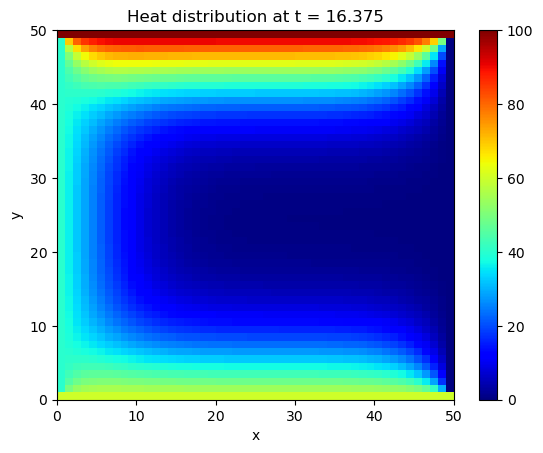

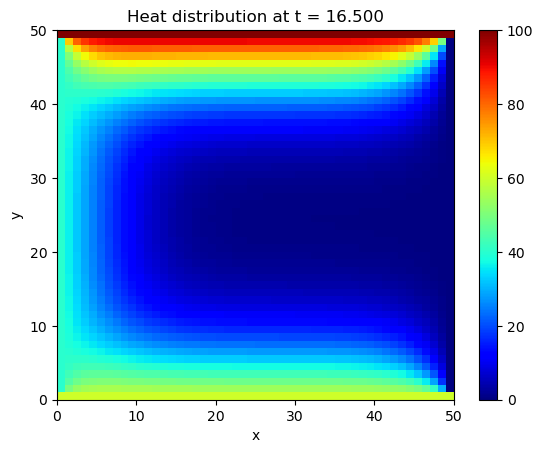

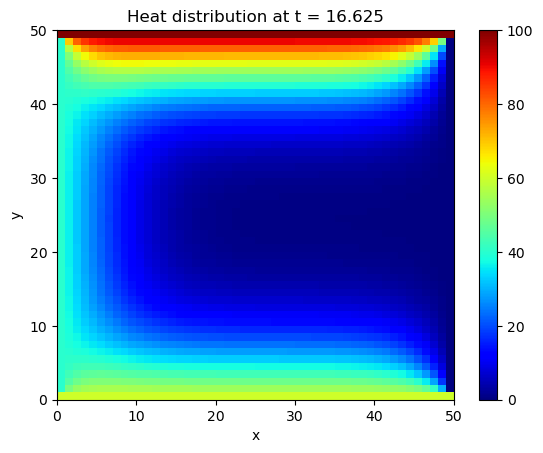

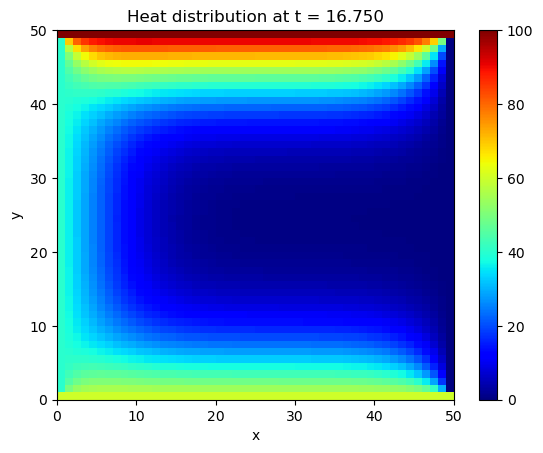

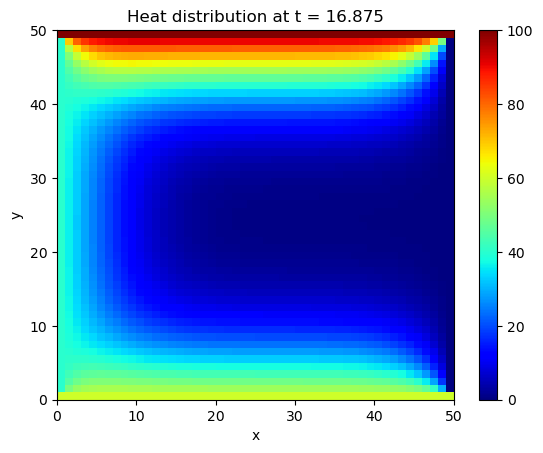

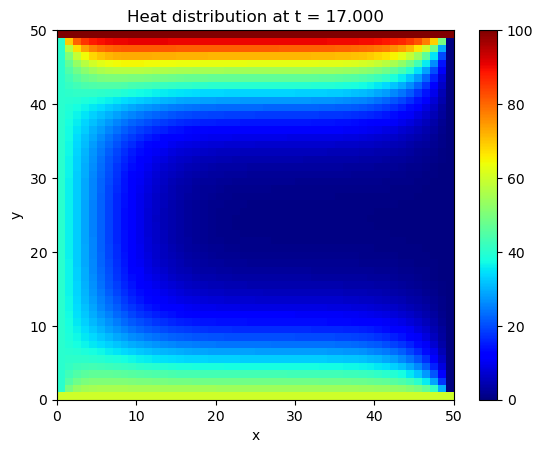

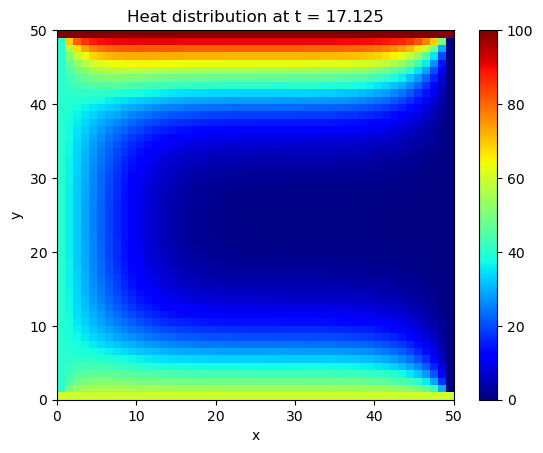

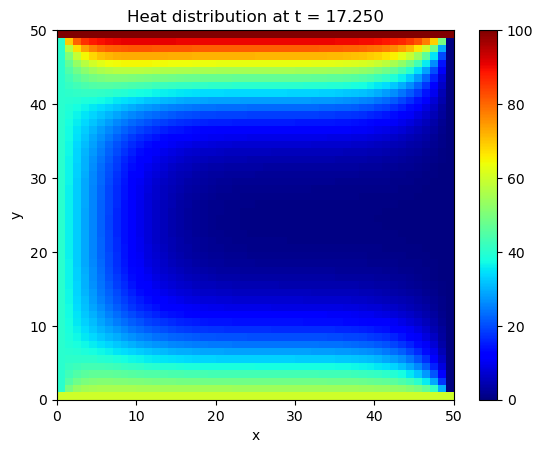

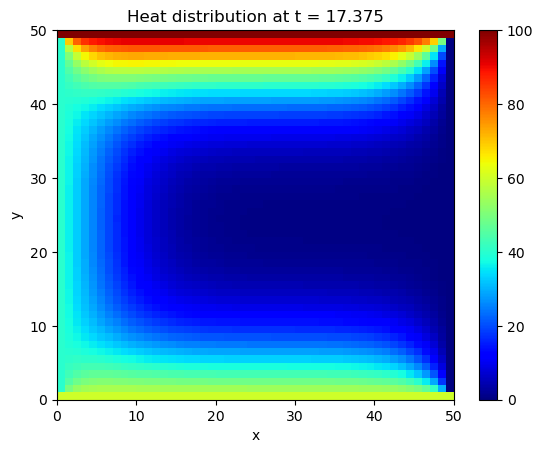

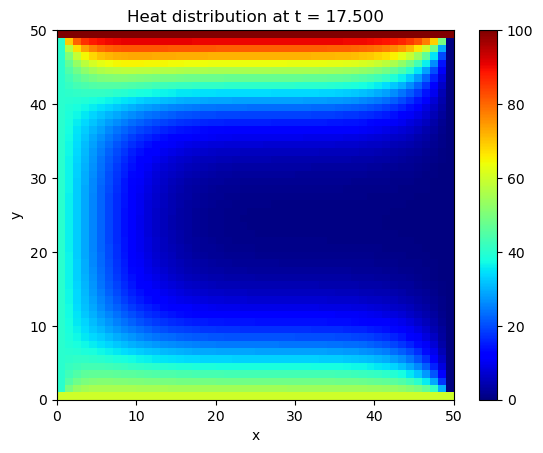

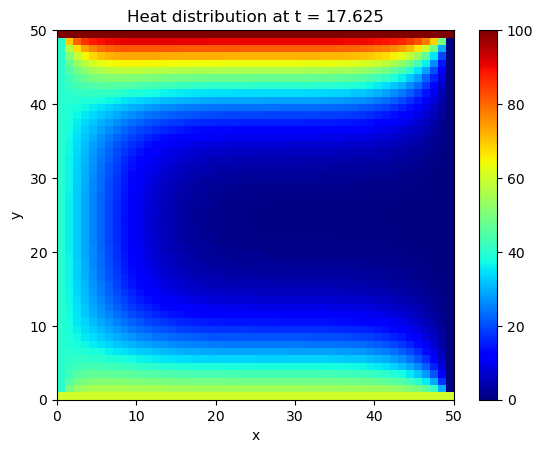

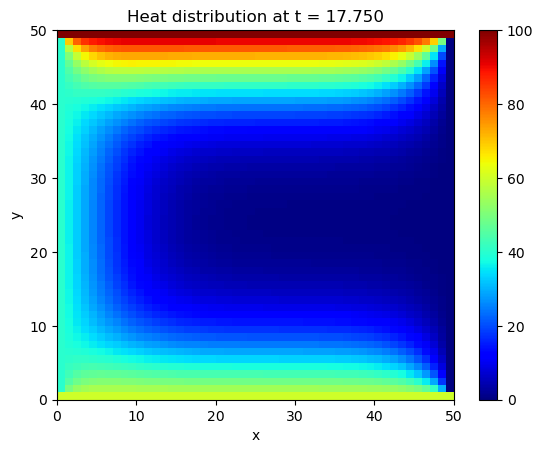

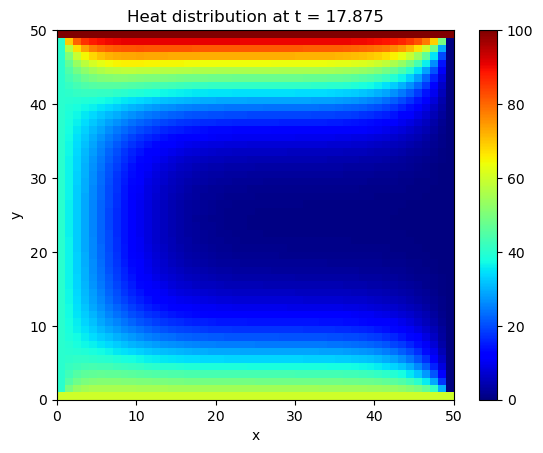

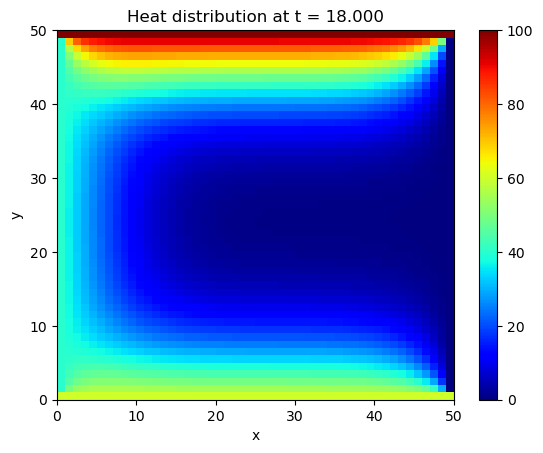

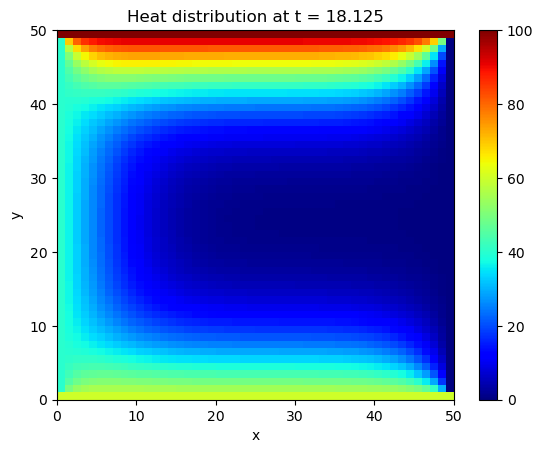

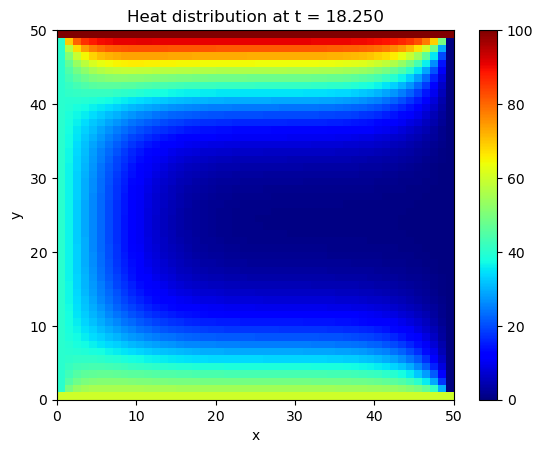

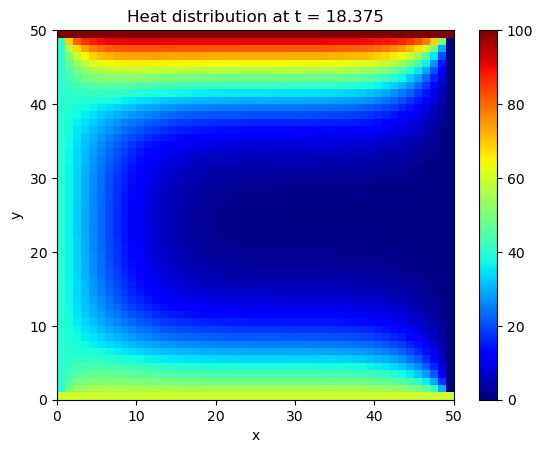

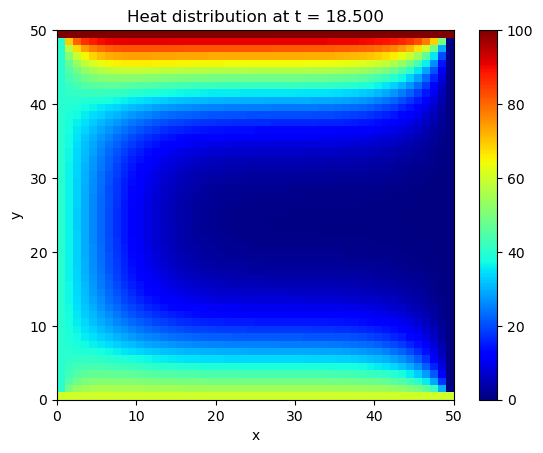

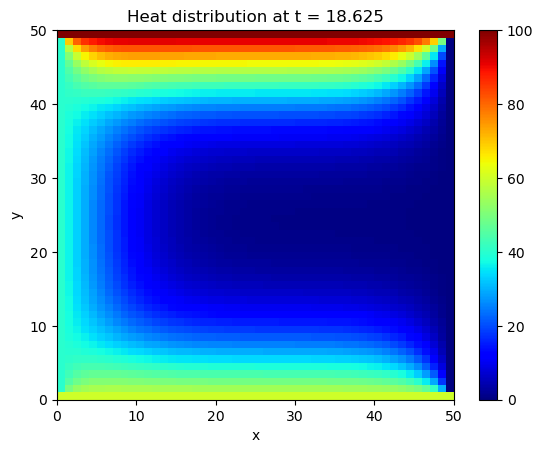

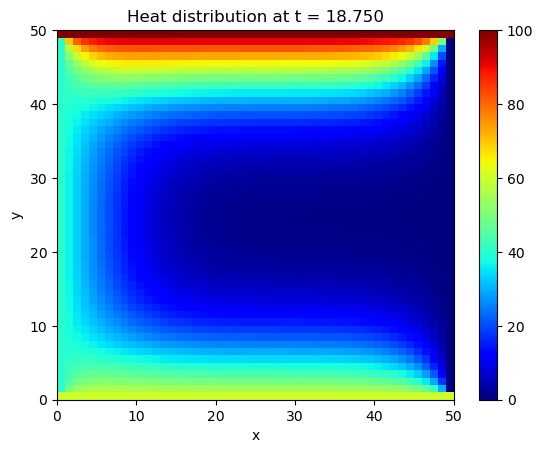

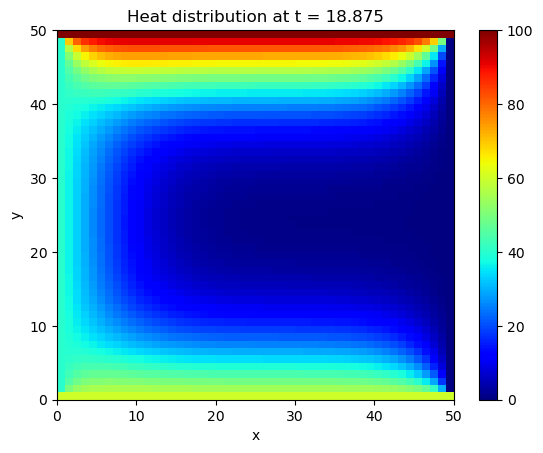

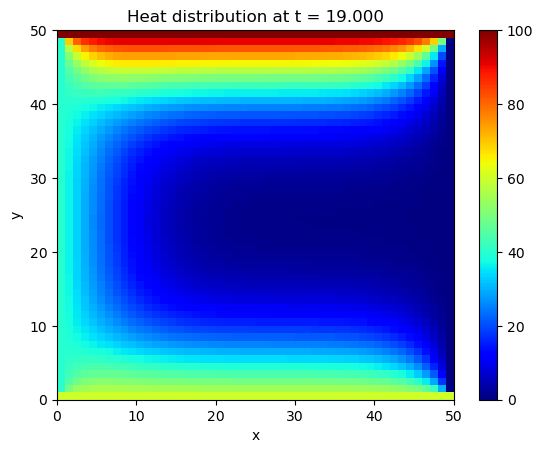

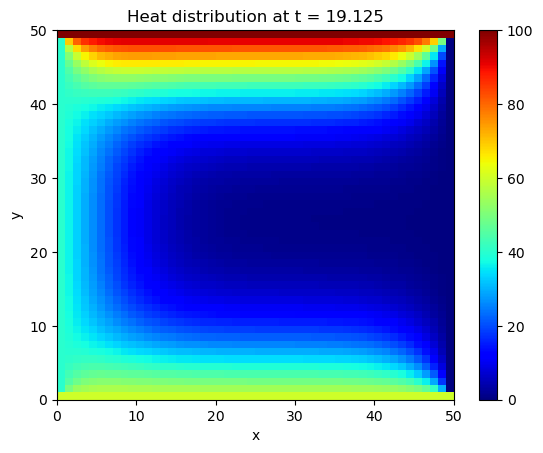

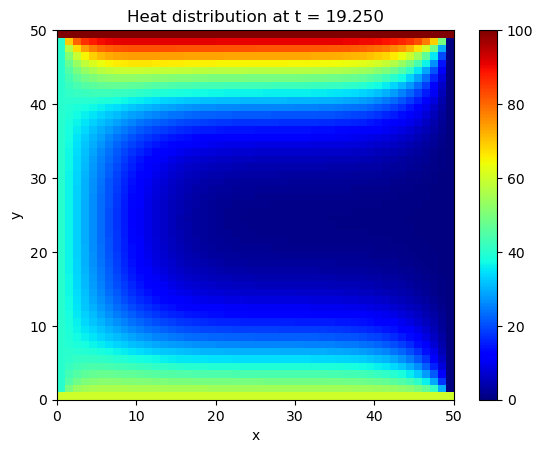

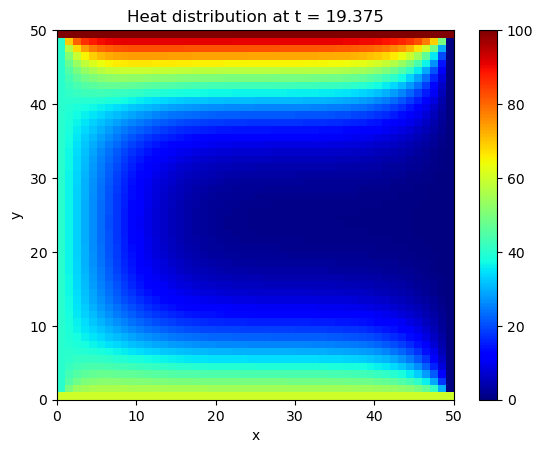

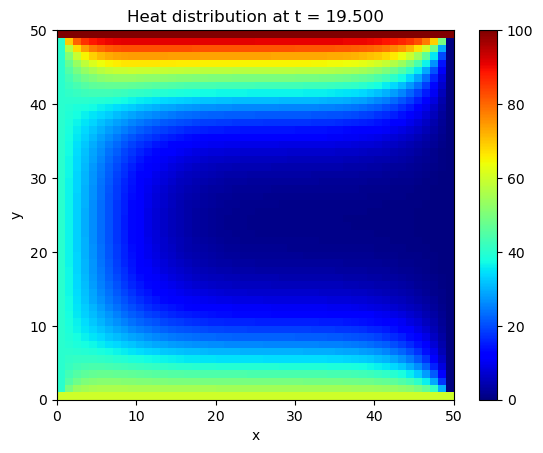

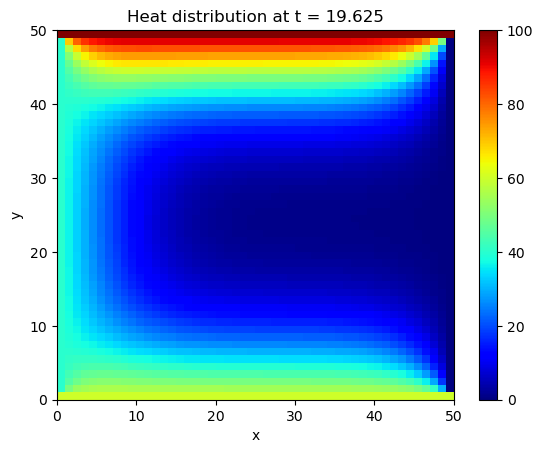

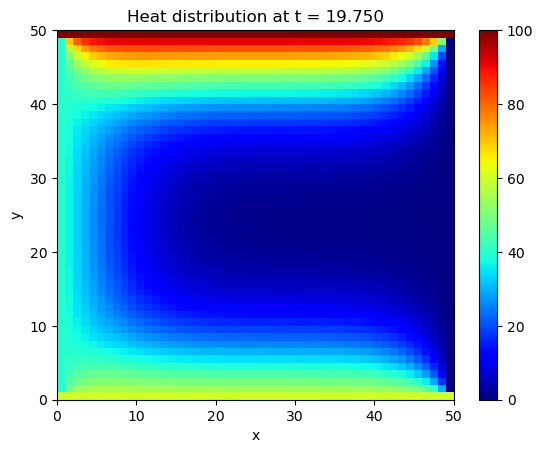

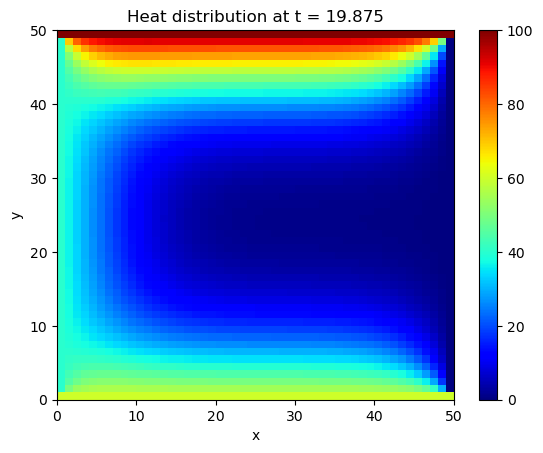

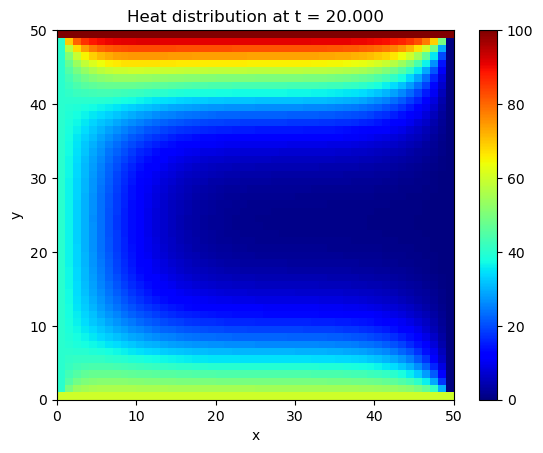

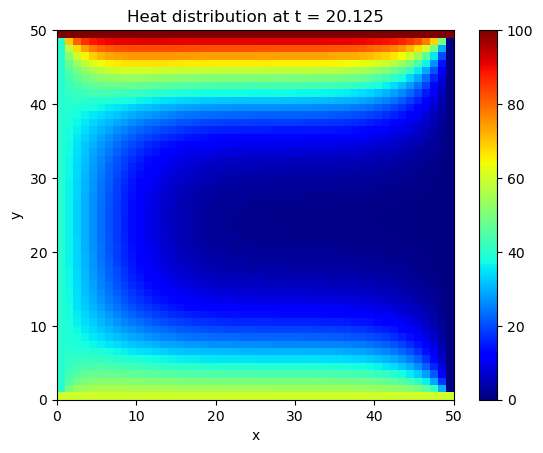

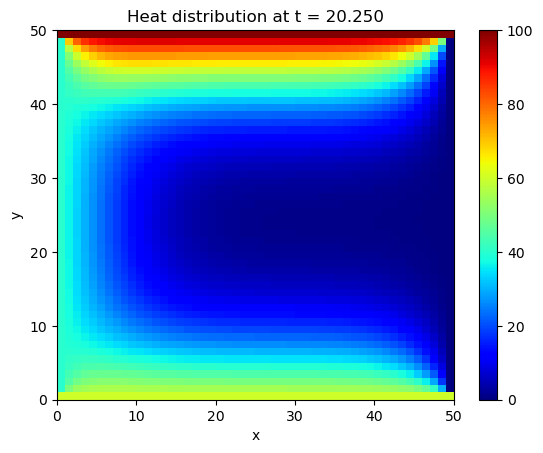

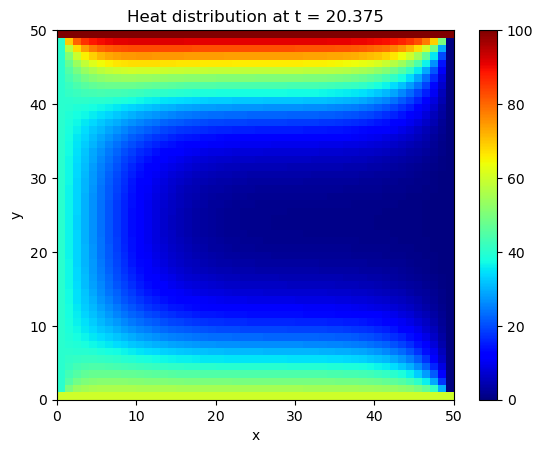

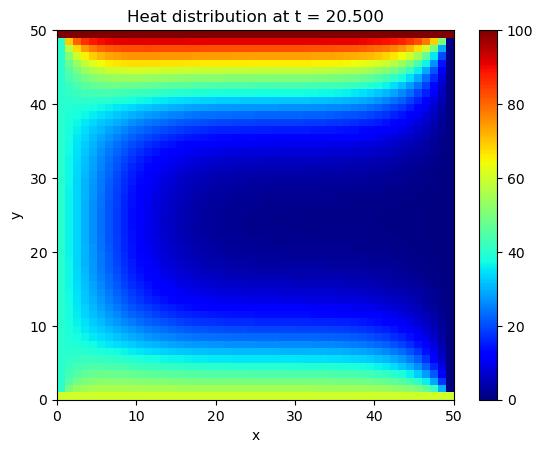

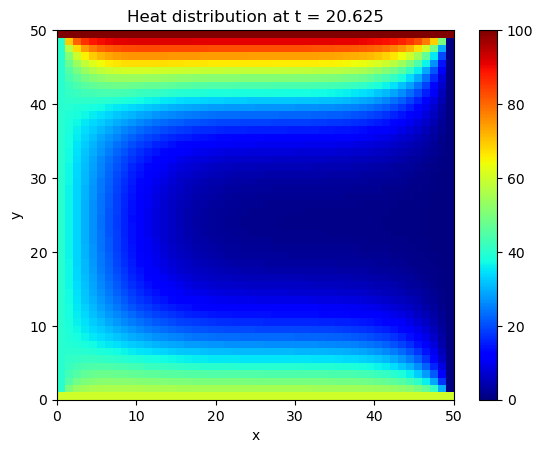

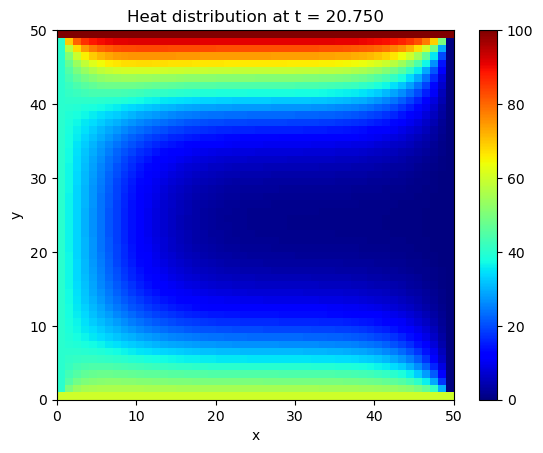

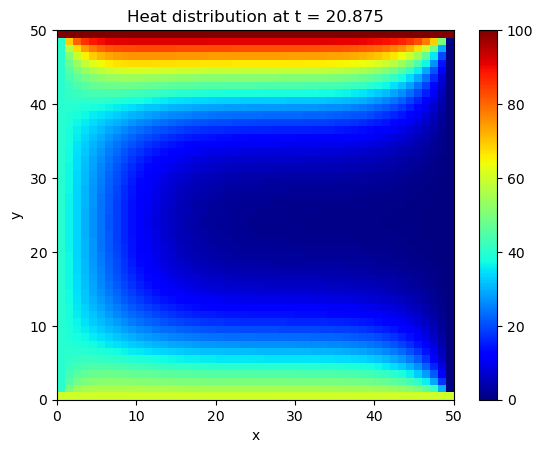

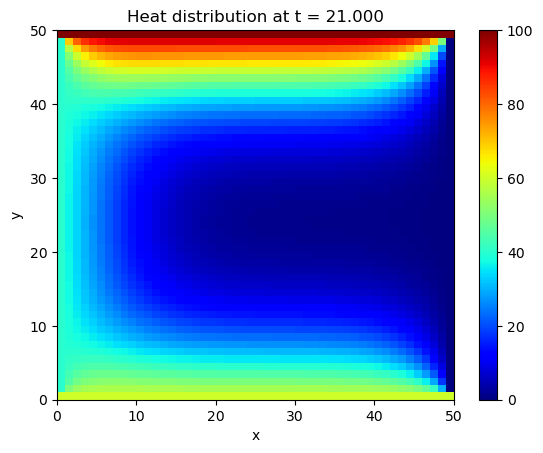

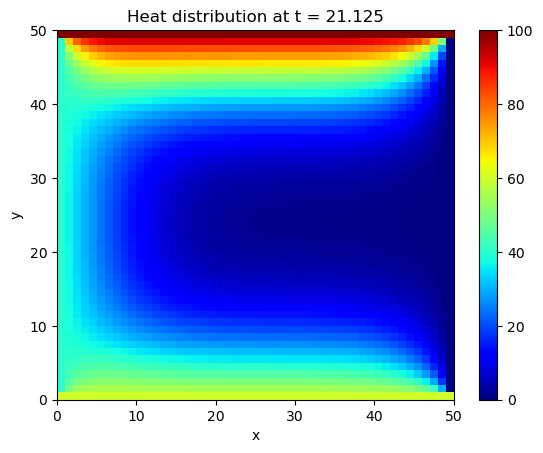

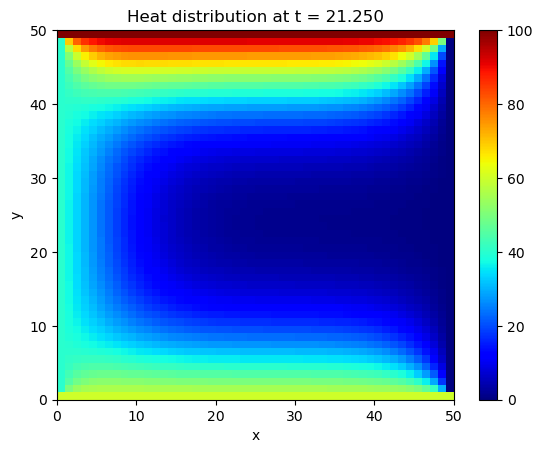

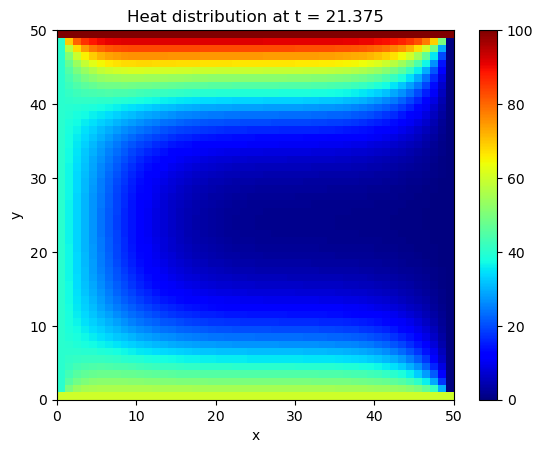

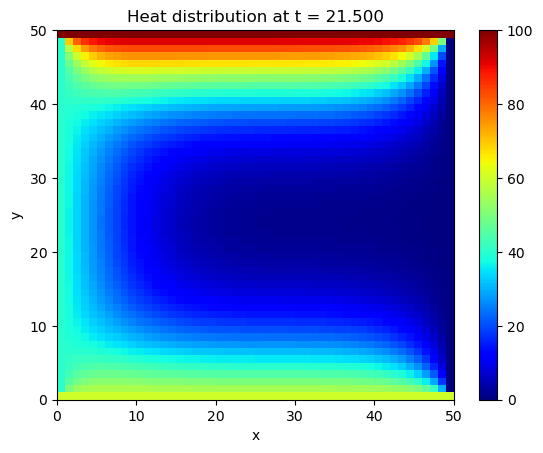

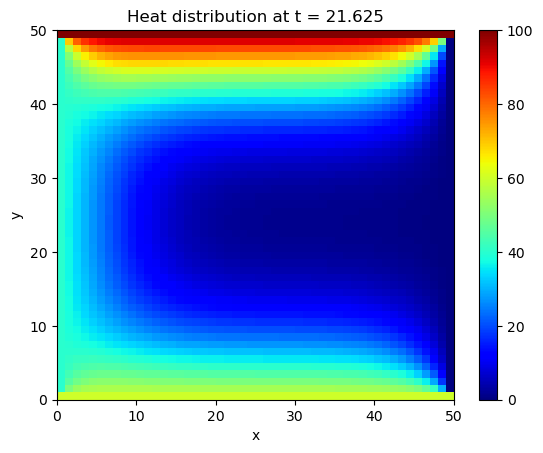

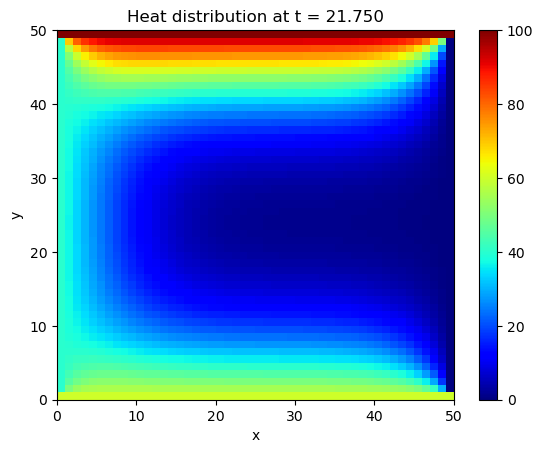

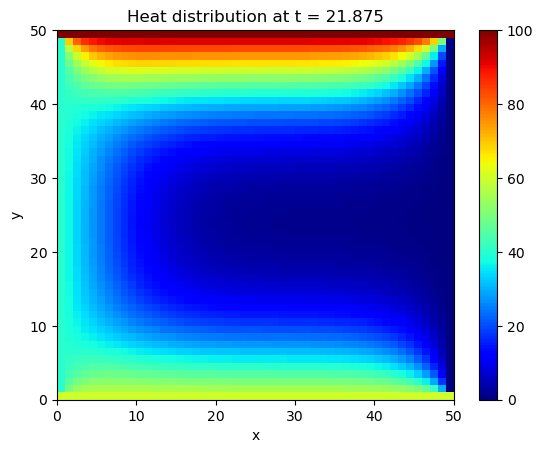

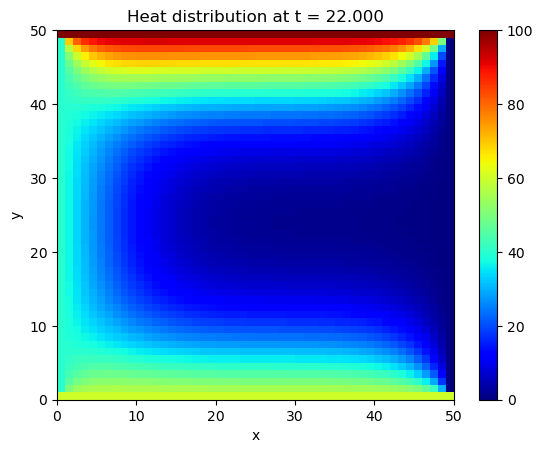

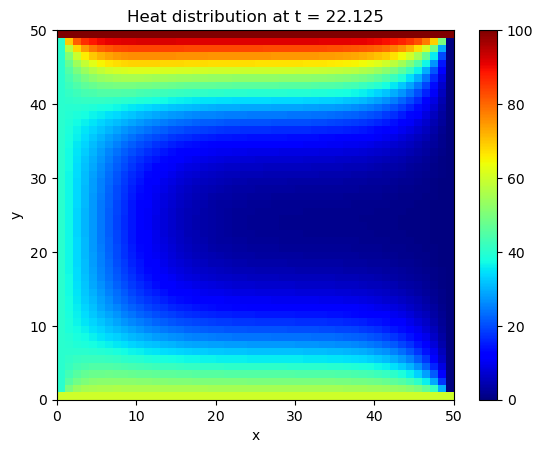

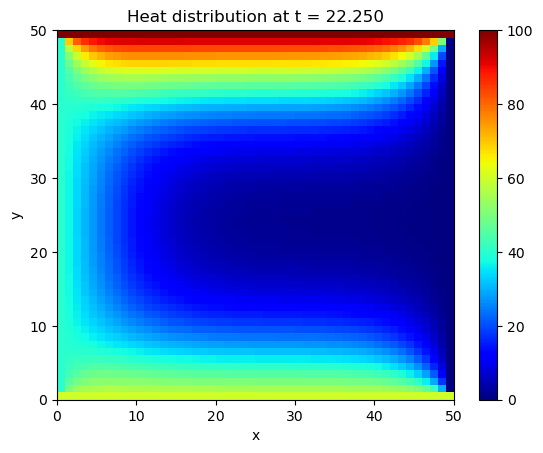

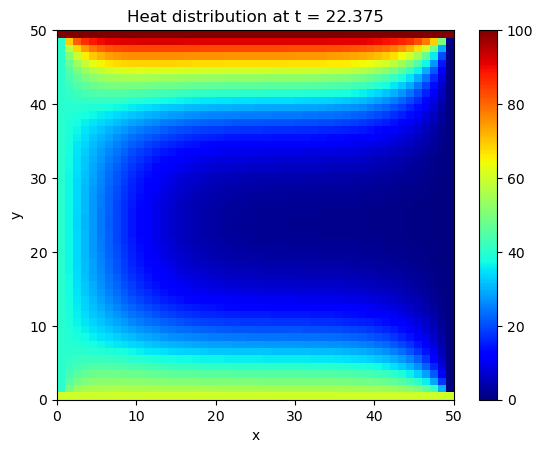

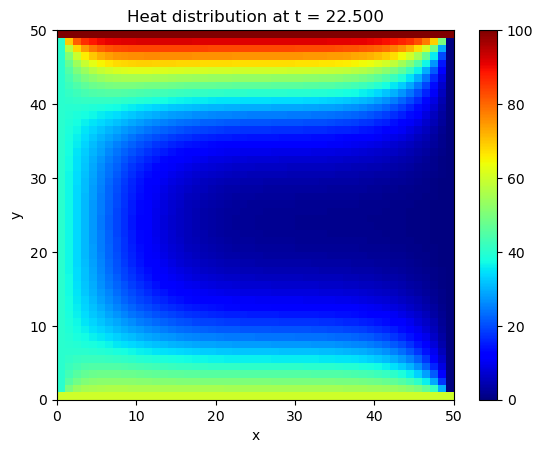

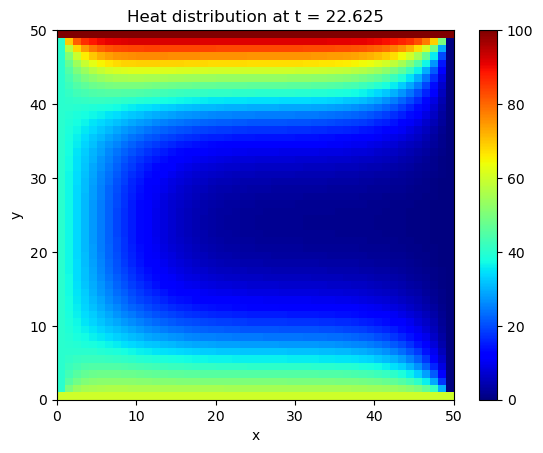

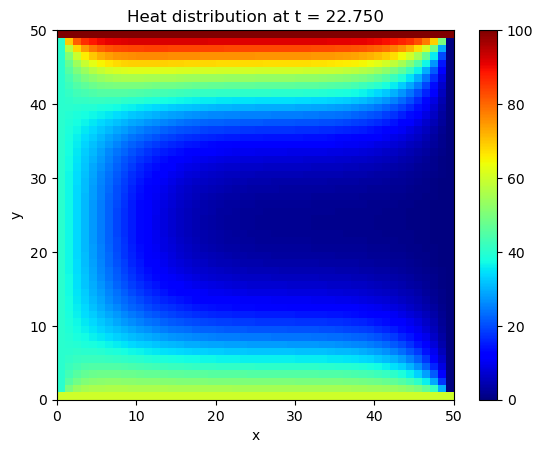

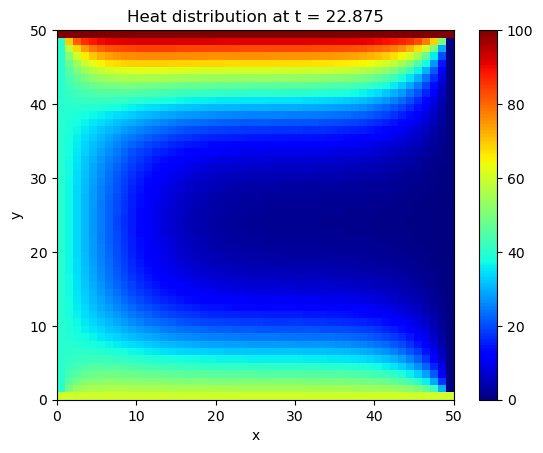

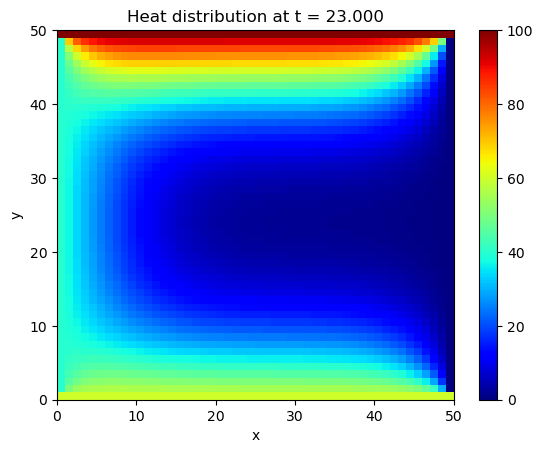

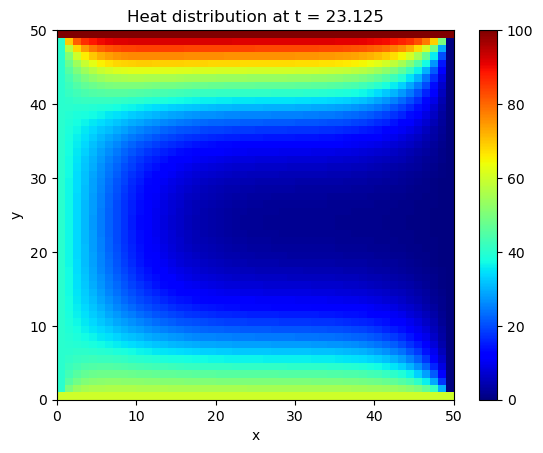

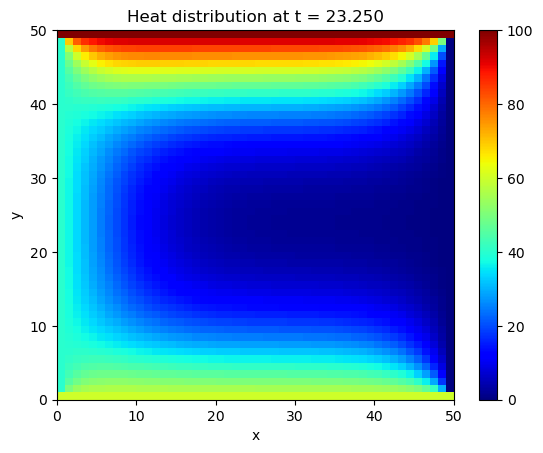

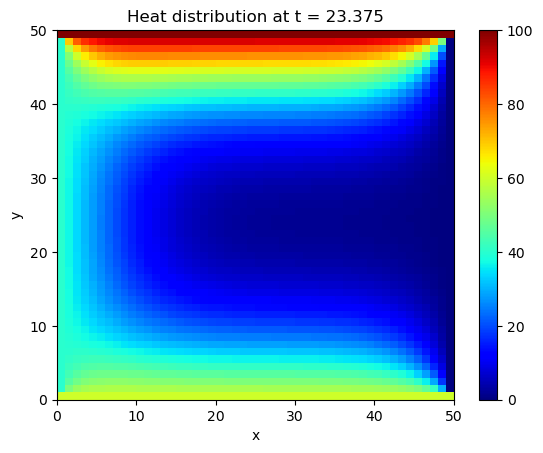

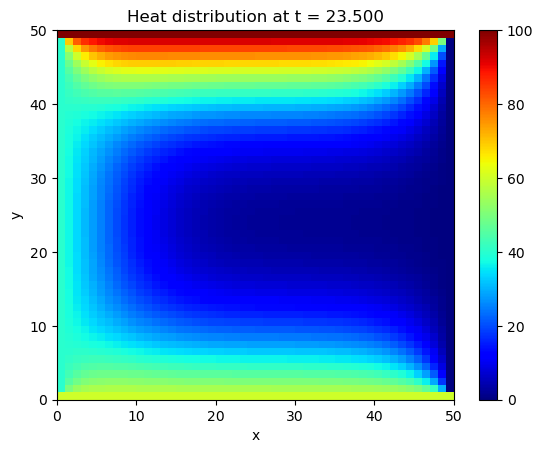

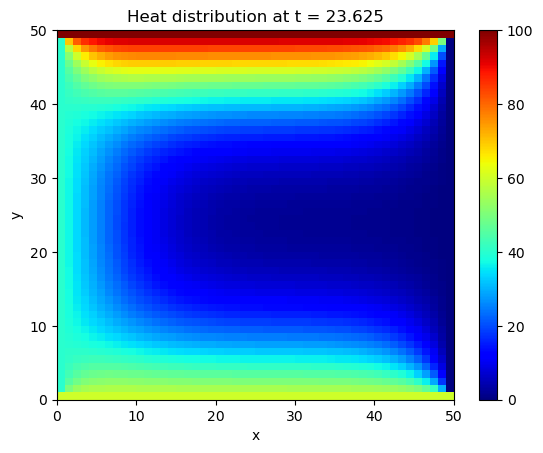

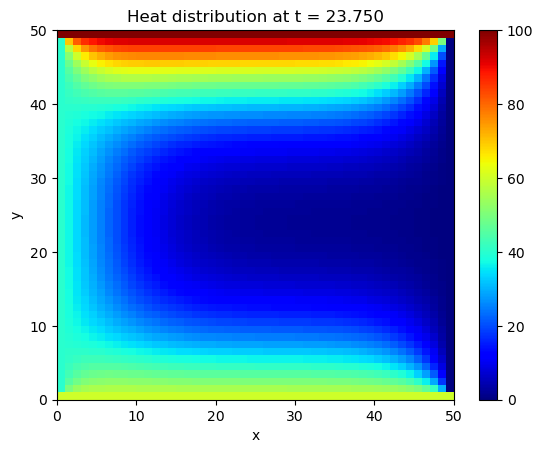

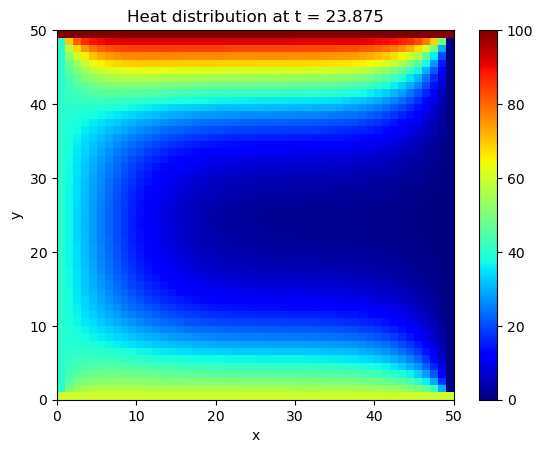

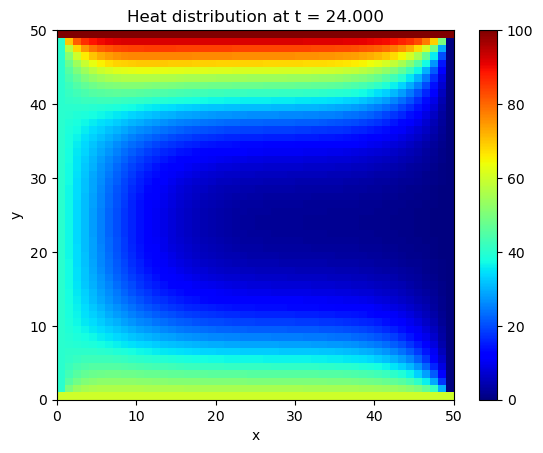

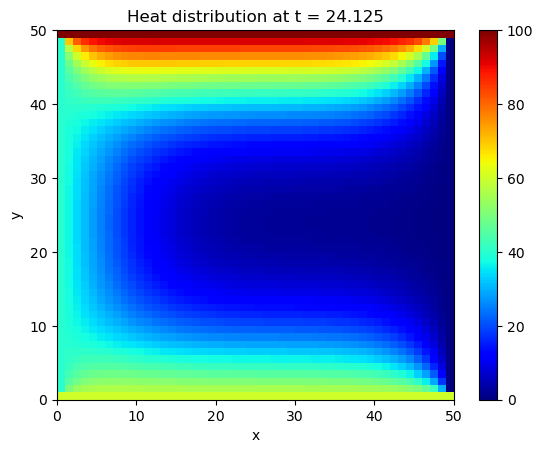

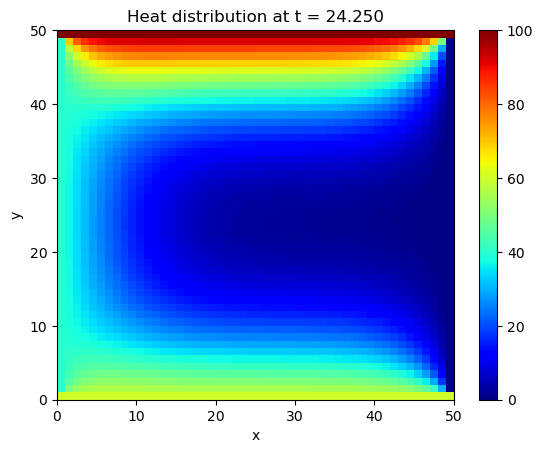

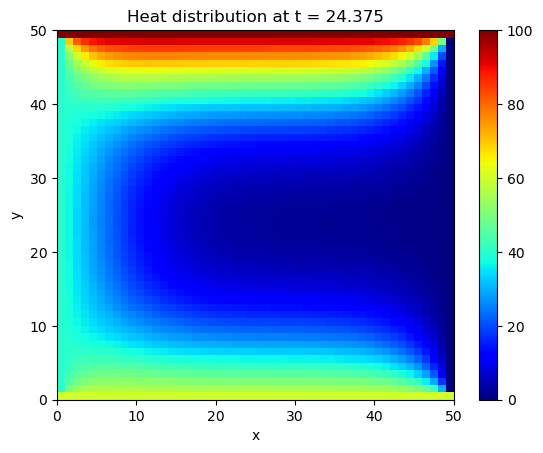

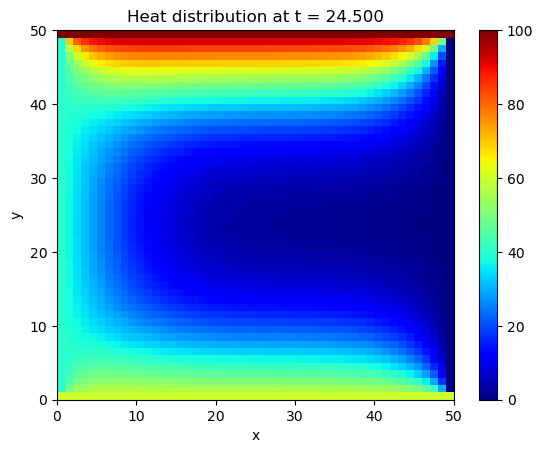

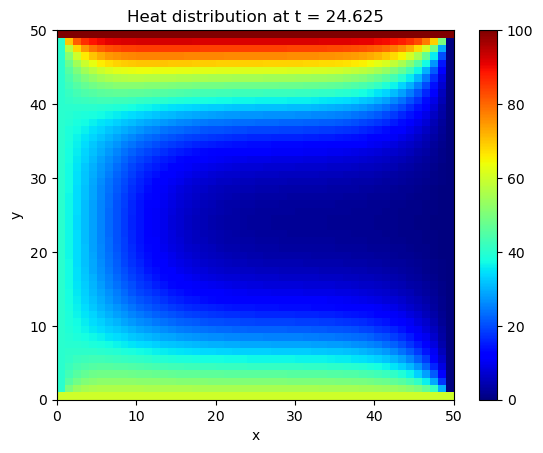

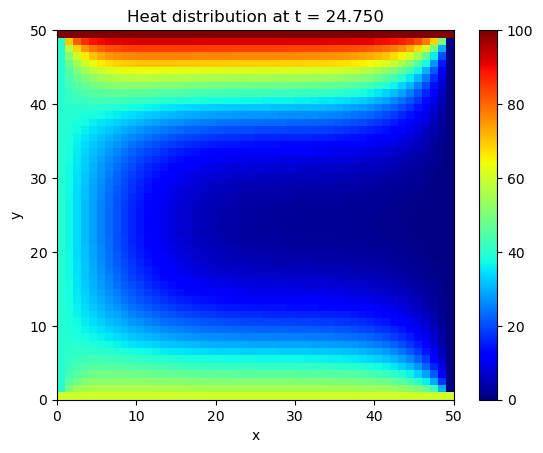

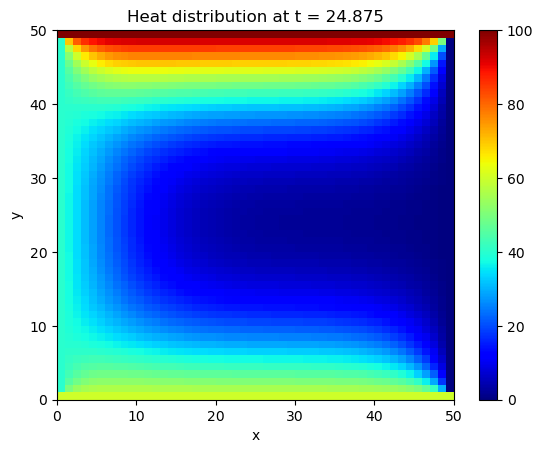

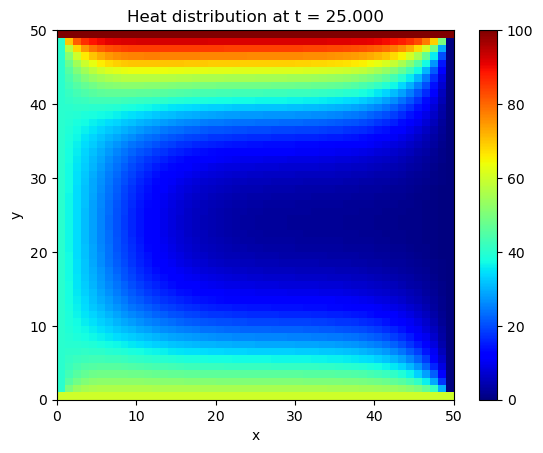

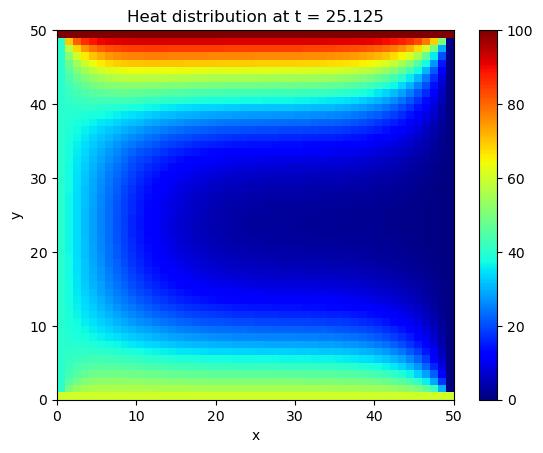

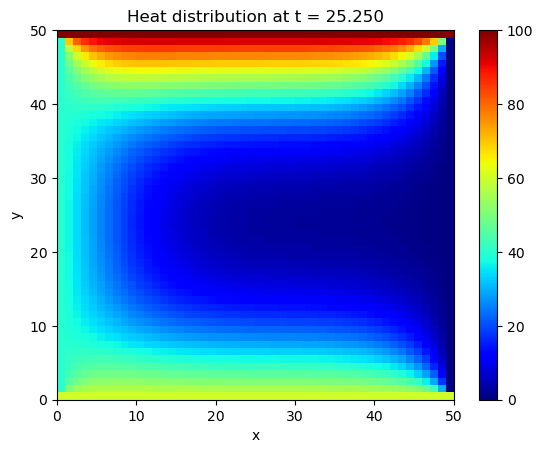

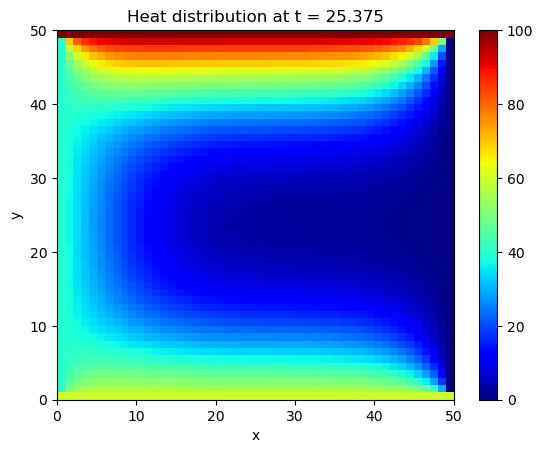

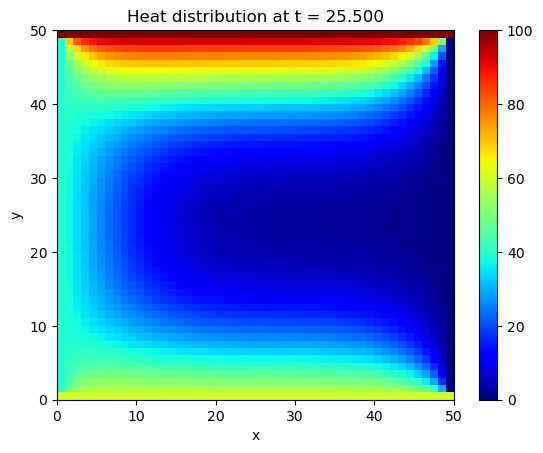

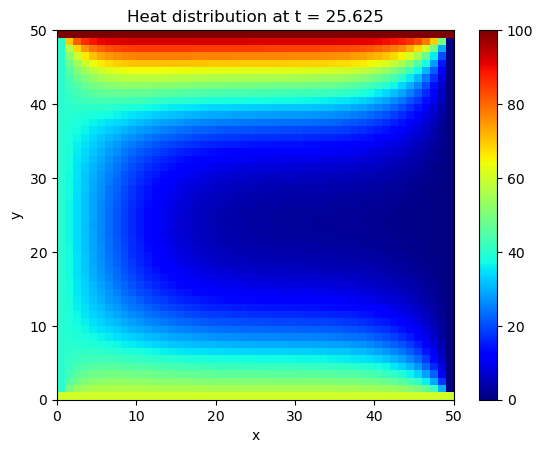

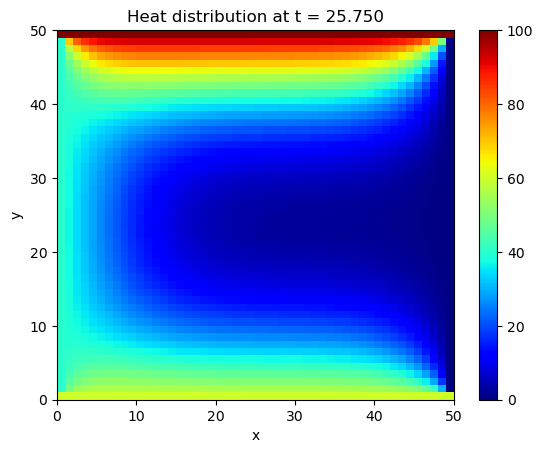

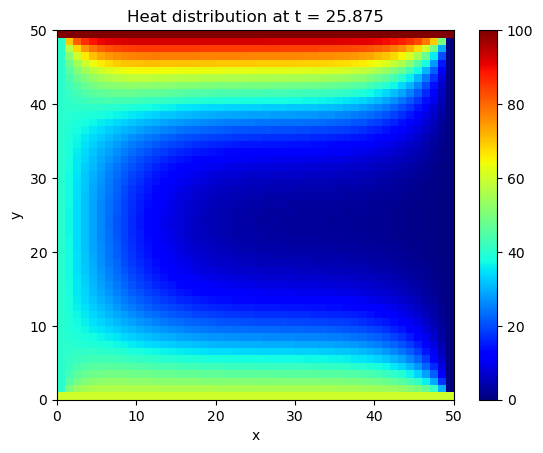

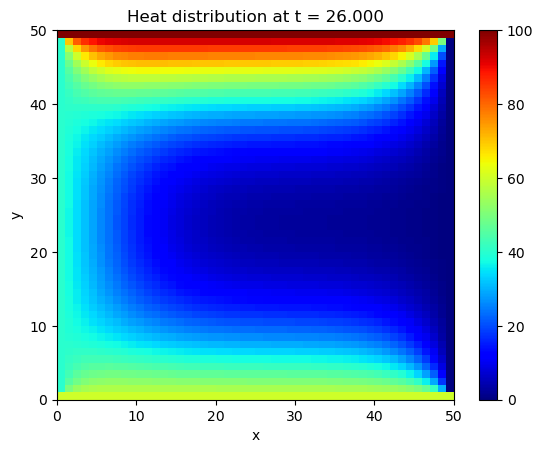

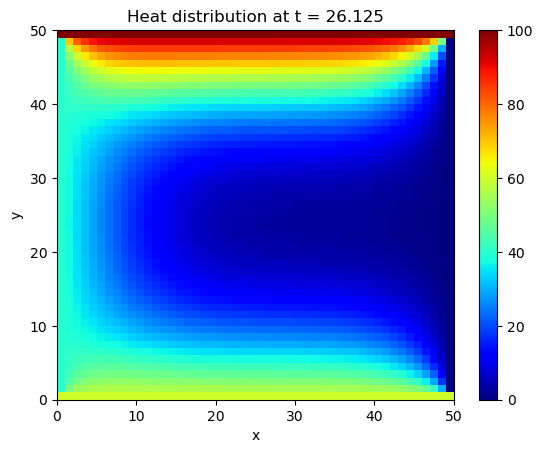

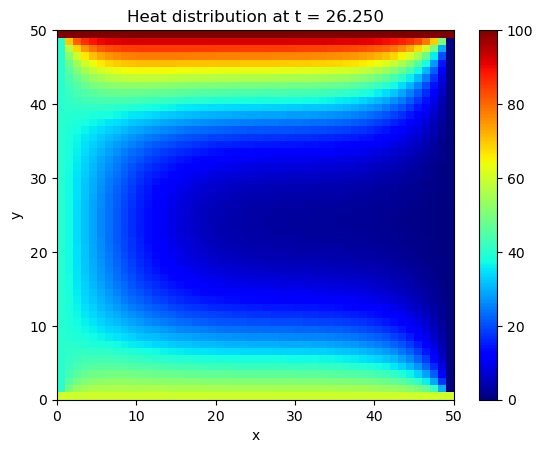

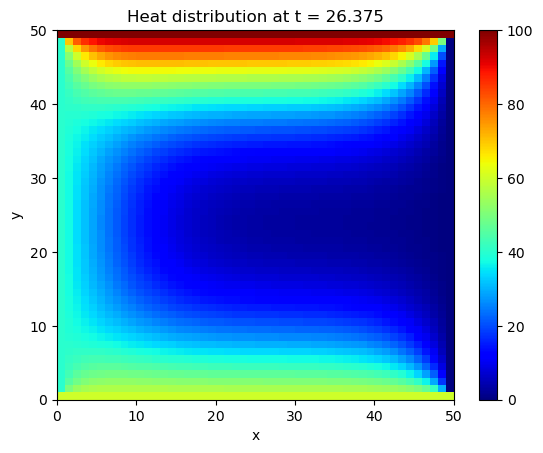

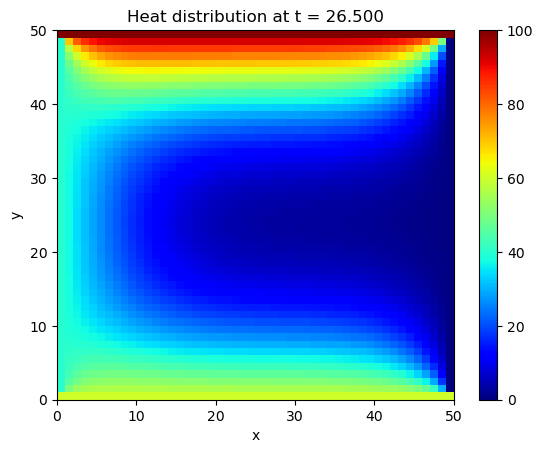

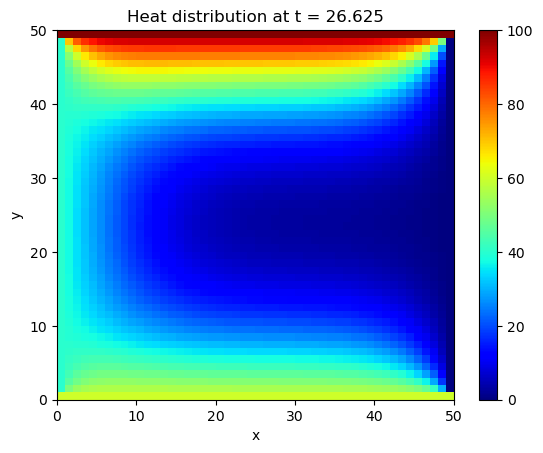

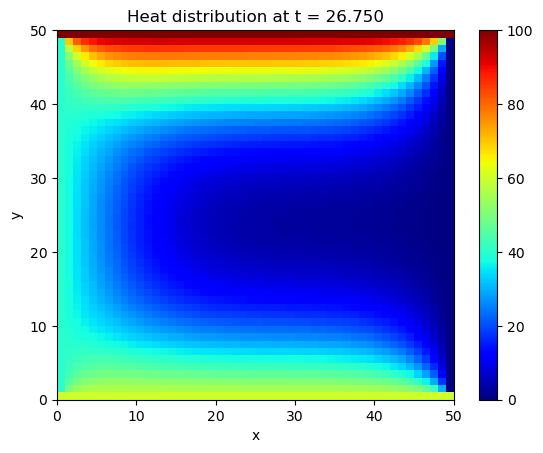

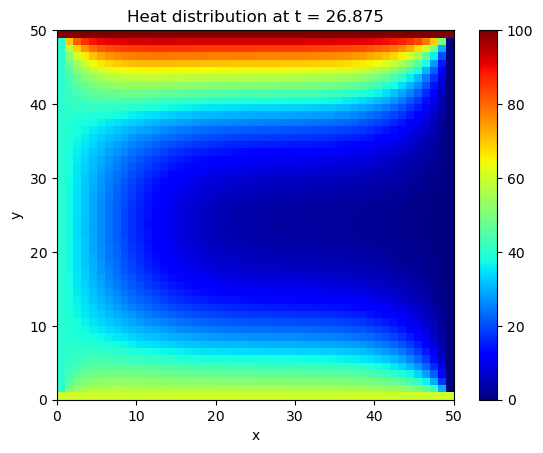

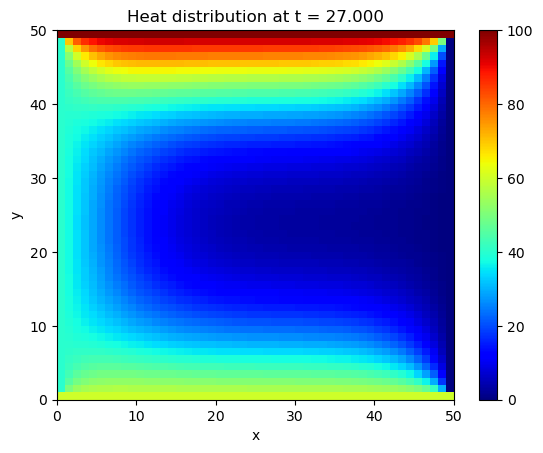

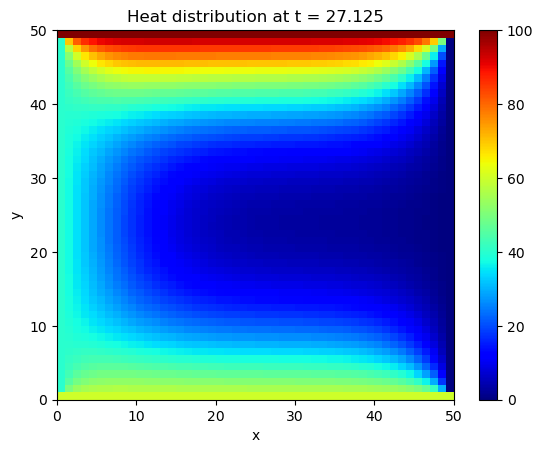

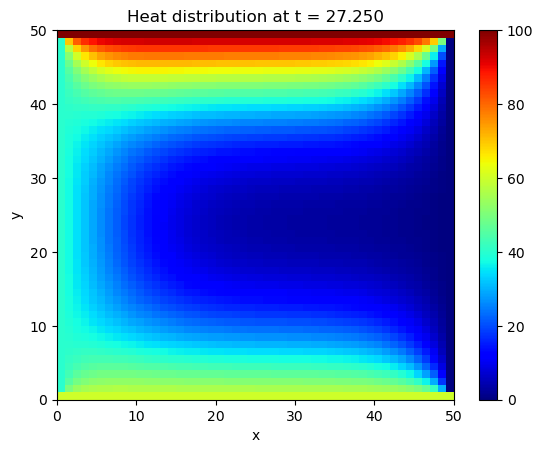

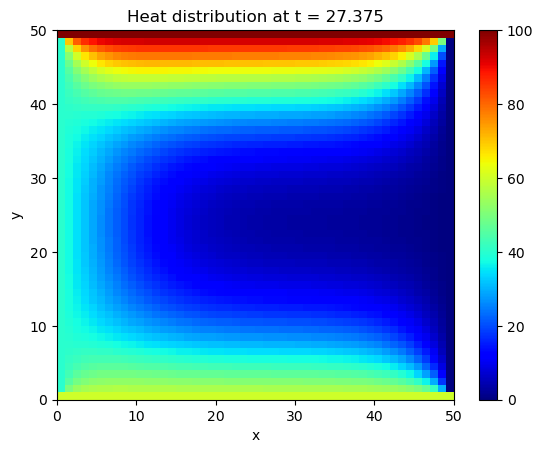

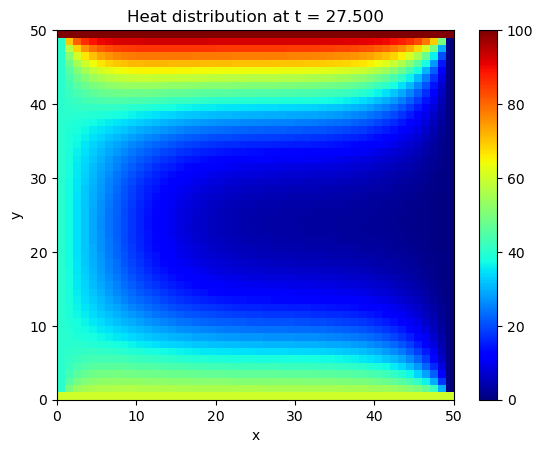

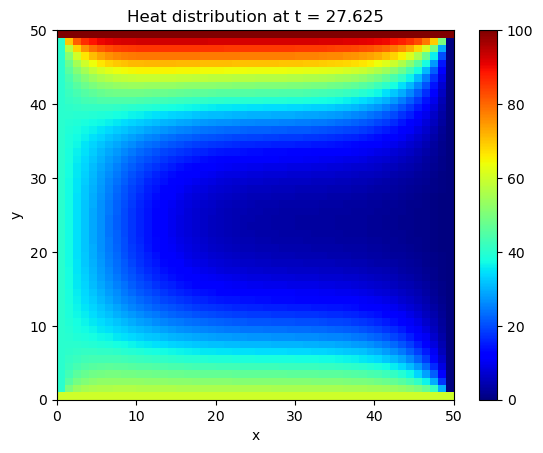

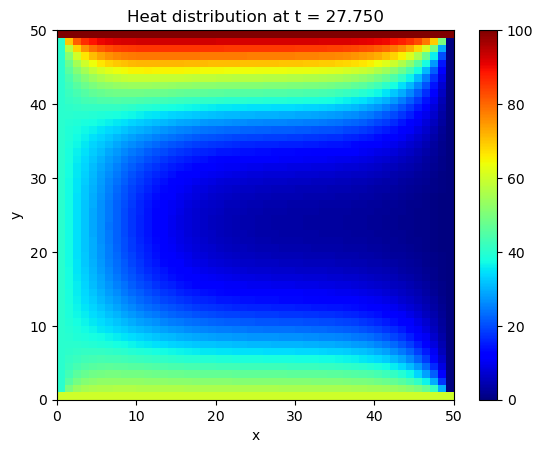

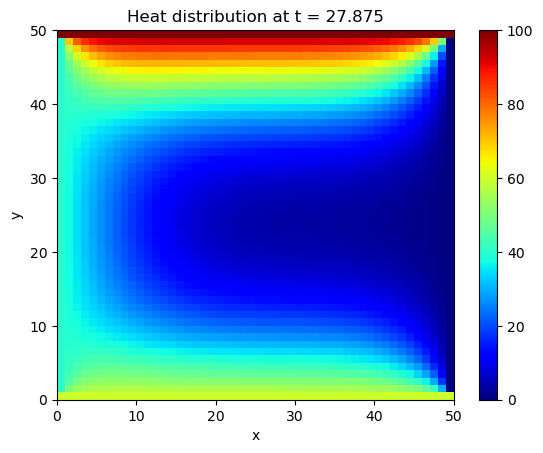

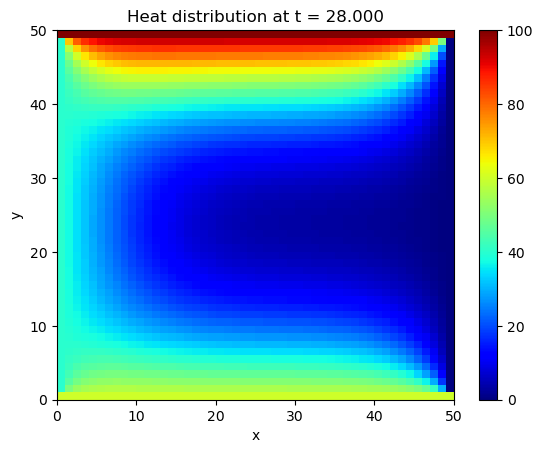

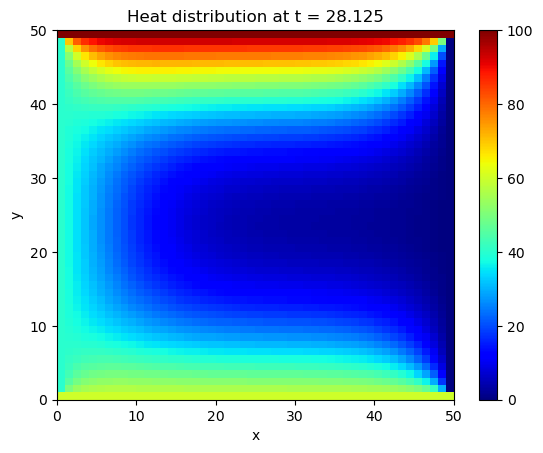

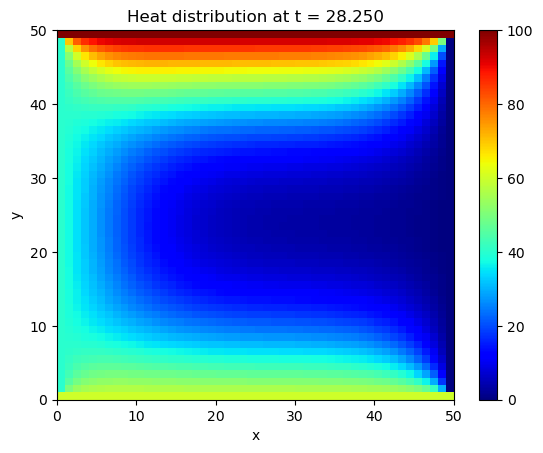

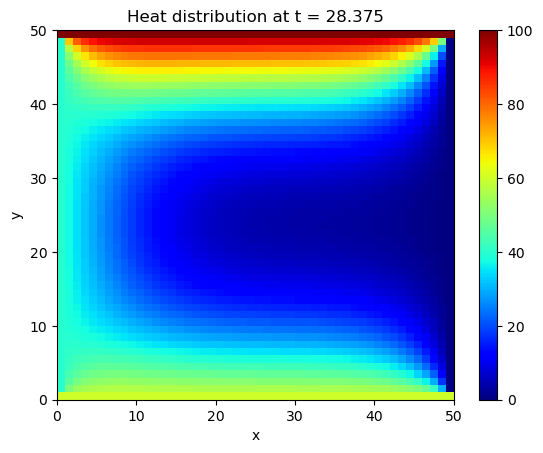

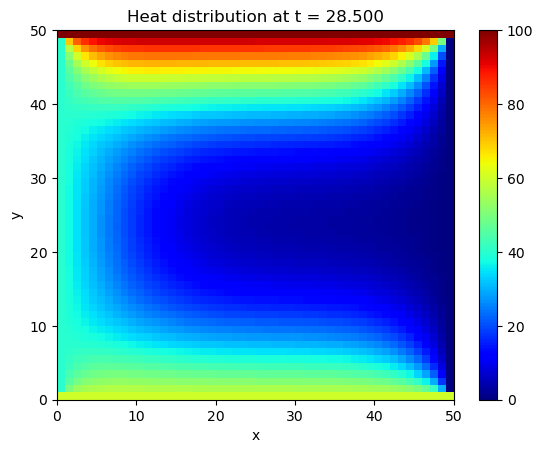

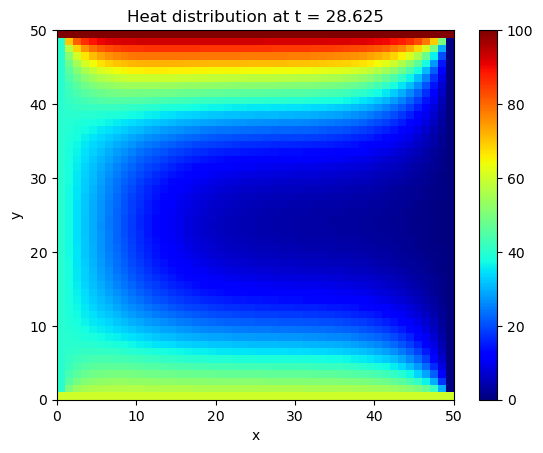

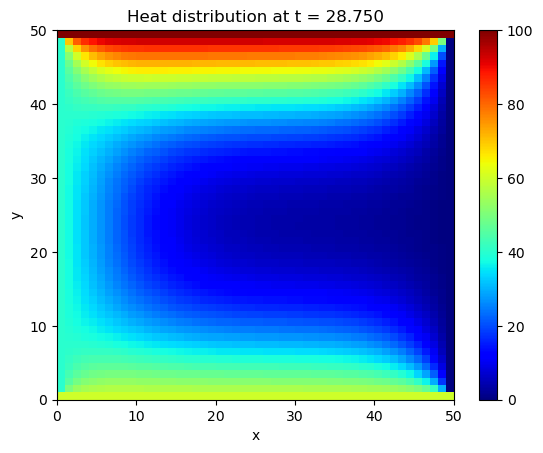

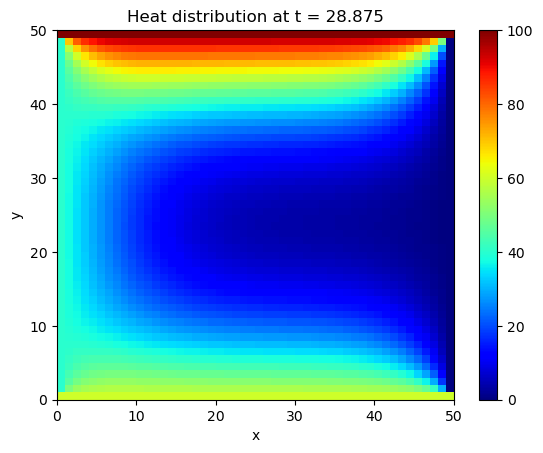

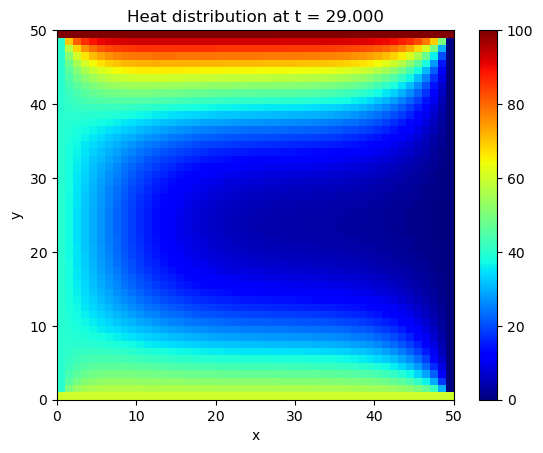

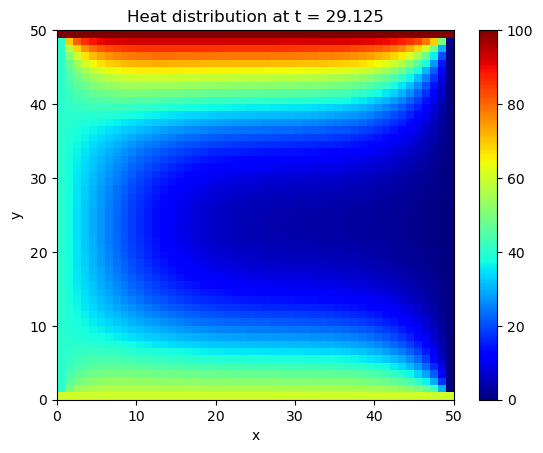

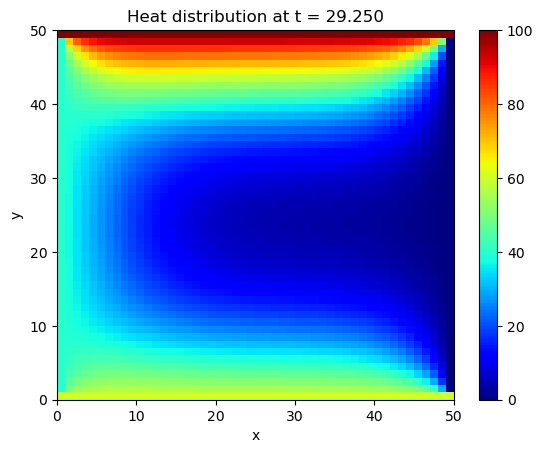

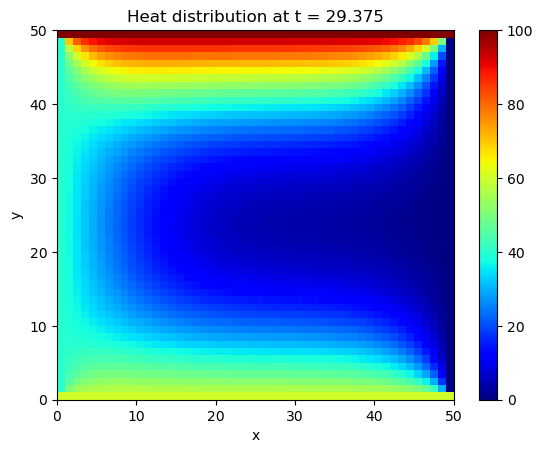

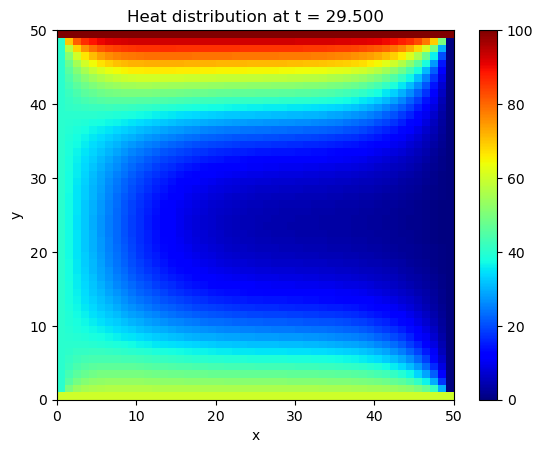

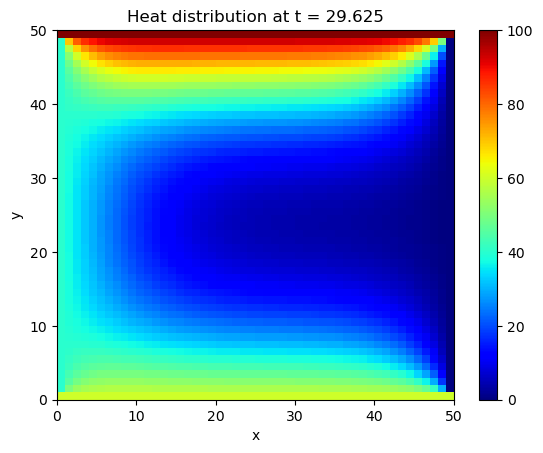

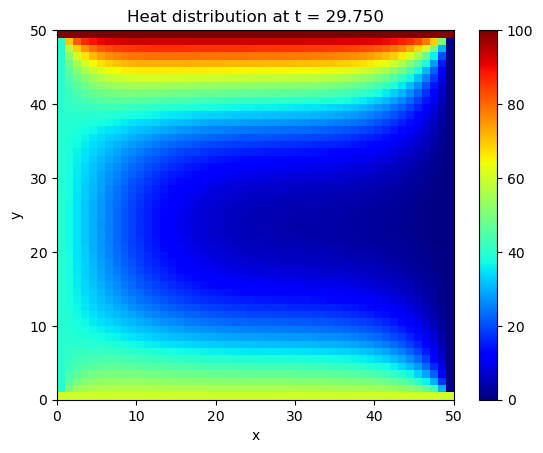

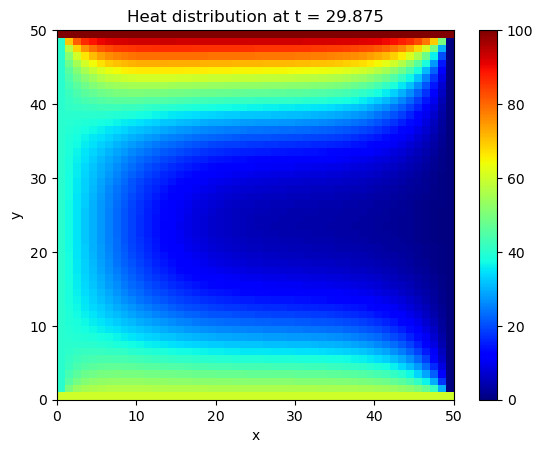

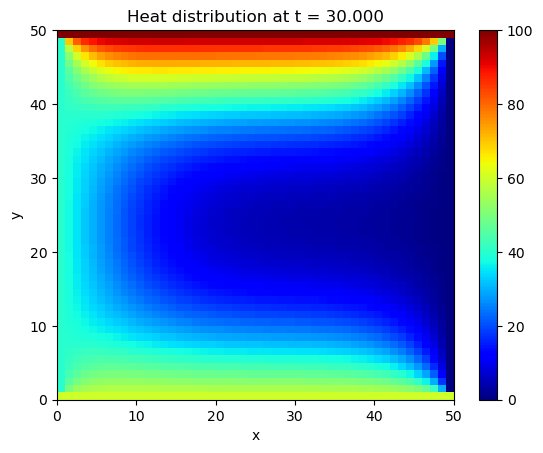

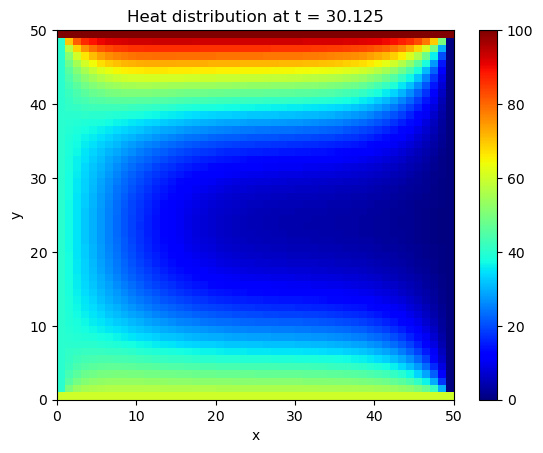

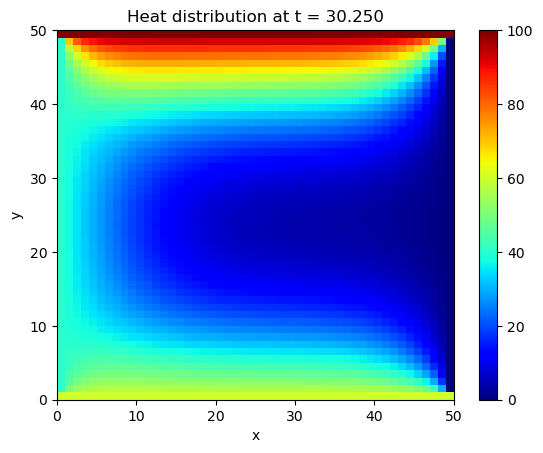

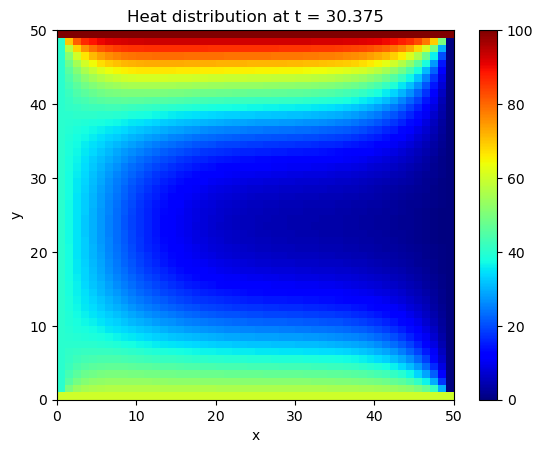

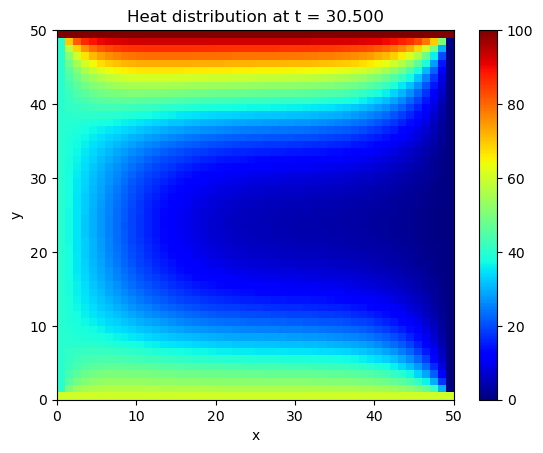

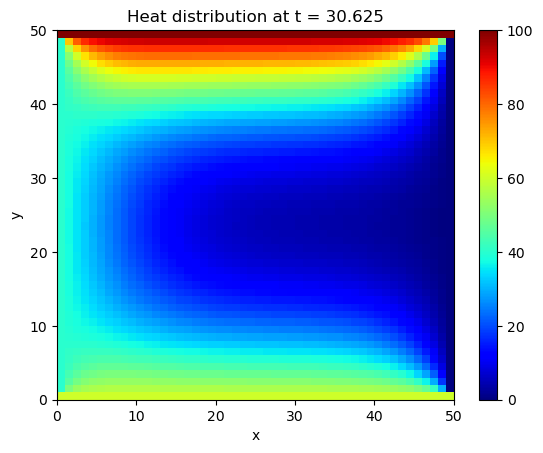

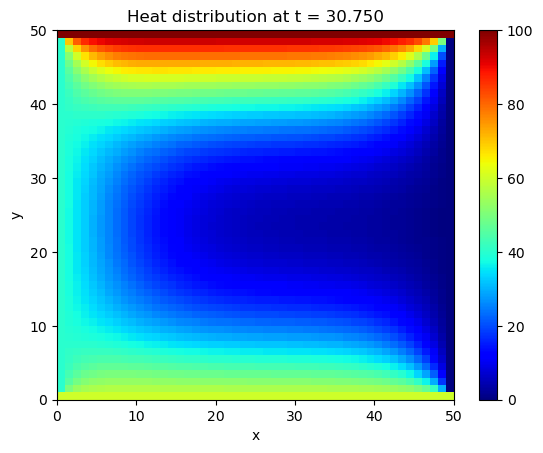

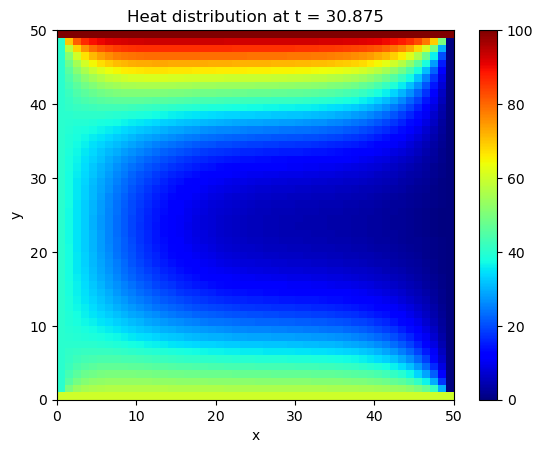

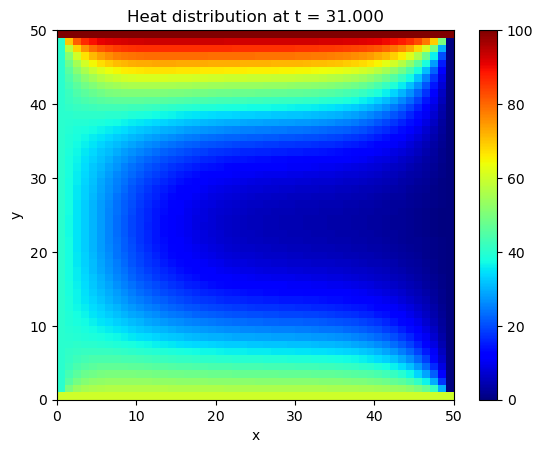

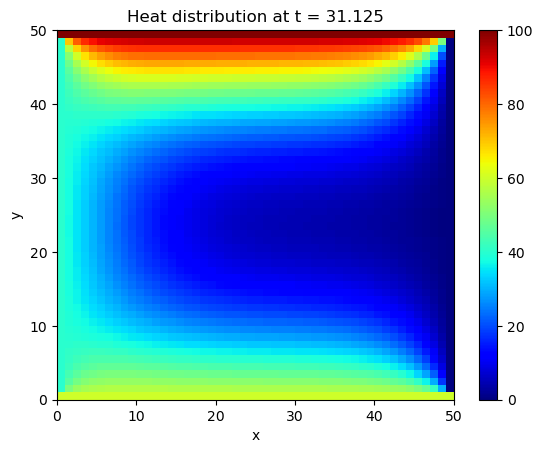

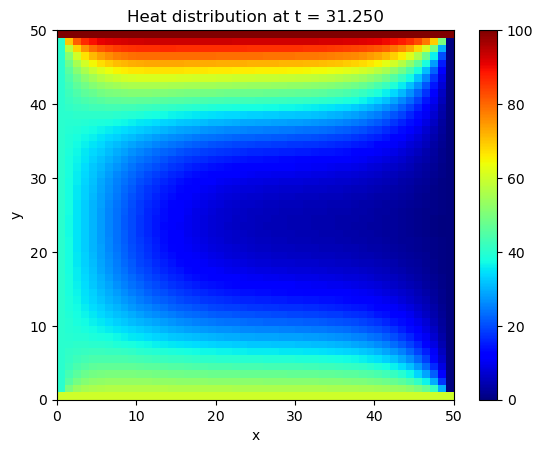

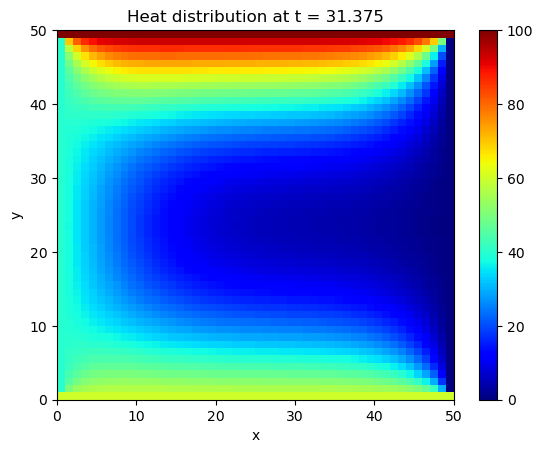

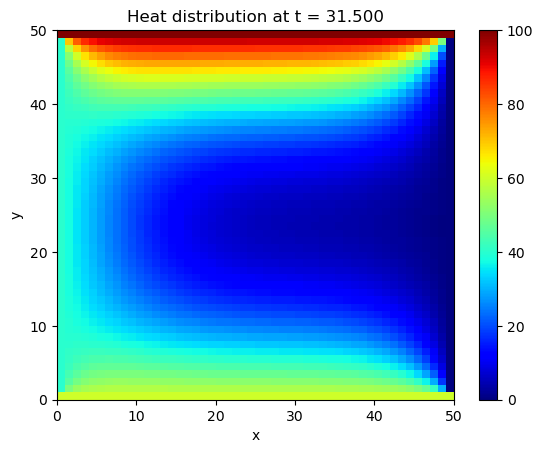

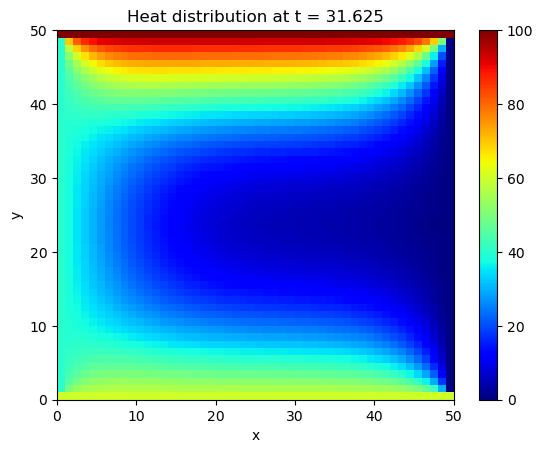

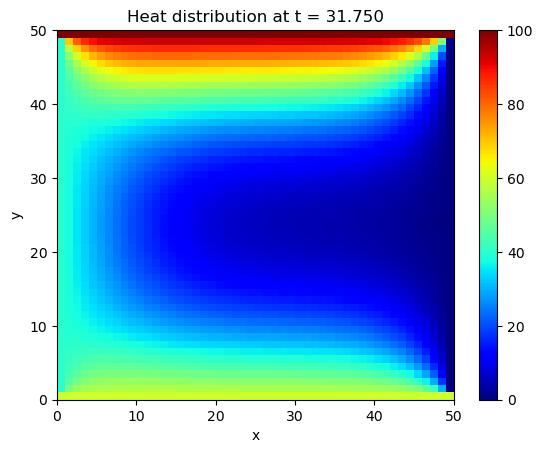

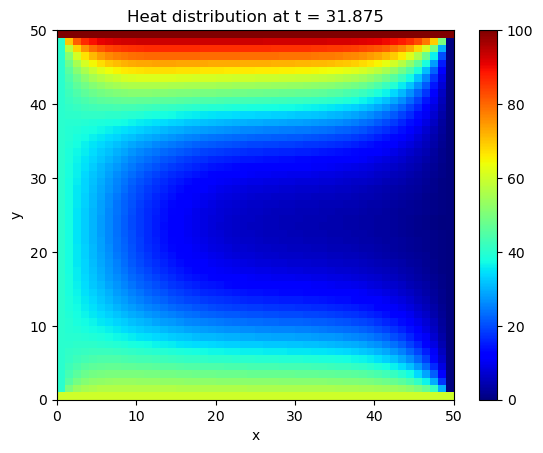

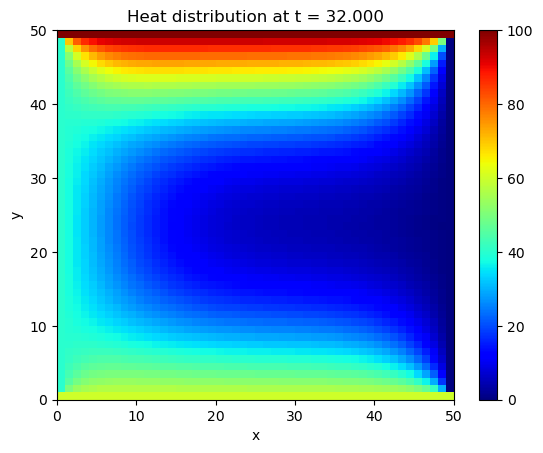

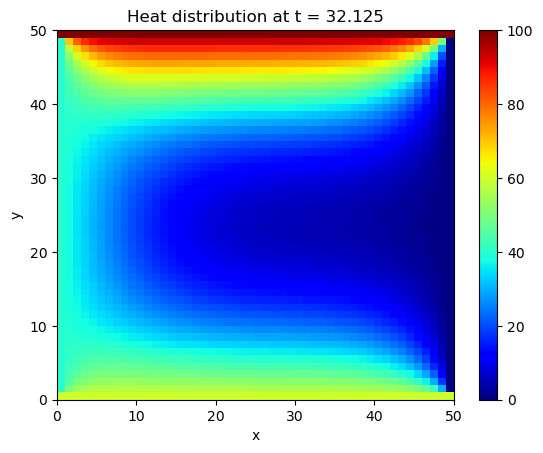

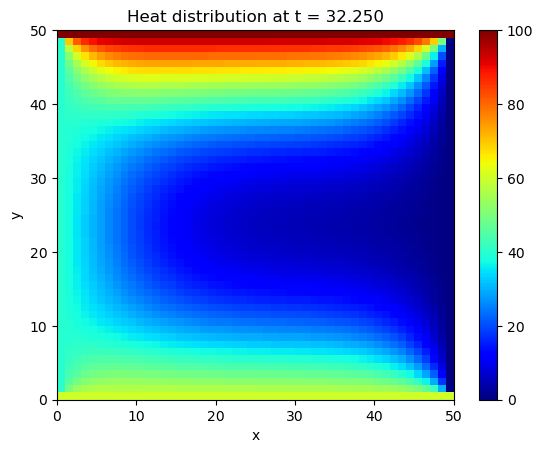

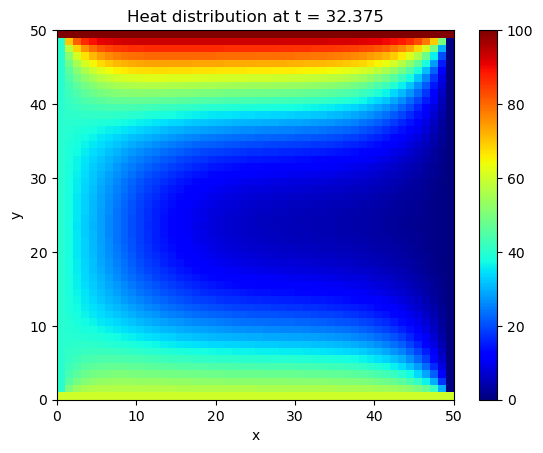

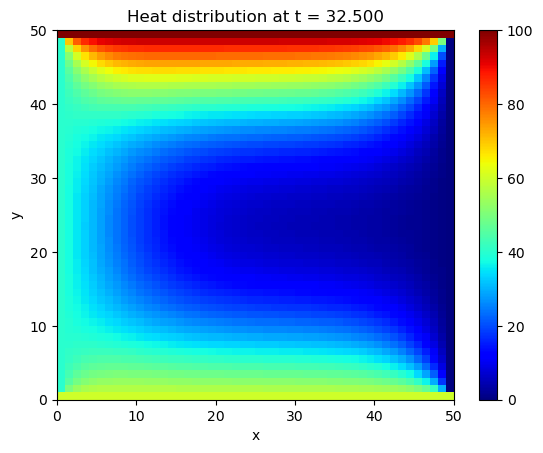

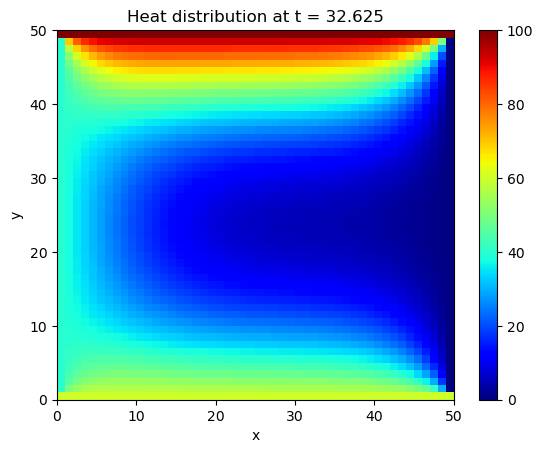

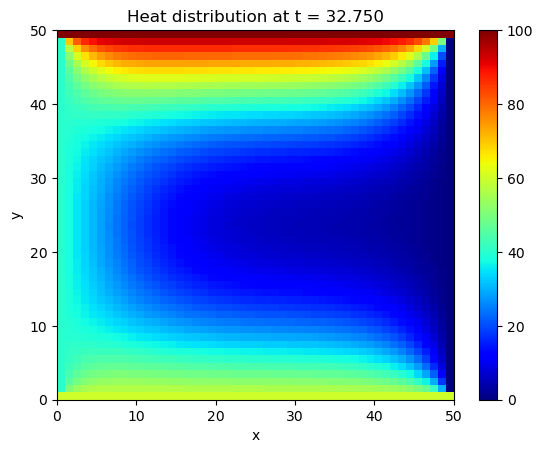

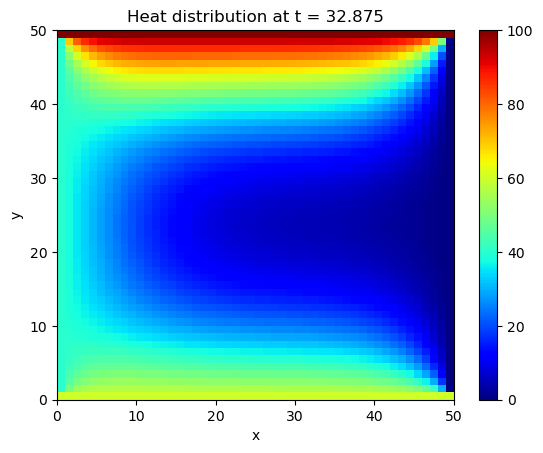

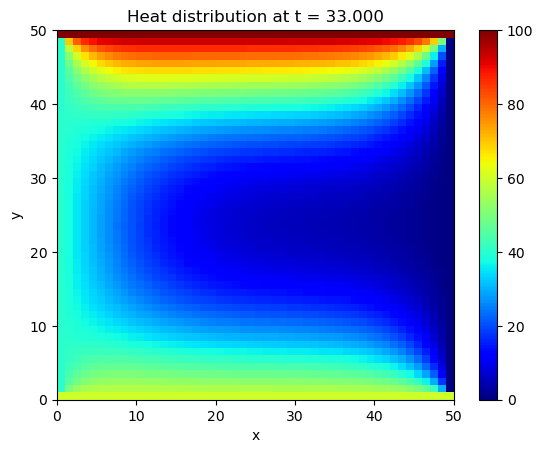

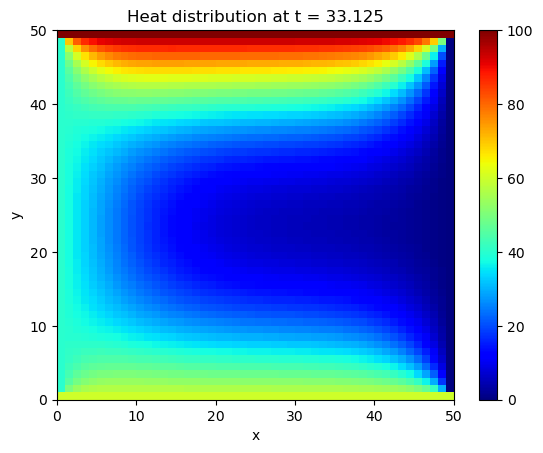

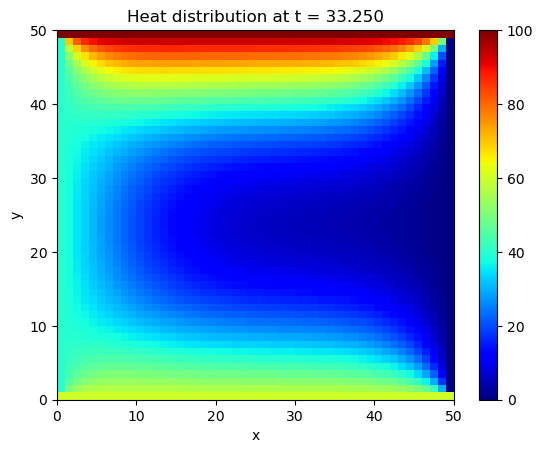

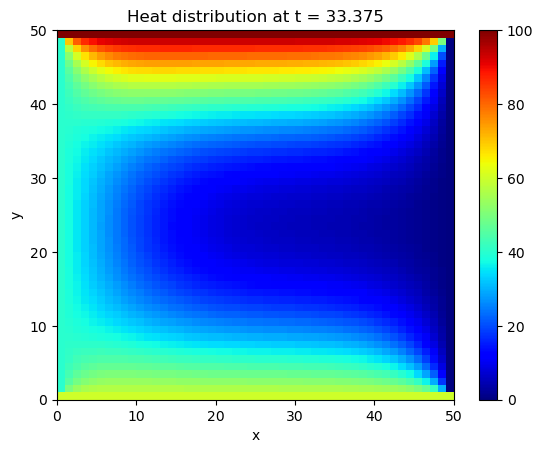

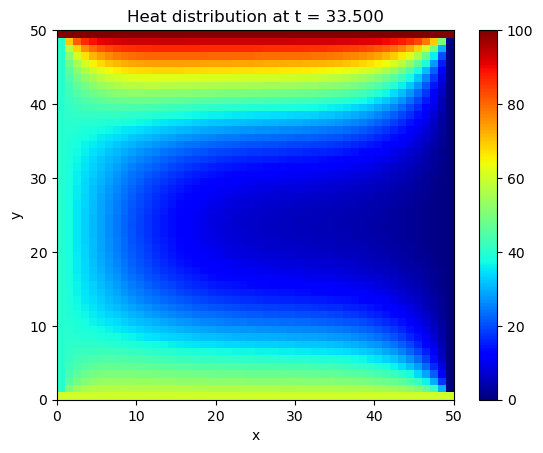

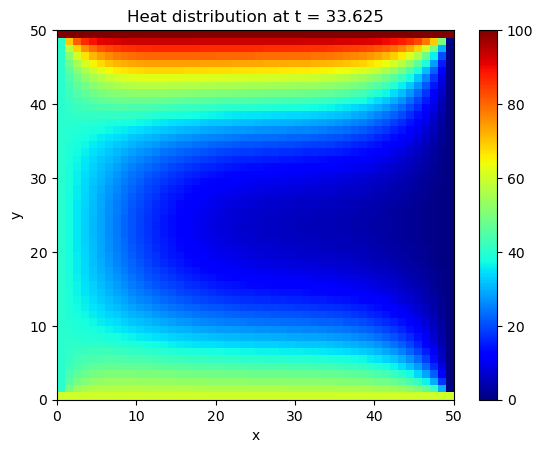

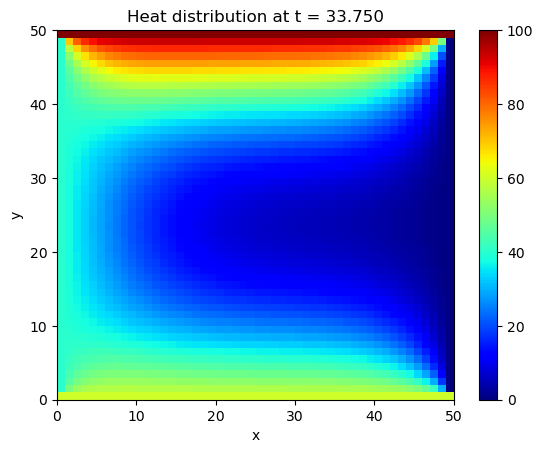

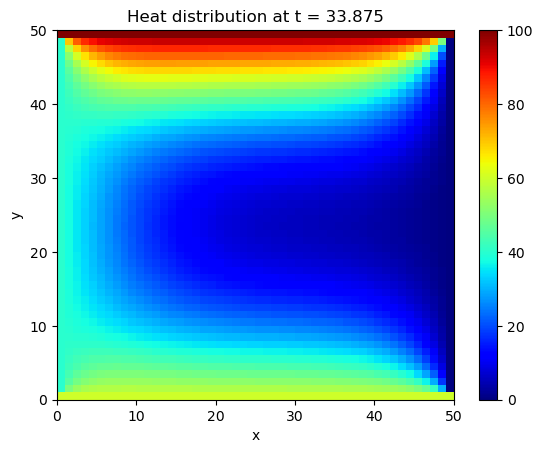

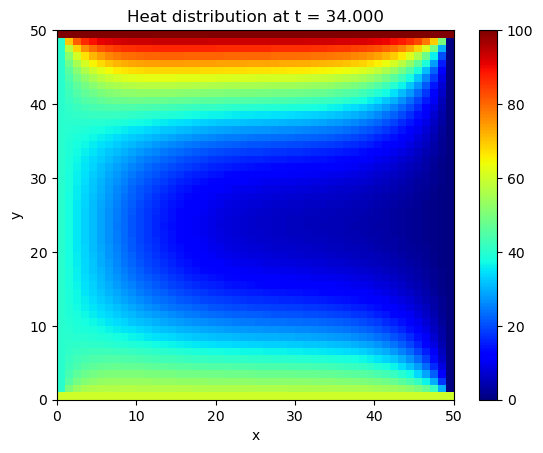

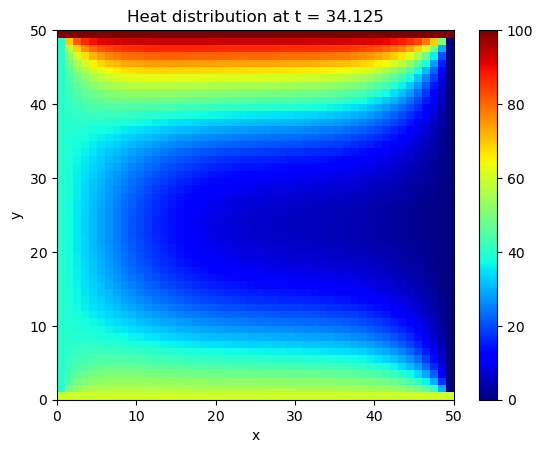

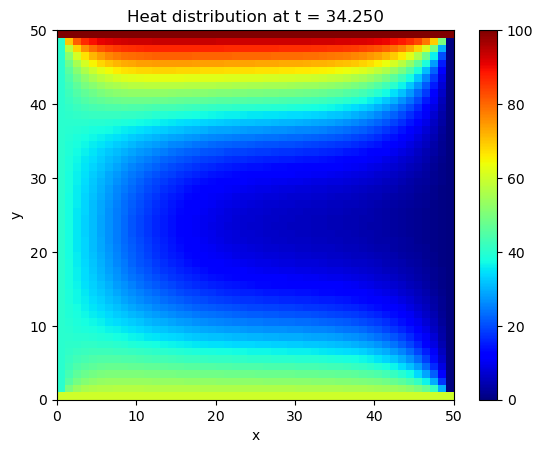

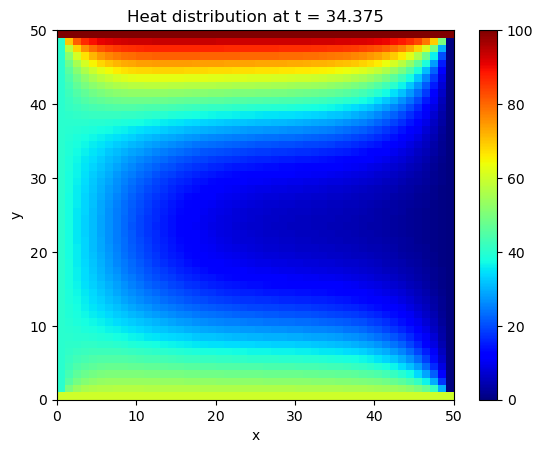

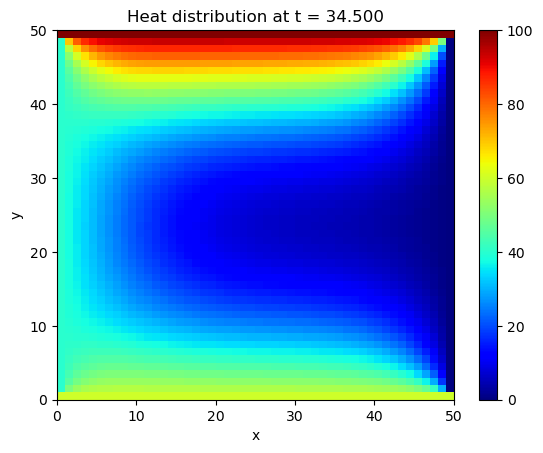

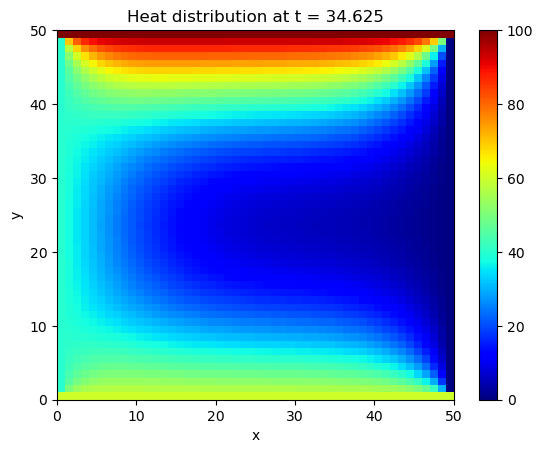

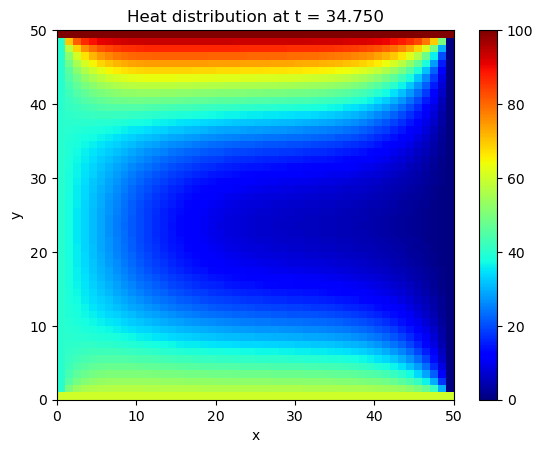

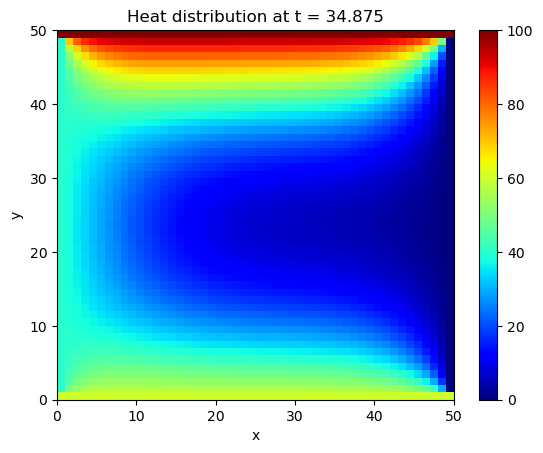

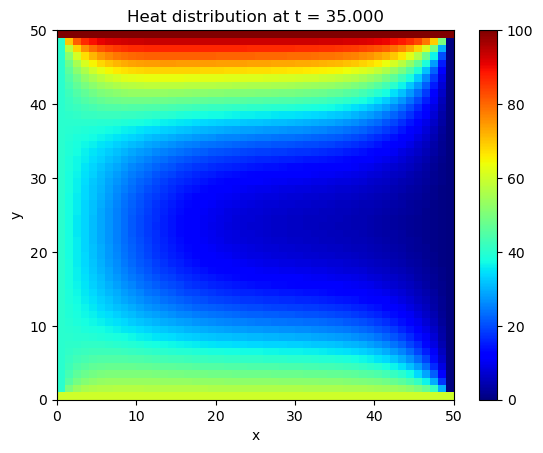

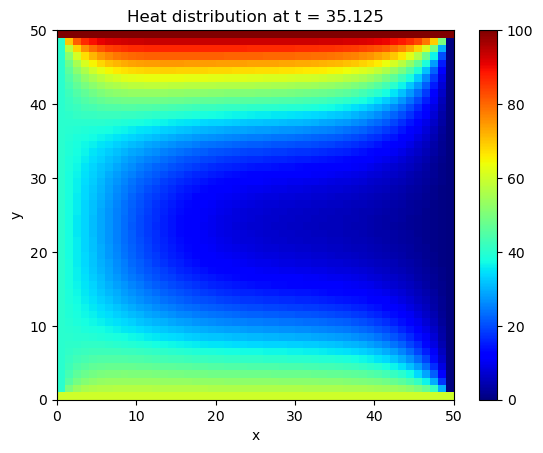

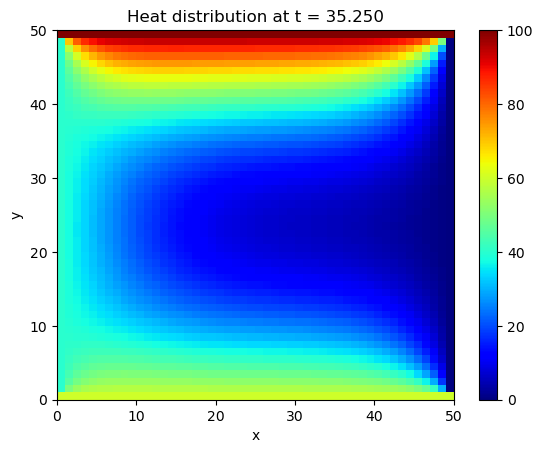

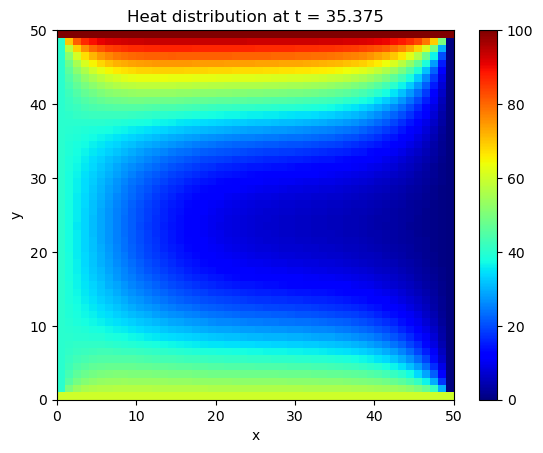

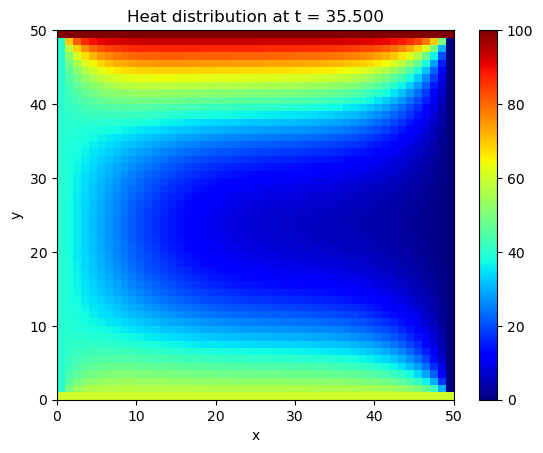

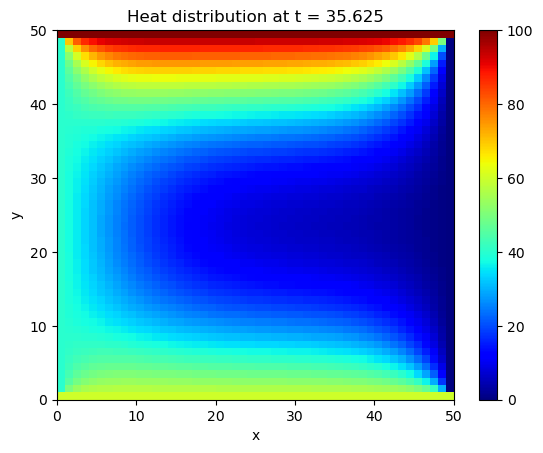

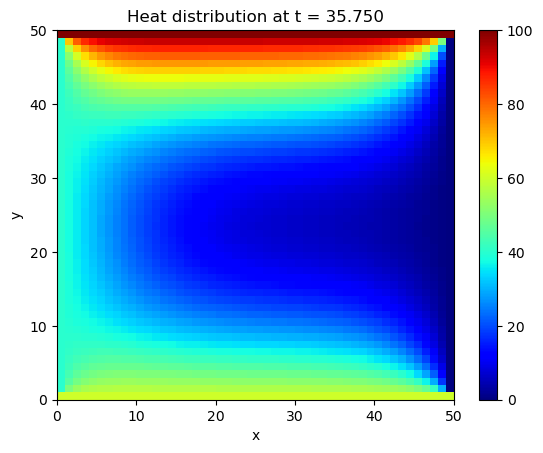

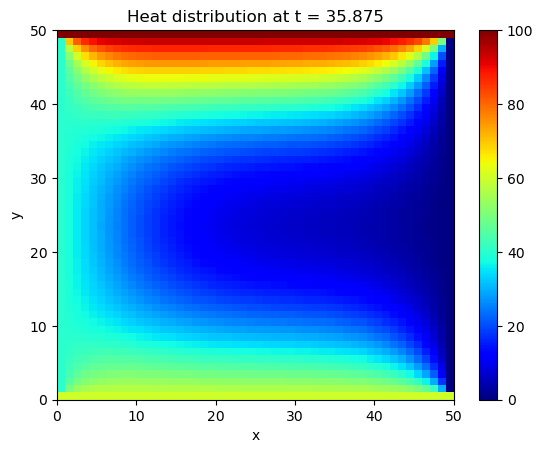

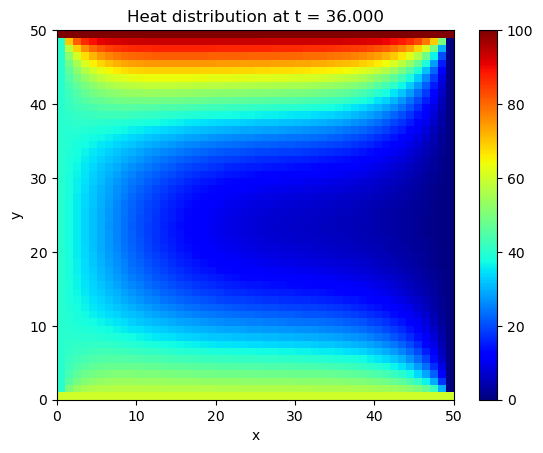

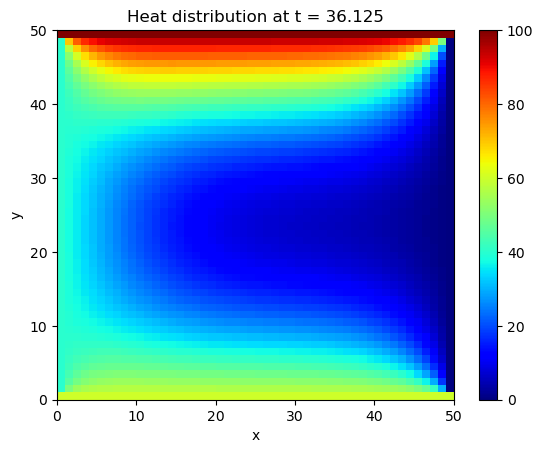

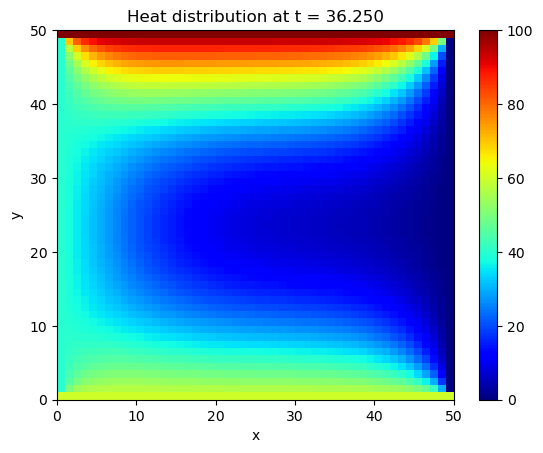

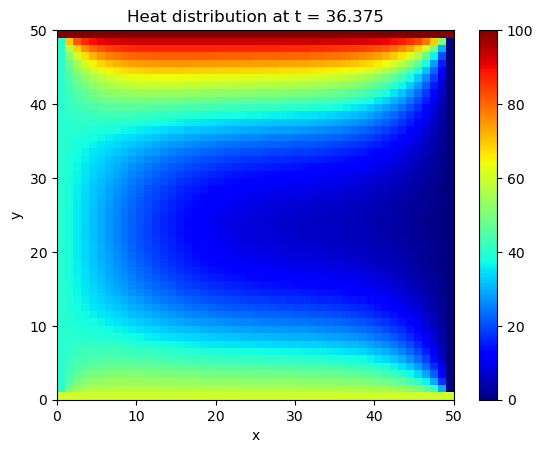

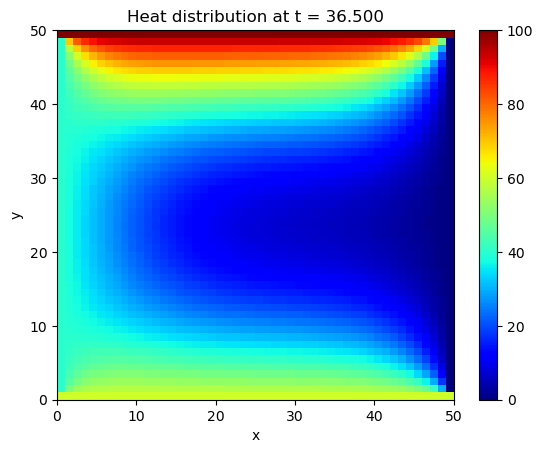

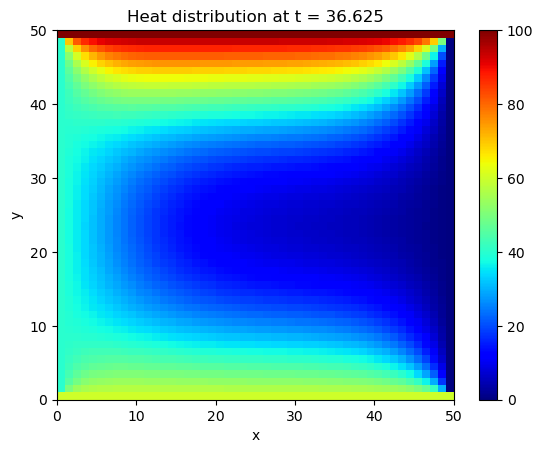

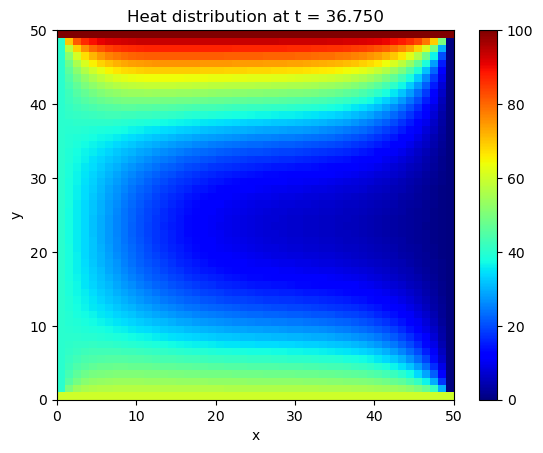

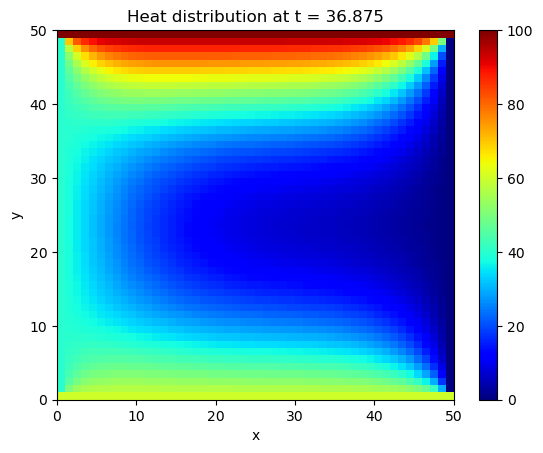

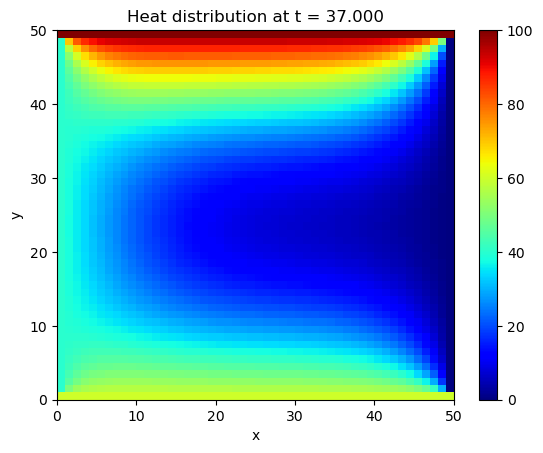

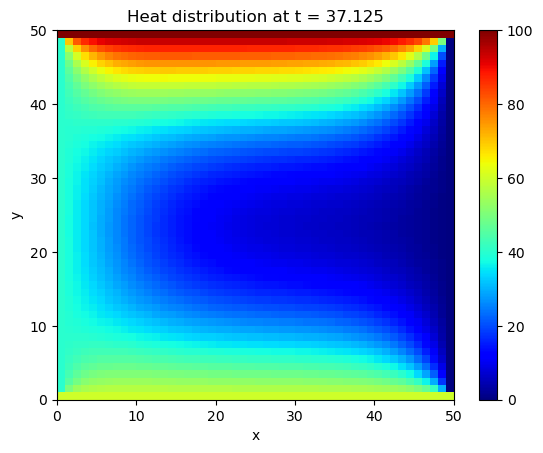

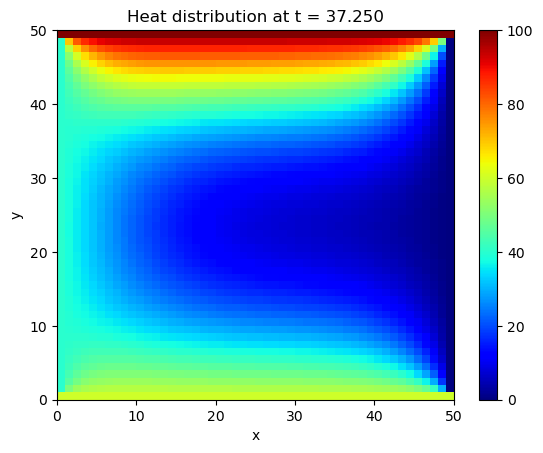

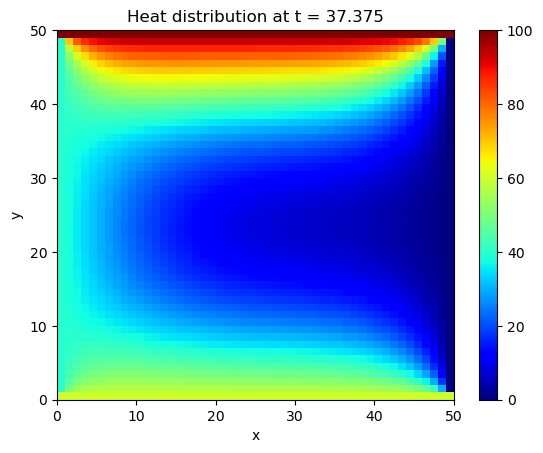

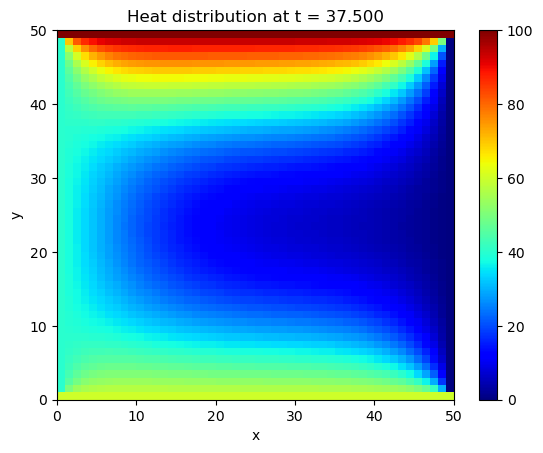

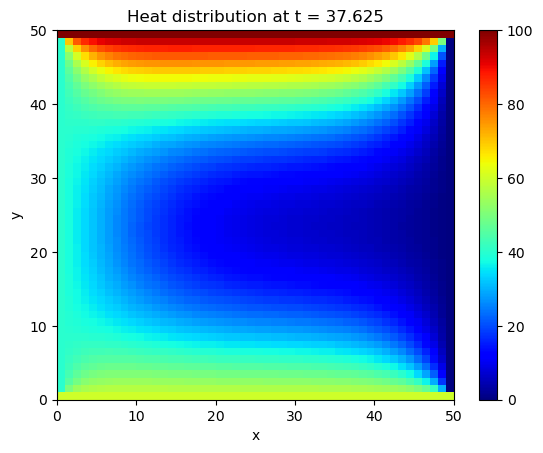

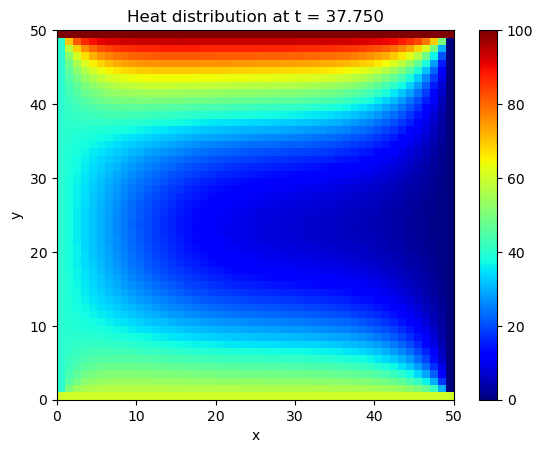

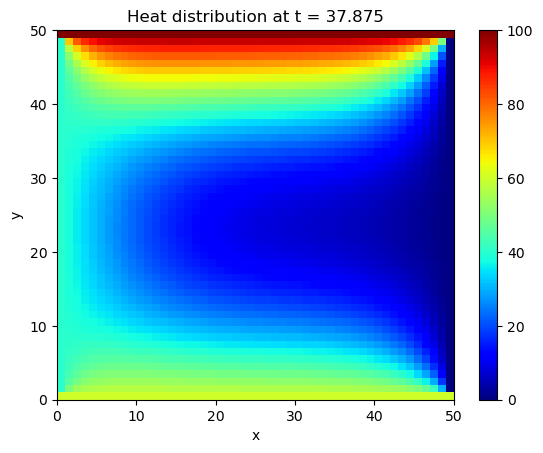

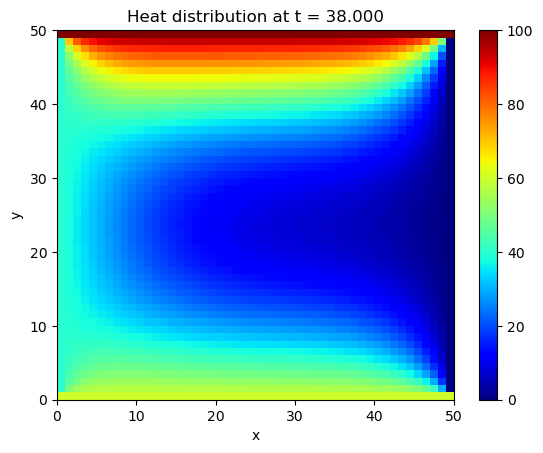

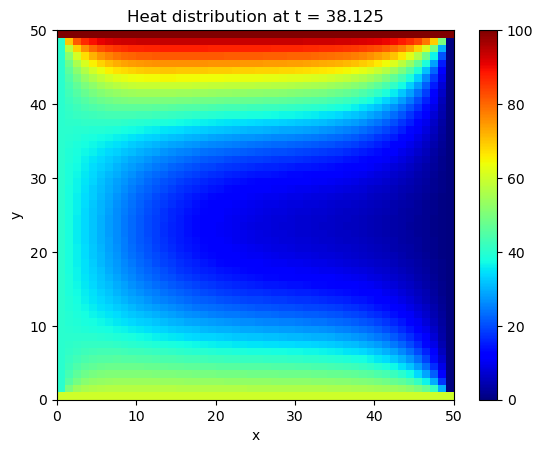

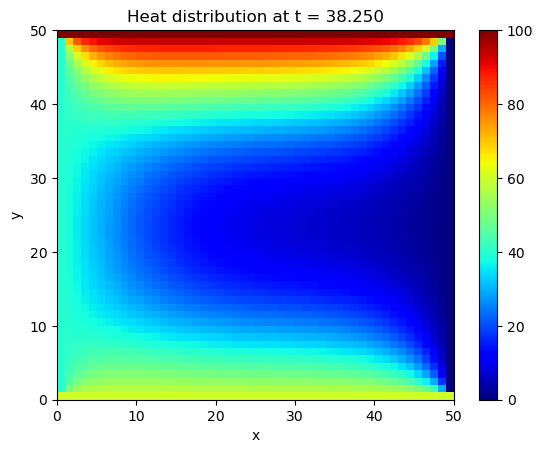

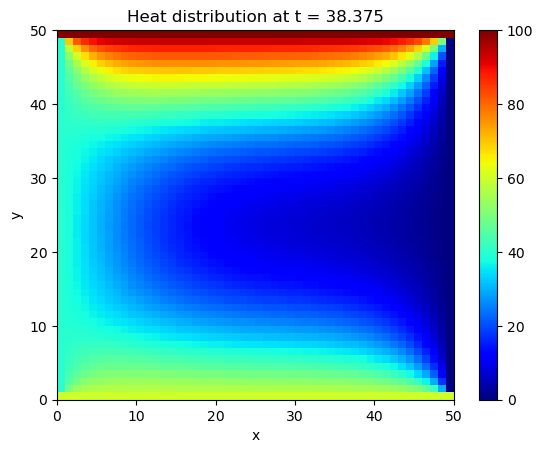

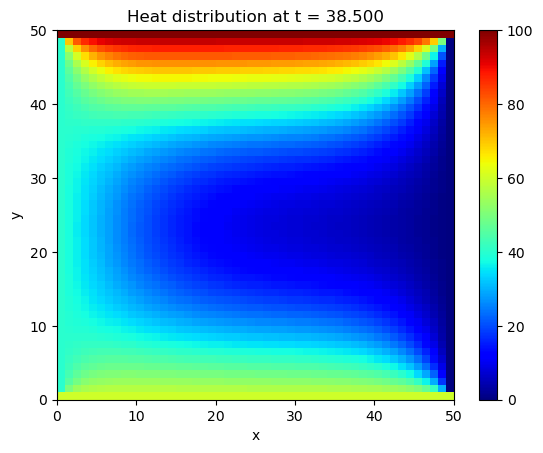

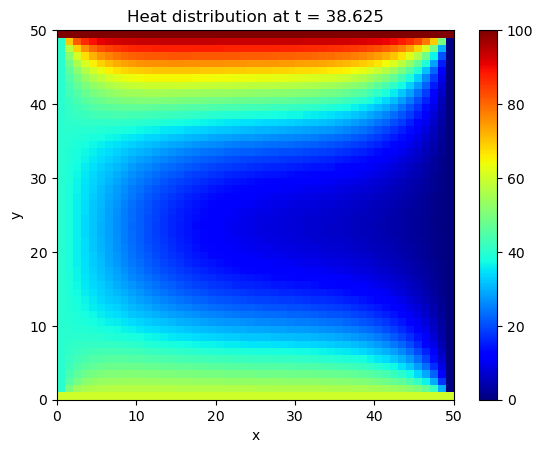

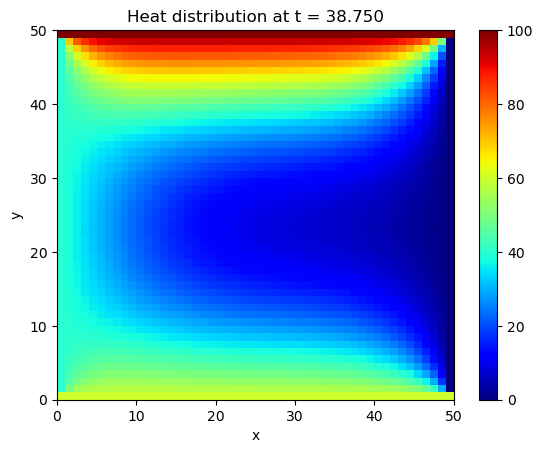

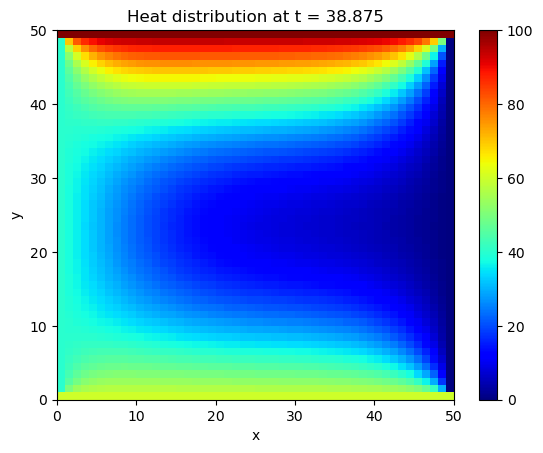

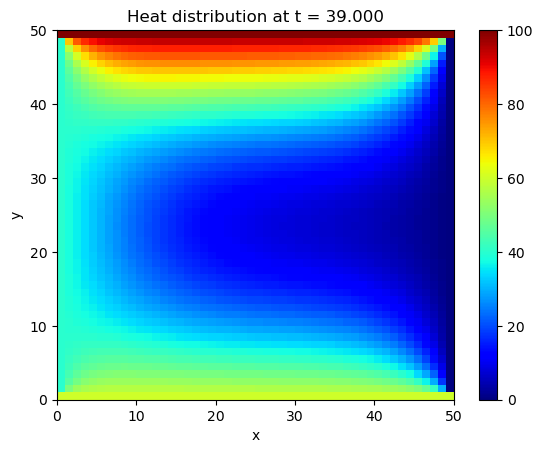

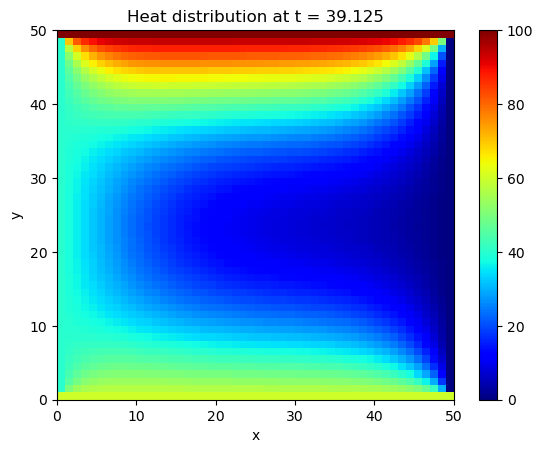

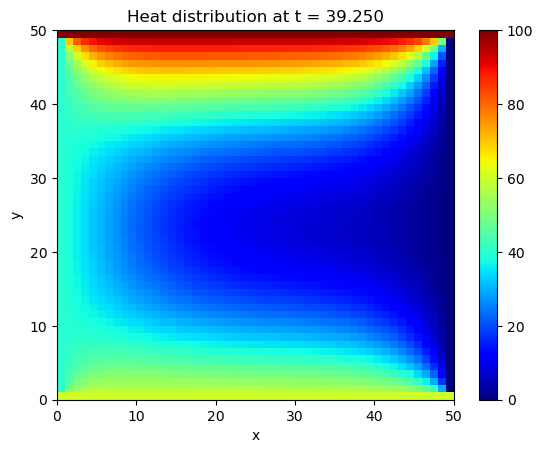

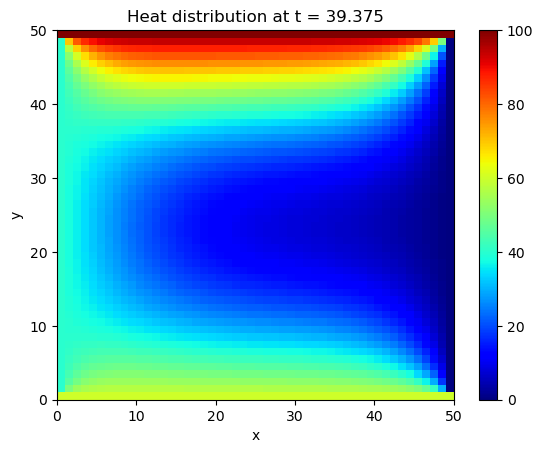

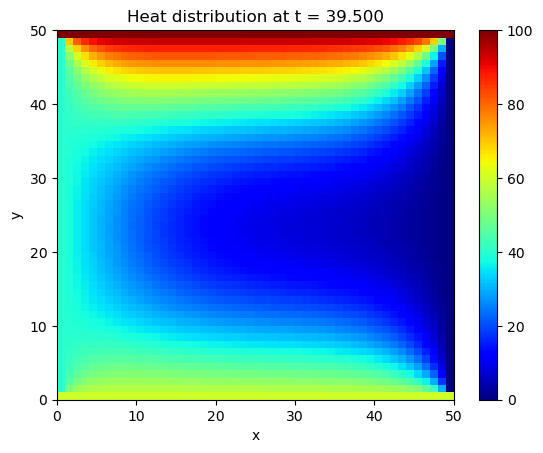

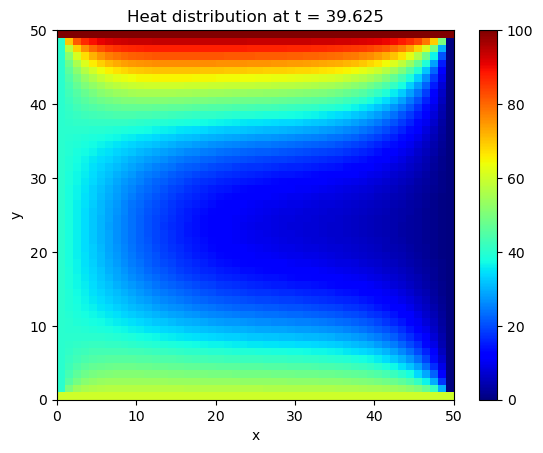

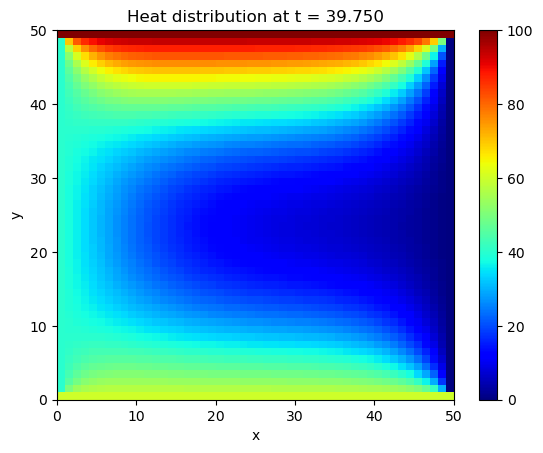

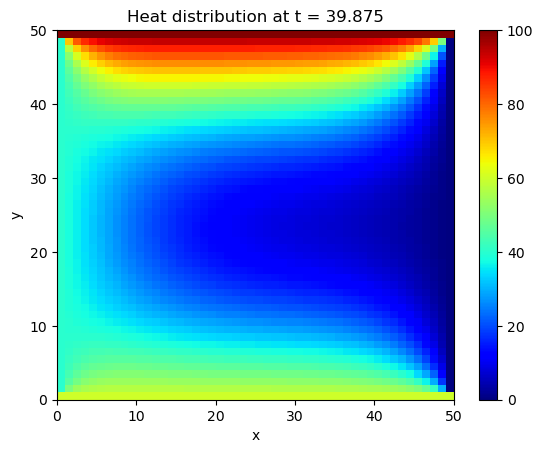

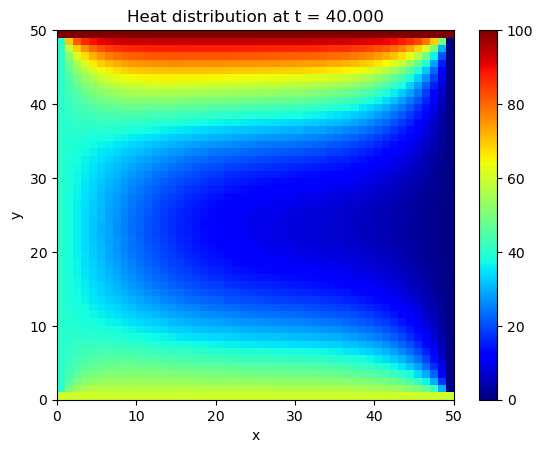

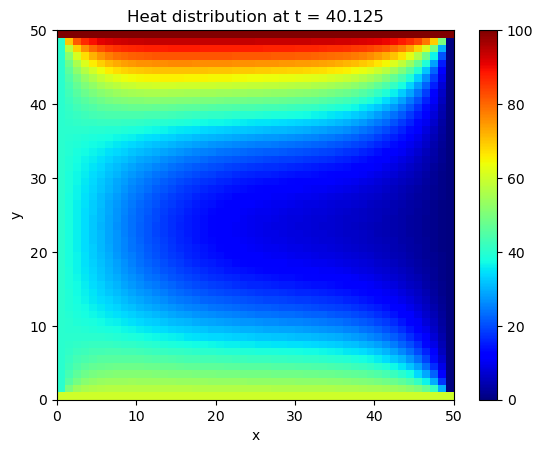

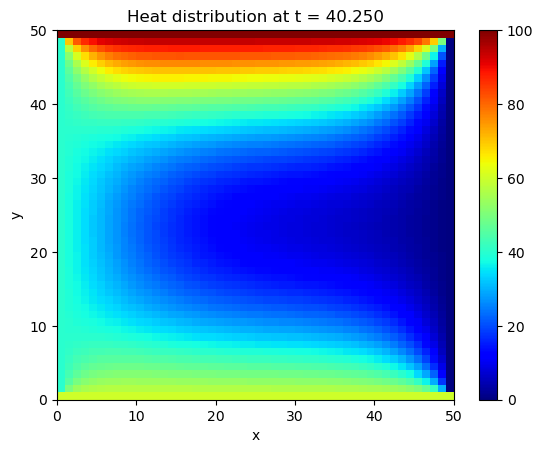

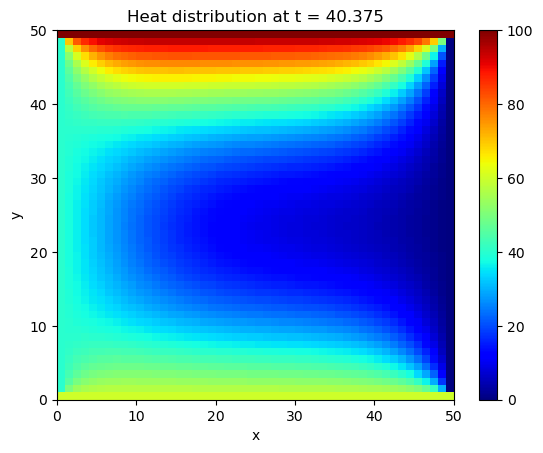

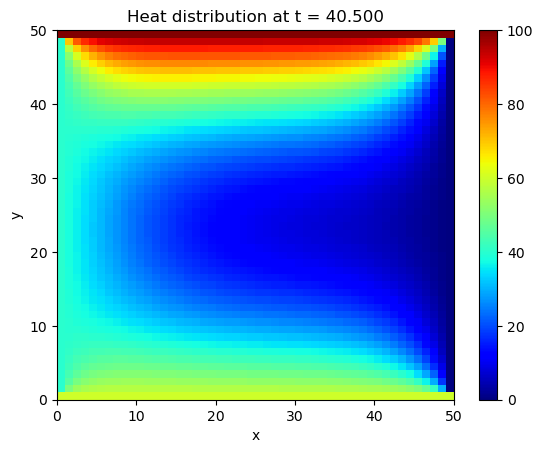

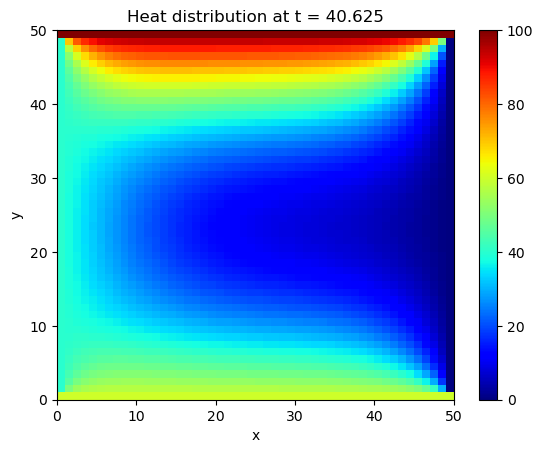

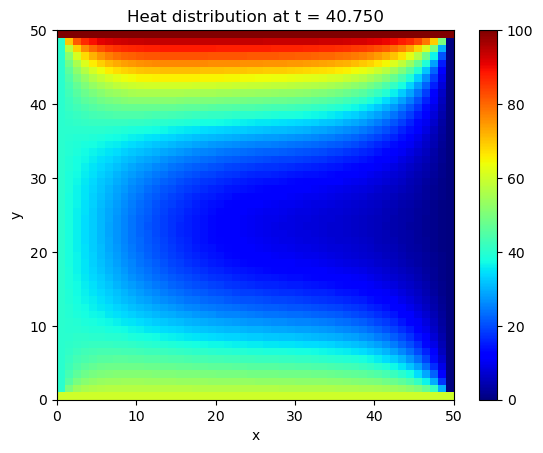

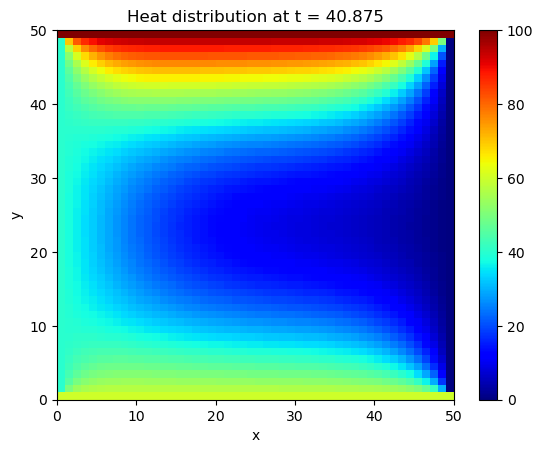

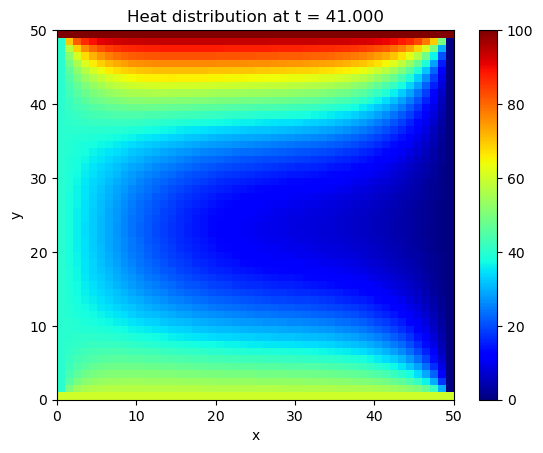

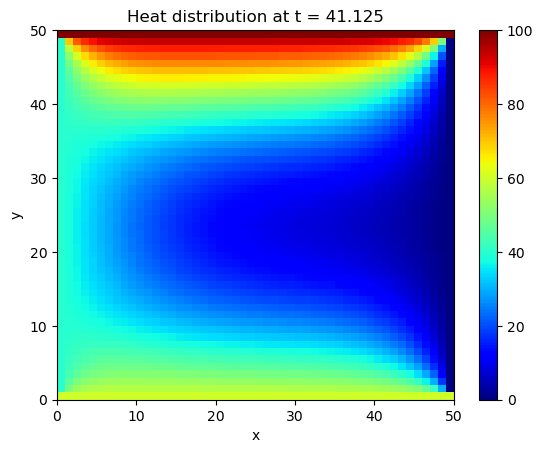

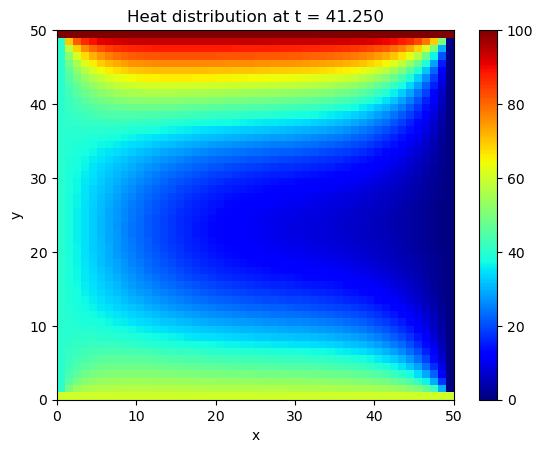

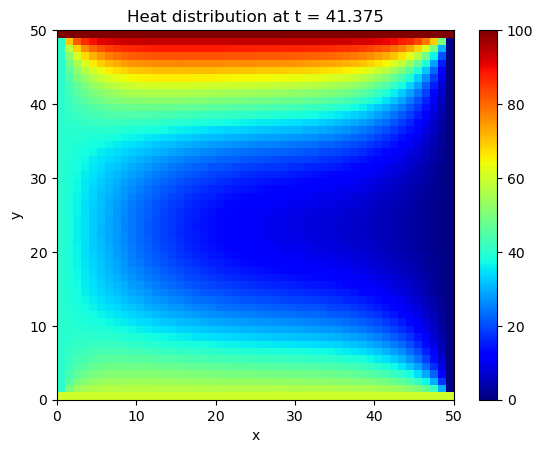

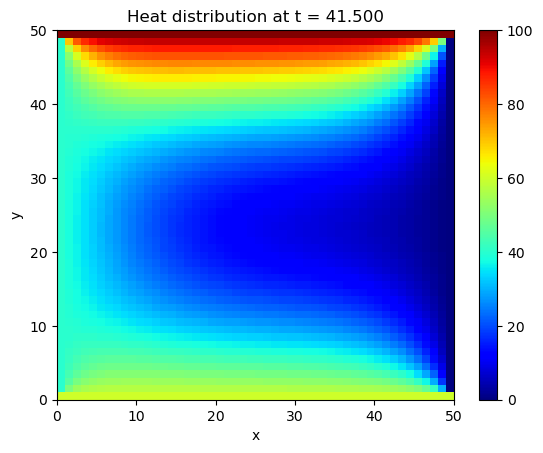

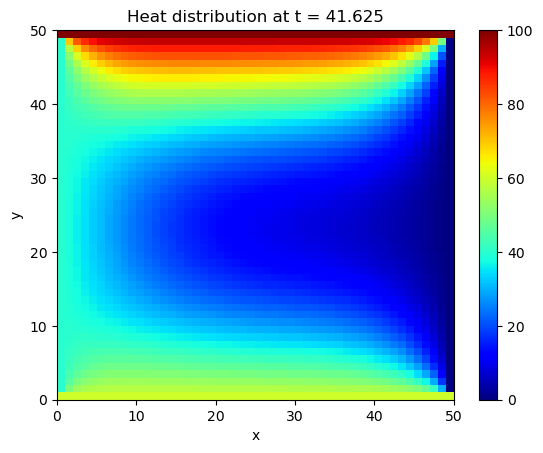

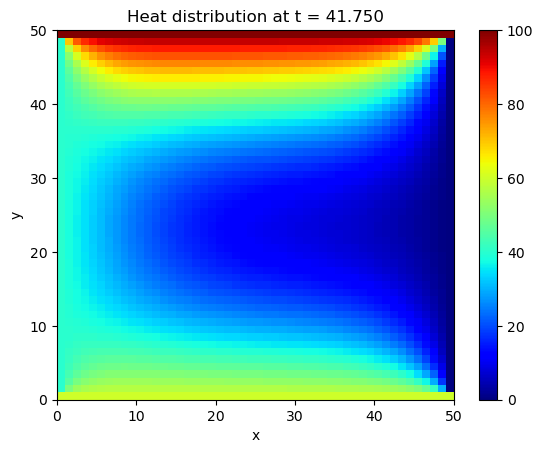

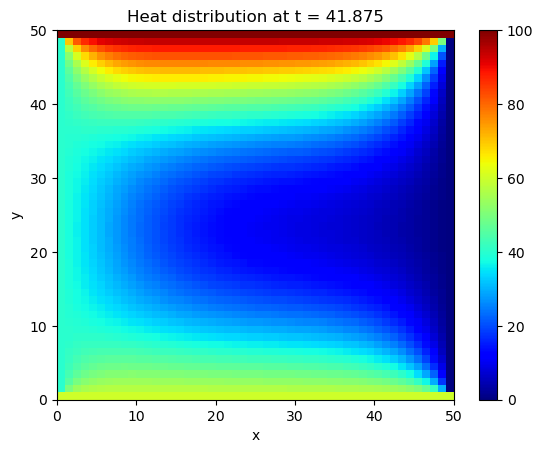

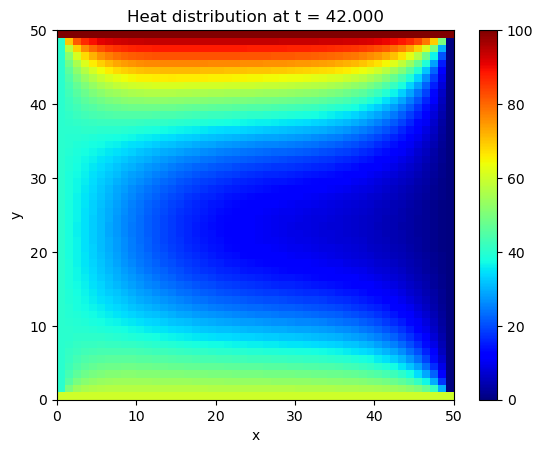

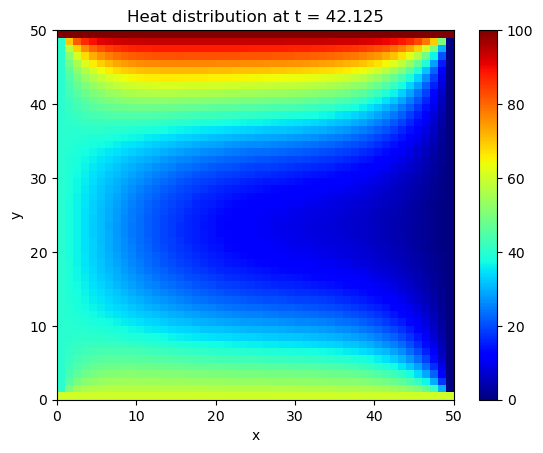

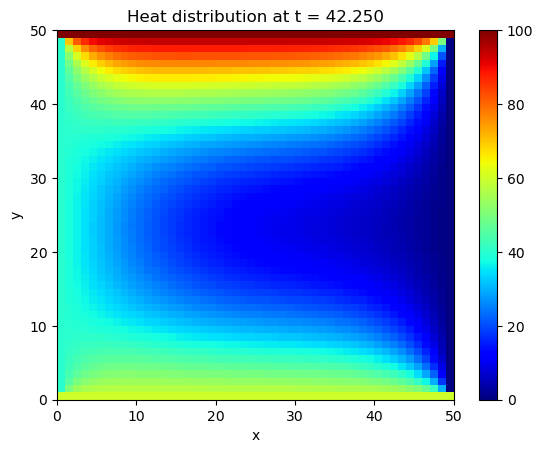

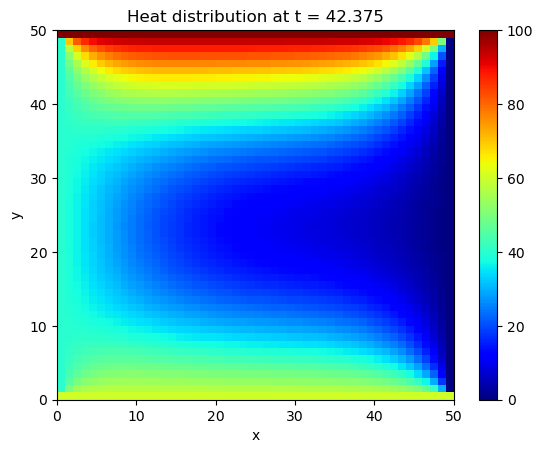

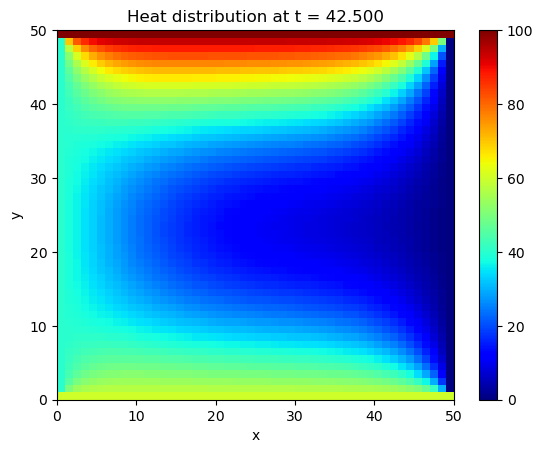

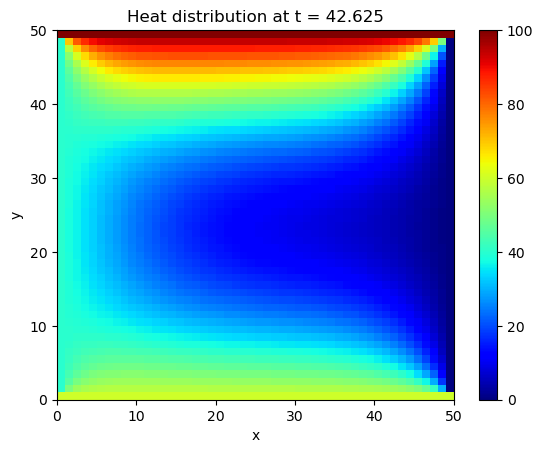

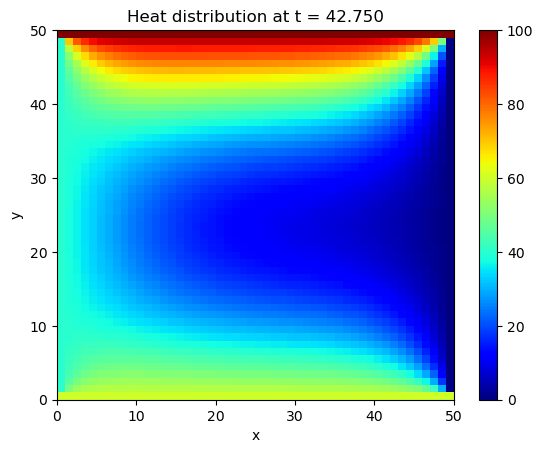

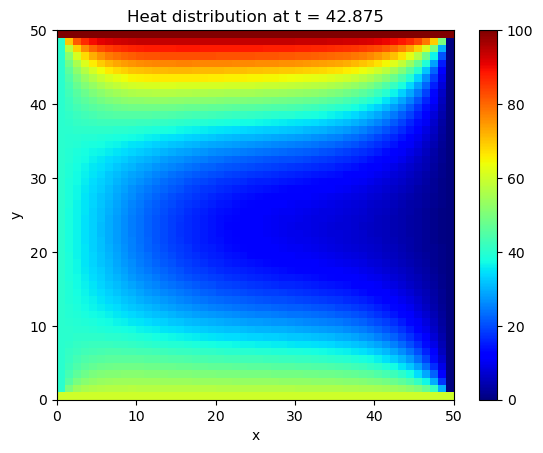

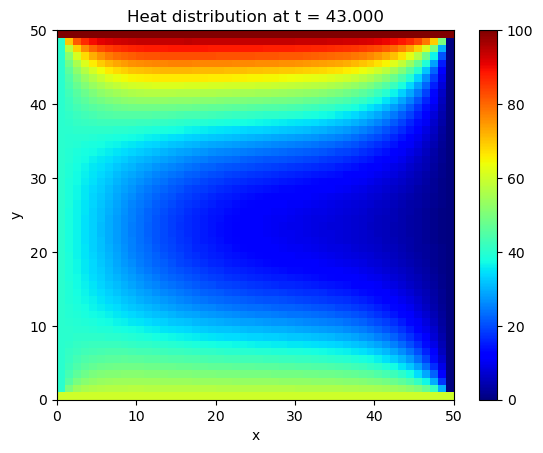

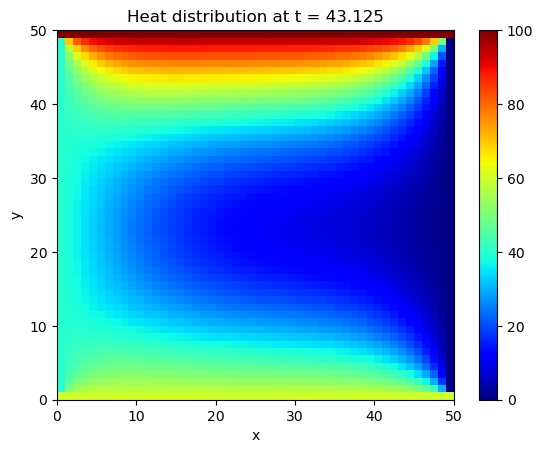

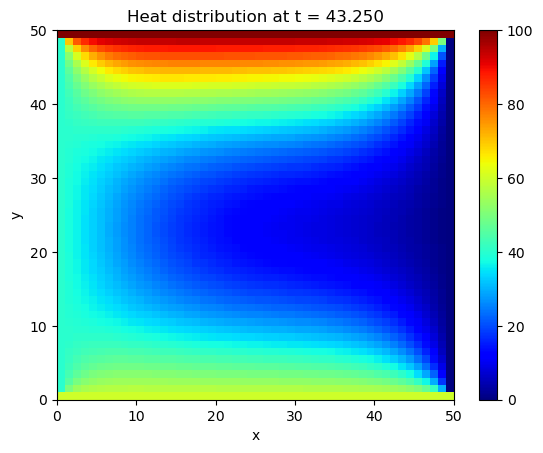

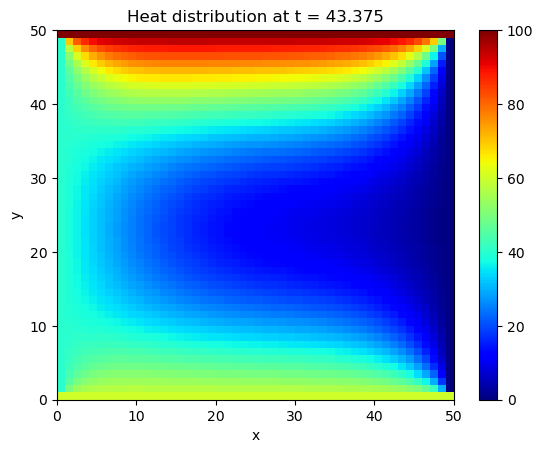

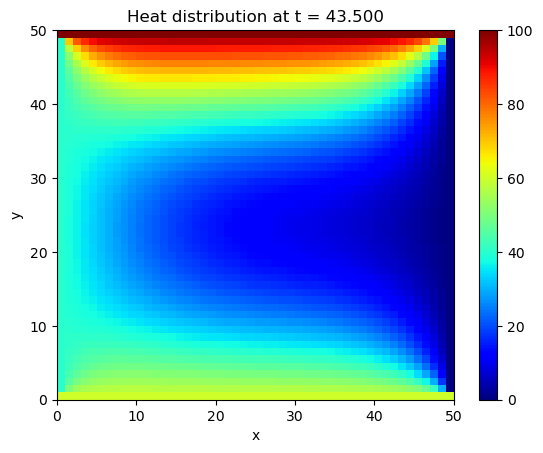

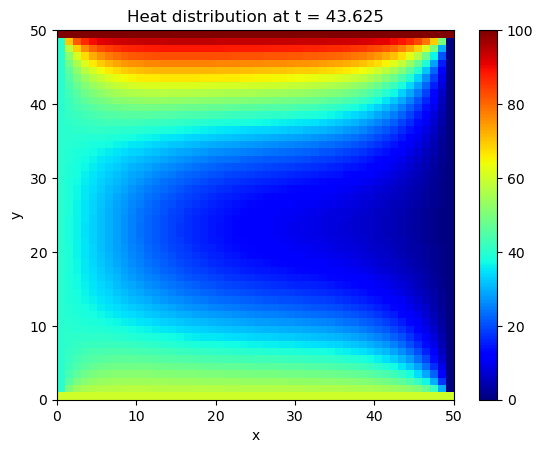

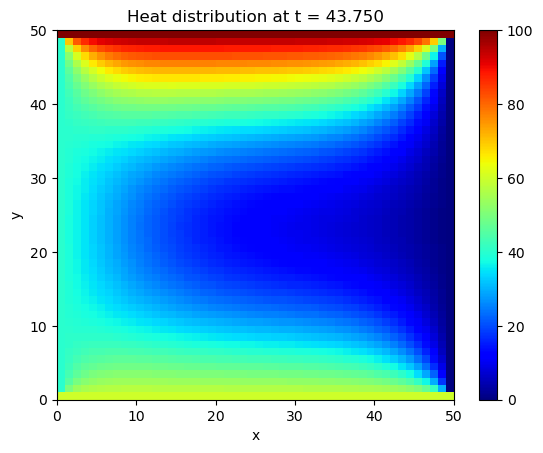

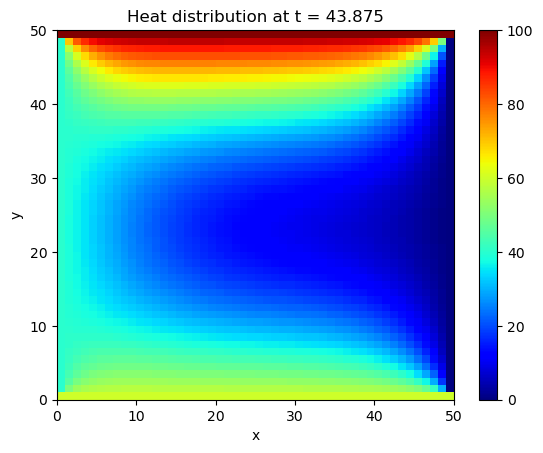

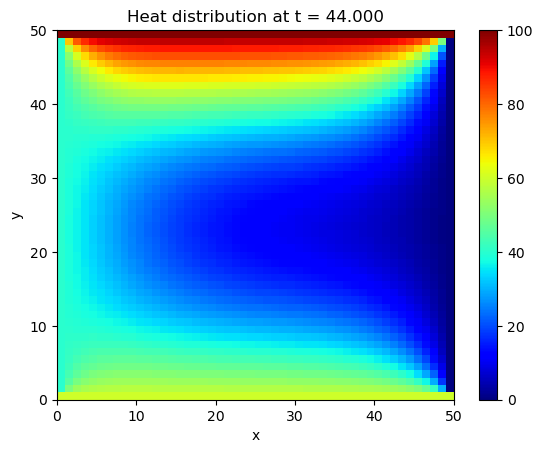

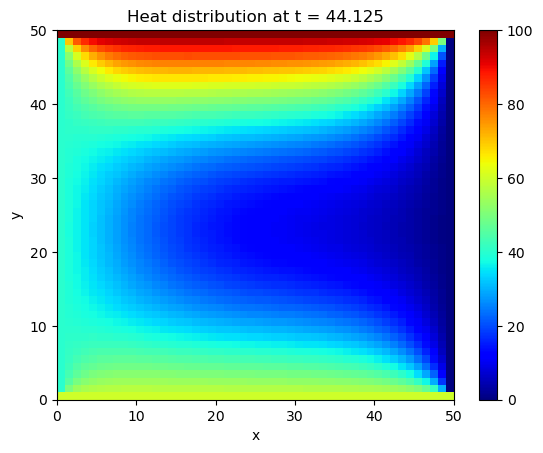

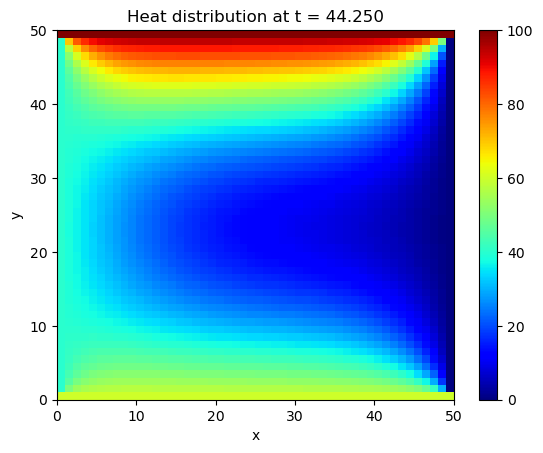

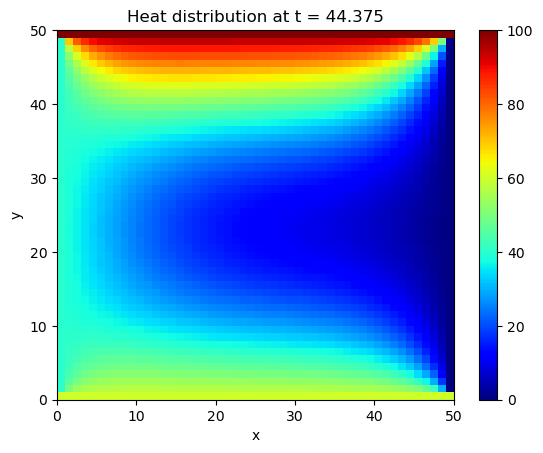

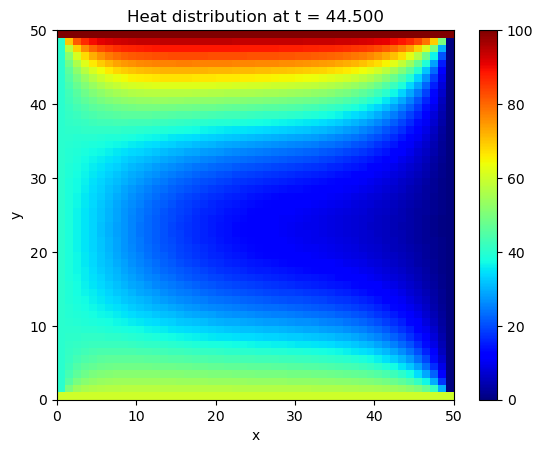

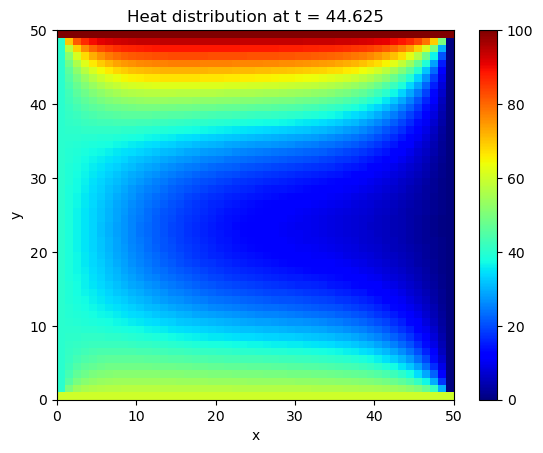

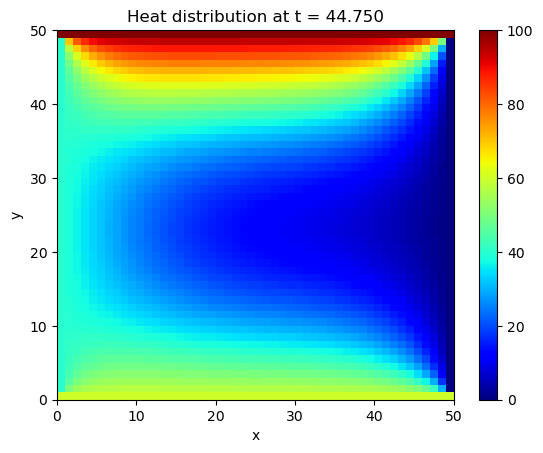

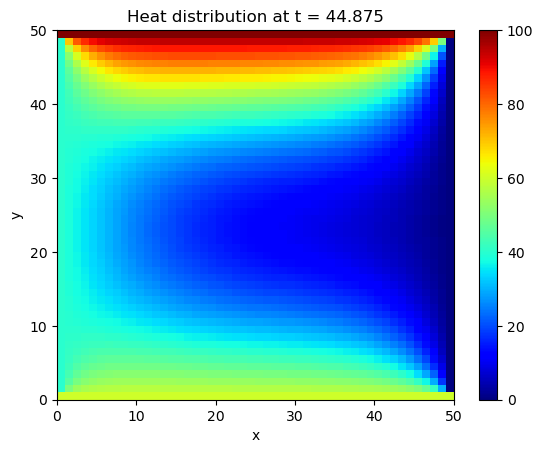

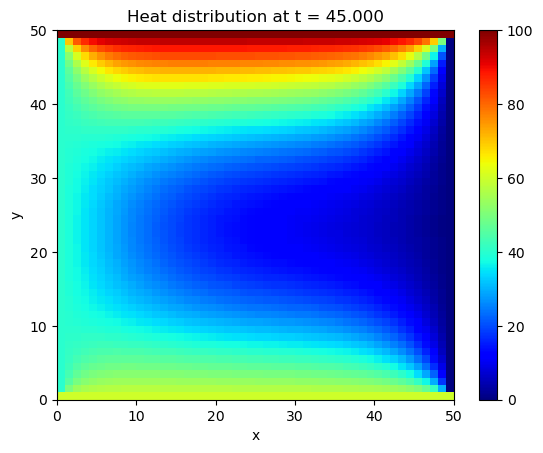

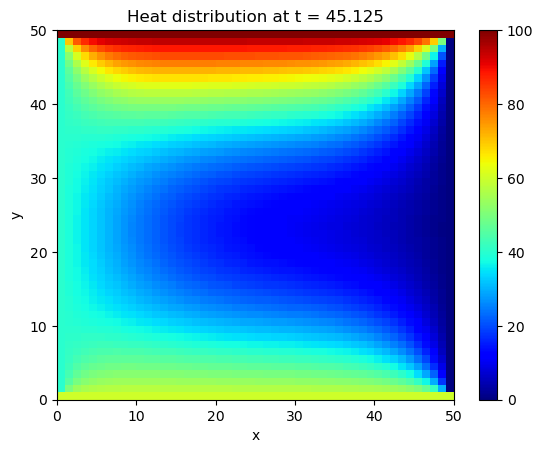

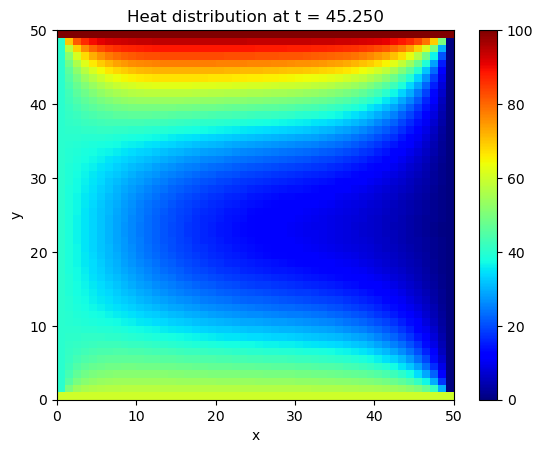

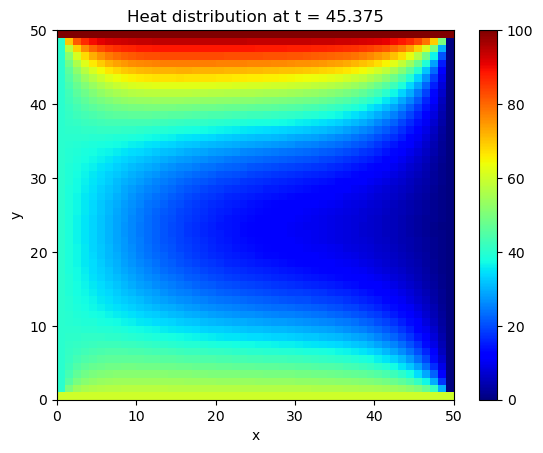

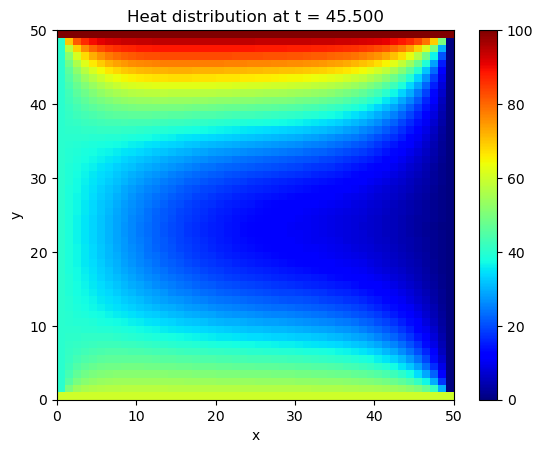

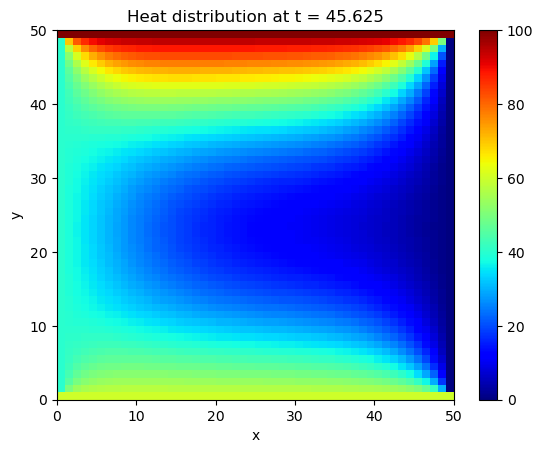

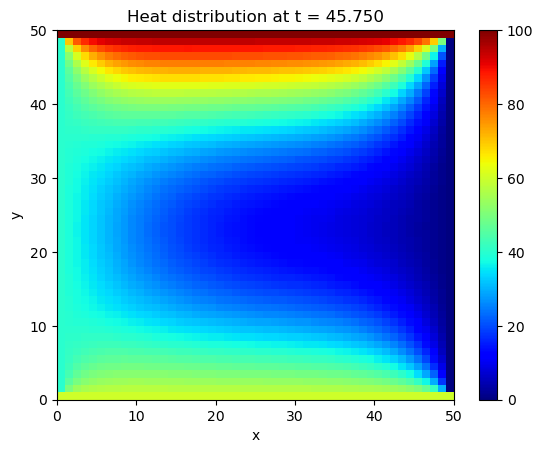

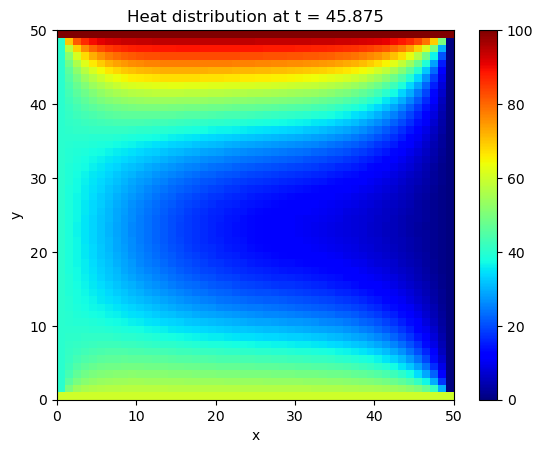

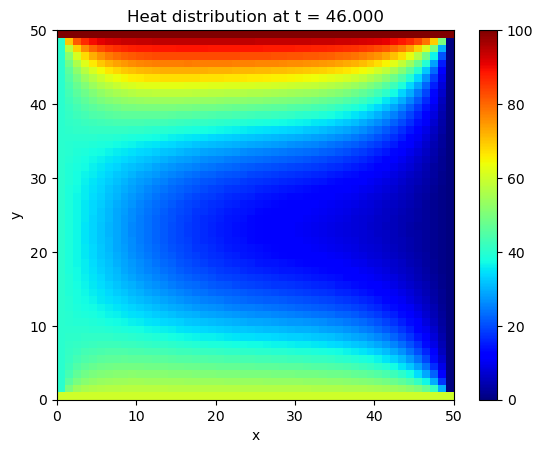

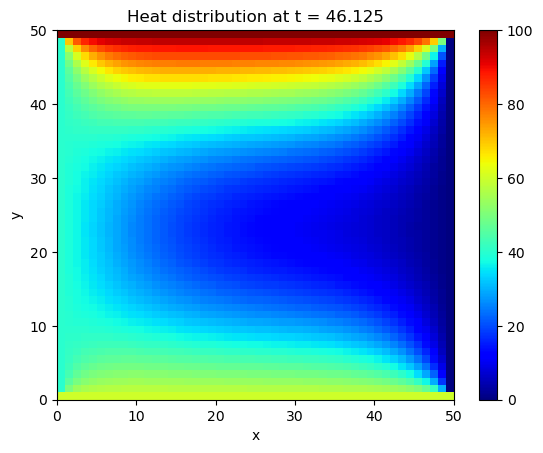

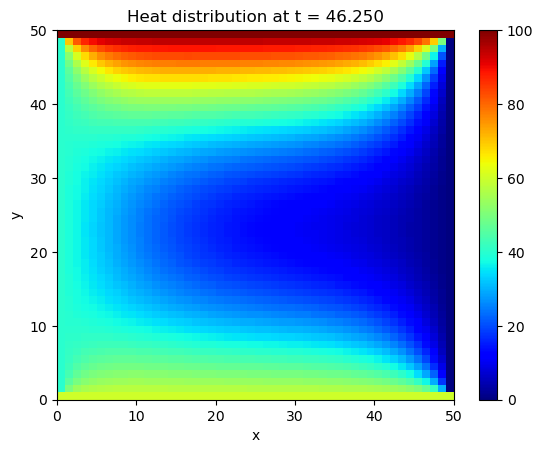

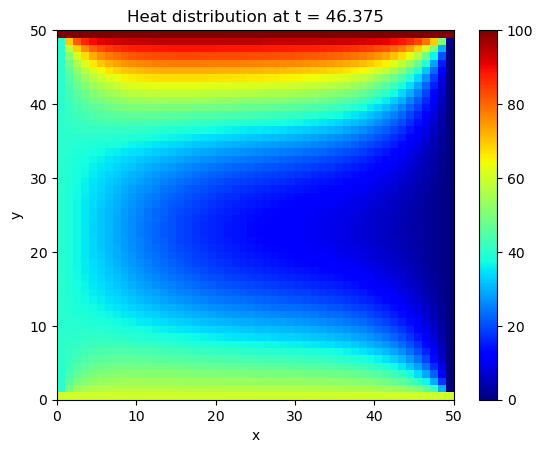

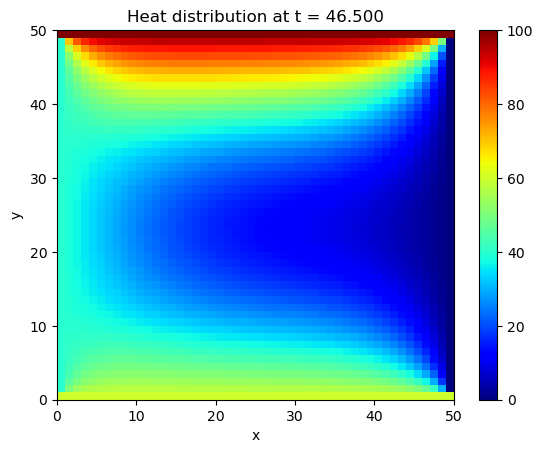

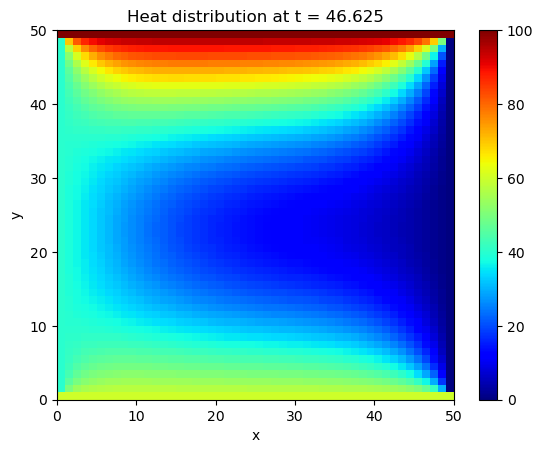

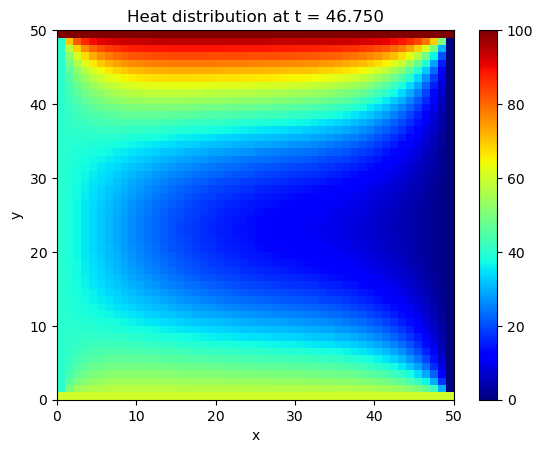

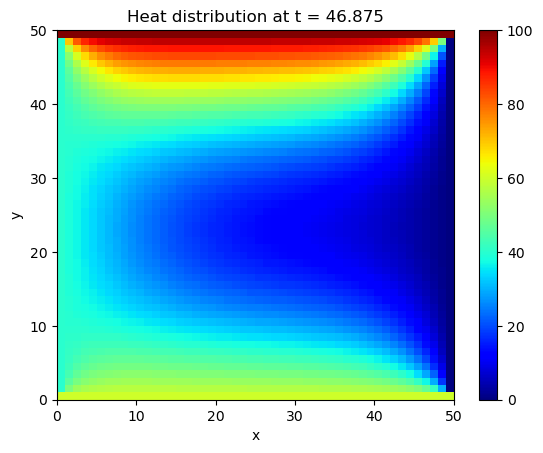

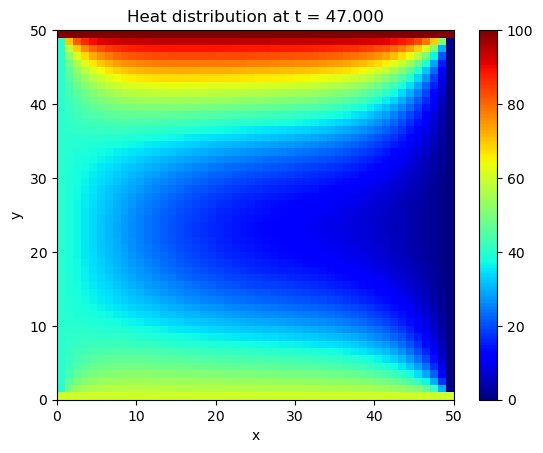

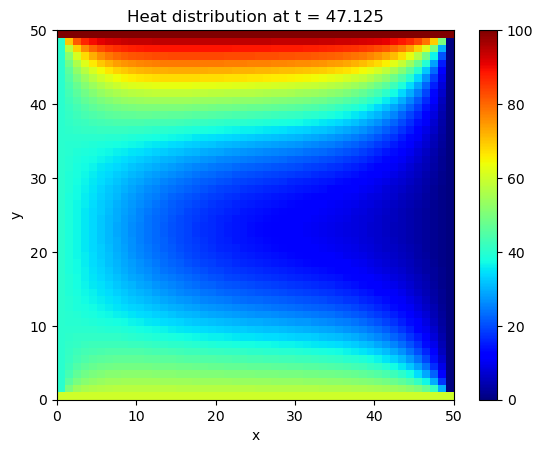

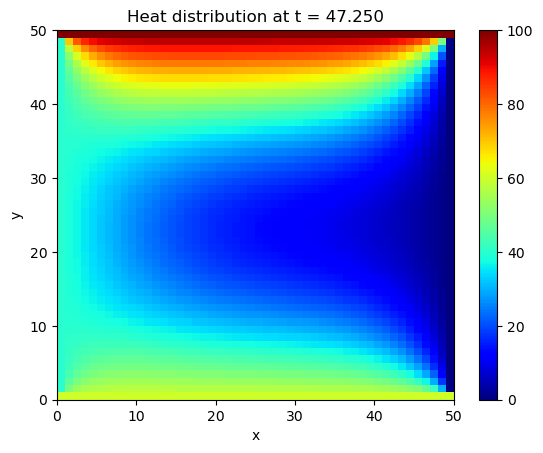

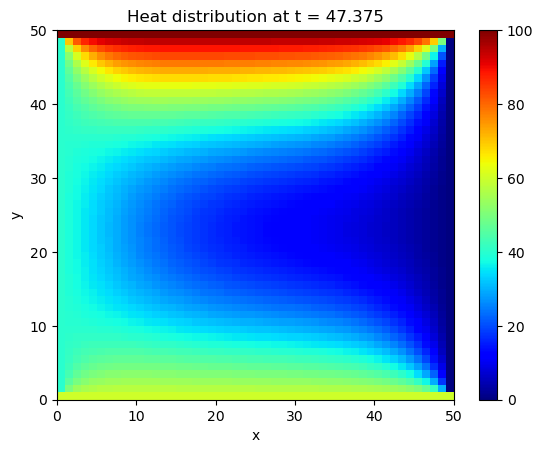

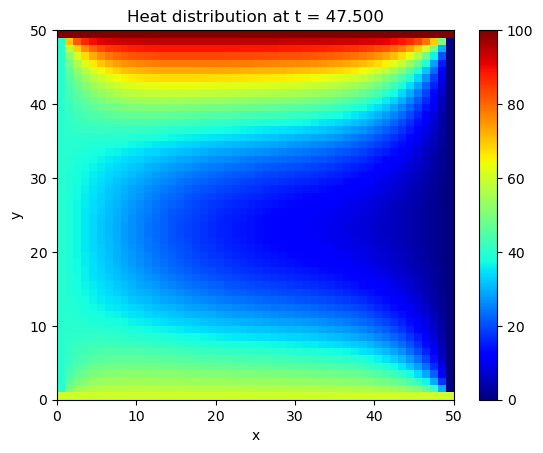

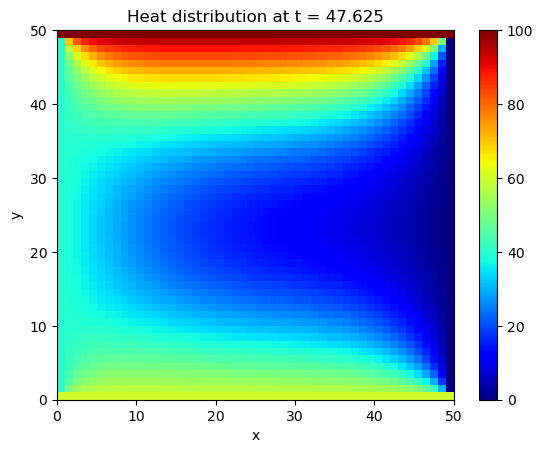

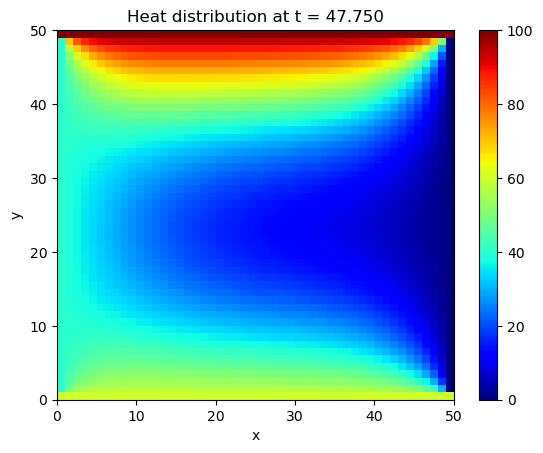

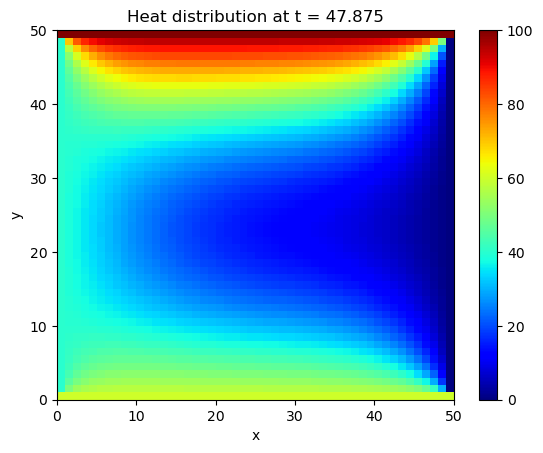

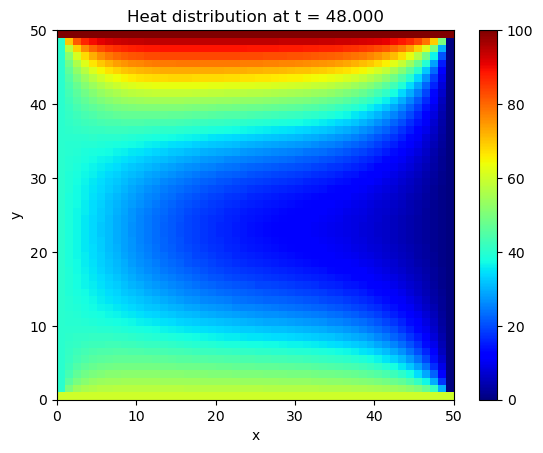

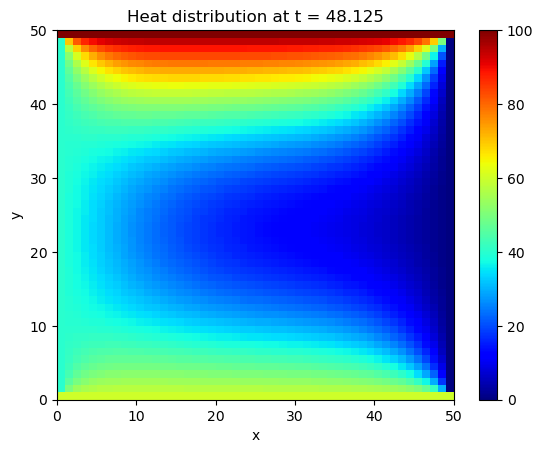

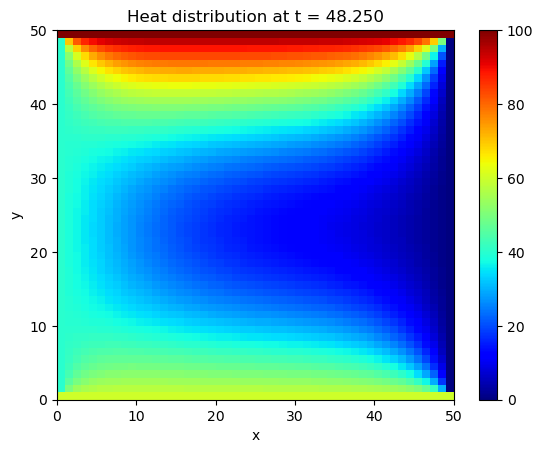

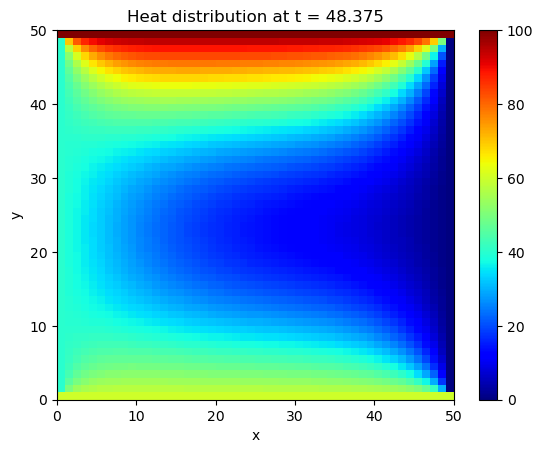

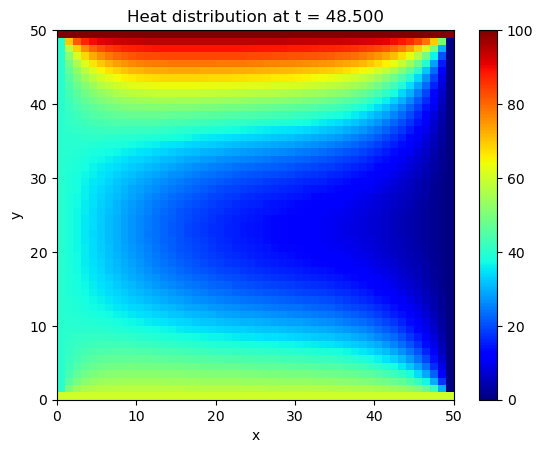

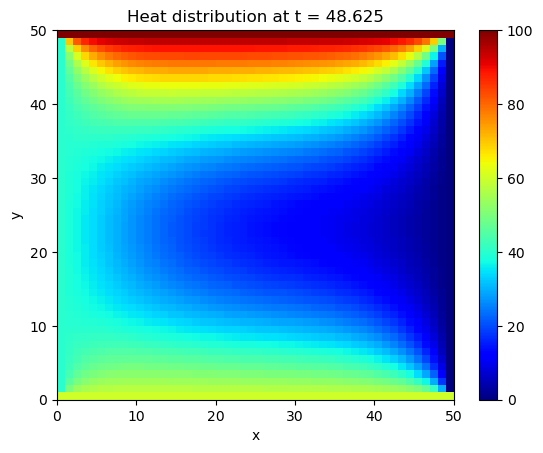

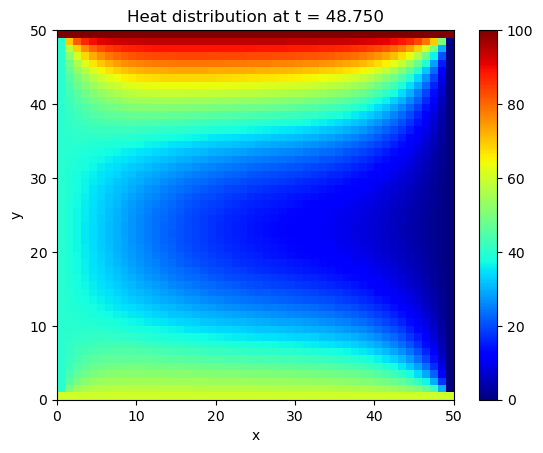

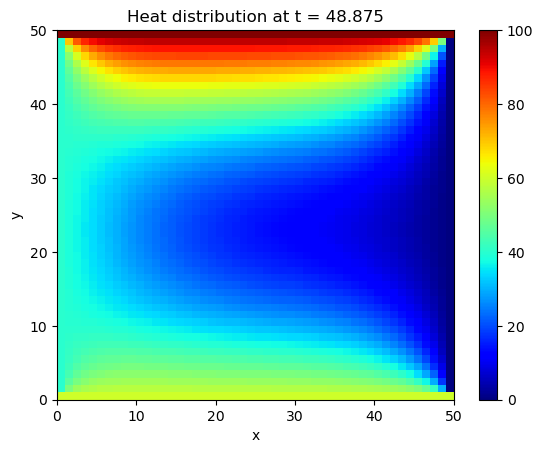

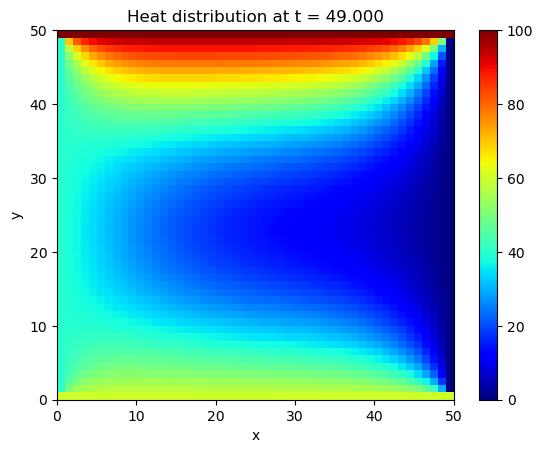

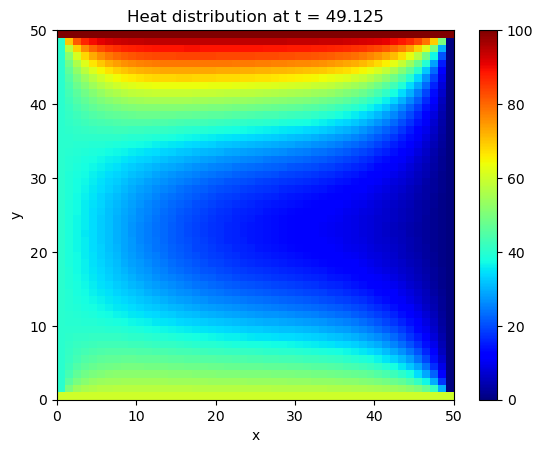

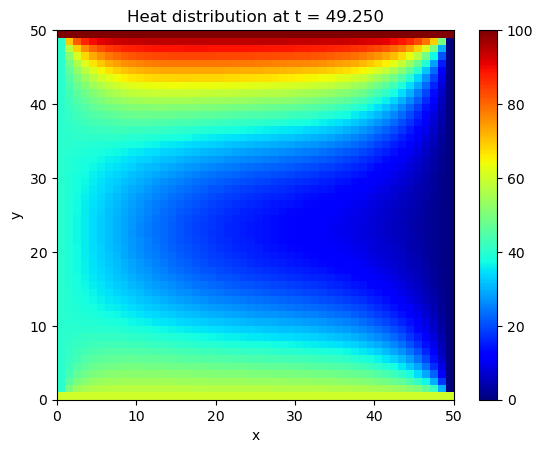

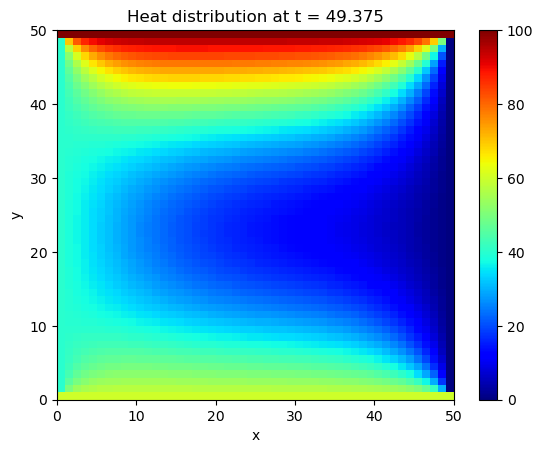

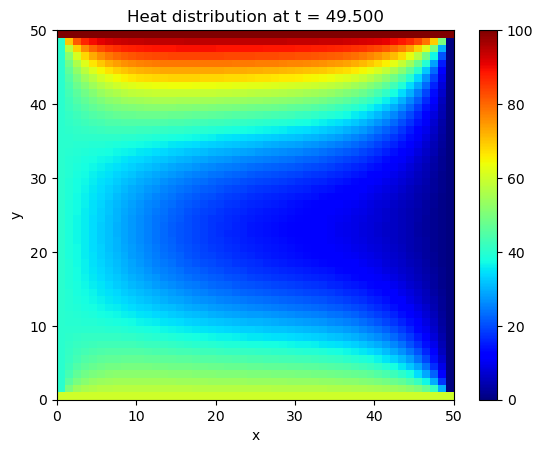

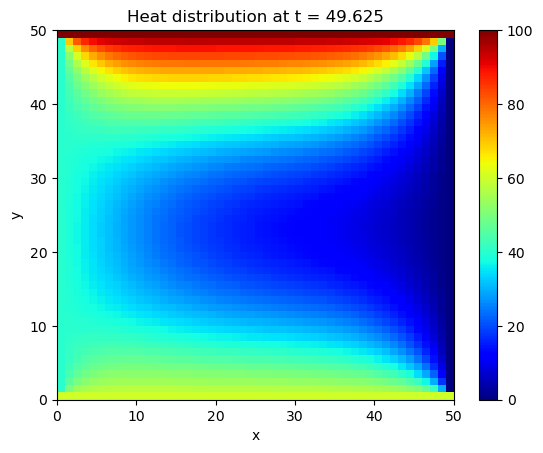

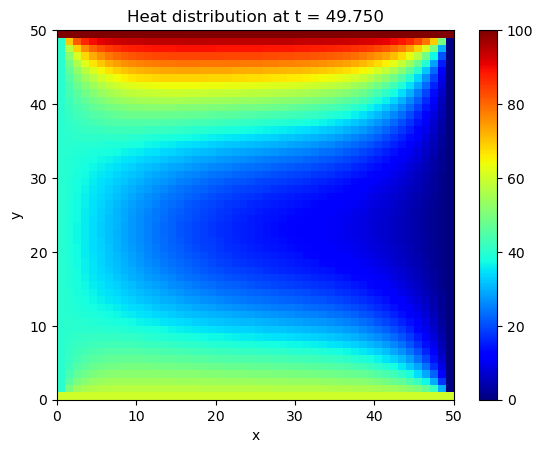

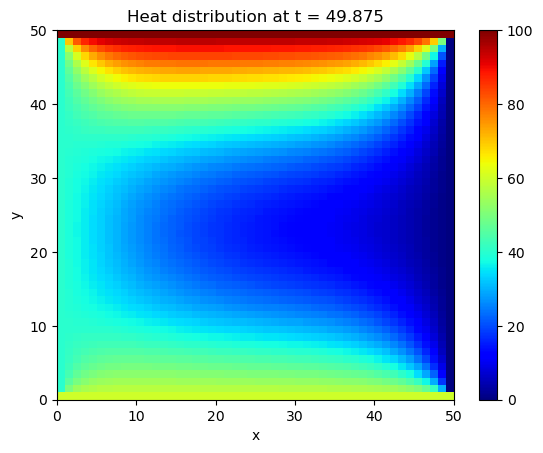

Done!


In [10]:
anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat equation solution.gif")

print("Done!")